# **Double Exponential Smoothing**

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
from timeit import default_timer as timer
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [ ]:
df = pd.read_csv(r'/content/nestle.csv')
df.head()

Date  Open Price  High_Price  Low Price  Close Price          WAP  \
0  21-Apr-22    18150.00    18572.95   17772.90     18205.80  18130.18344   
1  20-Apr-22    18100.10    18415.00   18017.15     18313.70  18295.55907   
2  19-Apr-22    18470.05    18718.00   17845.60     17943.15  18355.09332   
3  18-Apr-22    18294.50    18684.50   18294.50     18549.85  18511.22460   
4  13-Apr-22    18371.20    18549.30   18248.25     18343.90  18388.96783   

   No.of Shares  No. of Trades  Total Turnover (Rs.)  Deliverable Quantity  \
0          4590           1770              83217542                 950.0   
1          6069           1321             111035748                4677.0   
2          2904            716              53303191                1619.0   
3          1496            586              27692792                 557.0   
4          1150            550              21147313                 573.0   

   % Deli. Qty to Traded Qty  Spread High-Low  Spread Close-Open  
0                      20.70           800.05              55.80  
1                      77.06           397.85             213.60  
2                      55.75           872.40            -526.90  
3                      37.23           390.00             255.35  
4                      49.83           301.05             -27.30

In [ ]:
df['High_Price'] = df['High_Price']

In [ ]:
train = df.High_Price[0:-30]
test = df.High_Price[-30:]

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):

    def mean_absolute_percentage_error(y_true, y_pred):
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [ ]:
from sklearn.model_selection import ParameterGrid
#dampening - decreasing future time trends on a straight line(no trend)
param_grid = {'smoothing_level': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90], 'smoothing_slope':[0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],
              'damping_slope': [0.10, 0.20,.30,.40,.50,.60,.70,.80,.90],'damped' : [True, False]}
pg = list(ParameterGrid(param_grid))

In [ ]:
df_results_moni = pd.DataFrame(columns=['smoothing_level', 'smoothing_slope', 'damping_slope','damped','RMSE','r2'])
start = timer()
for a,b in enumerate(pg):
    smoothing_level = b.get('smoothing_level')
    smoothing_slope = b.get('smoothing_slope')
    damping_slope = b.get('damping_slope')
    damped = b.get('damped')
    print(smoothing_level, smoothing_slope, damping_slope,damped)
    fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
    #fit1.summary
    z = fit1.forecast(30)
    print(z)
    df_pred = pd.DataFrame(z, columns=['Forecasted_result'])
    RMSE = np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))
    r2 = metrics.r2_score(test, df_pred.Forecasted_result)
    print( f' RMSE is {np.sqrt(metrics.mean_squared_error(test, df_pred.Forecasted_result))}')
    df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
end = timer()
print(f' Total time taken to complete grid search in seconds: {(end - start)}')


0.1 0.1 0.1 True
2523    4446.150597
2524    4446.137243
2525    4446.135908
2526    4446.135774
2527    4446.135761
2528    4446.135759
2529    4446.135759
2530    4446.135759
2531    4446.135759
2532    4446.135759
2533    4446.135759
2534    4446.135759
2535    4446.135759
2536    4446.135759
2537    4446.135759
2538    4446.135759
2539    4446.135759
2540    4446.135759
2541    4446.135759
2542    4446.135759
2543    4446.135759
2544    4446.135759
2545    4446.135759
2546    4446.135759
2547    4446.135759
2548    4446.135759
2549    4446.135759
2550    4446.135759
2551    4446.135759
2552    4446.135759
dtype: float64
 RMSE is 282.72072601269645
0.1 0.2 0.1 True
2523    4445.377620
2524    4445.351071
2525    4445.348417
2526    4445.348151
2527    4445.348125
2528    4445.348122
2529    4445.348122
2530    4445.348122
2531    4445.348122
2532    4445.348122
2533    4445.348122
2534    4445.348122
2535    4445.348122
2536    4445.348122
2537    4445.348122
2538    4445.348122
253

<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4443.170458
2524    4443.105218
2525    4443.098694
2526    4443.098042
2527    4443.097976
2528    4443.097970
2529    4443.097969
2530    4443.097969
2531    4443.097969
2532    4443.097969
2533    4443.097969
2534    4443.097969
2535    4443.097969
2536    4443.097969
2537    4443.097969
2538    4443.097969
2539    4443.097969
2540    4443.097969
2541    4443.097969
2542    4443.097969
2543    4443.097969
2544    4443.097969
2545    4443.097969
2546    4443.097969
2547    4443.097969
2548    4443.097969
2549    4443.097969
2550    4443.097969
2551    4443.097969
2552    4443.097969
dtype: float64
 RMSE is 279.87022948313887
0.1 0.6 0.1 True
2523    4442.470282
2524    4442.392422
2525    4442.384636
2526    4442.383857
2527    4442.383779
2528    4442.383771
2529    4442.383771
2530    4442.383771
2531    4442.383771
2532    4442.383771
2533    4442.383771
2534    4442.383771
2535    4442.383771
2536    4442.383771
2537    4442.383771
2538    4442.383771
2539    4442.383771


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.1 True
2523    4412.885604
2524    4412.822116
2525    4412.815768
2526    4412.815133
2527    4412.815069
2528    4412.815063
2529    4412.815062
2530    4412.815062
2531    4412.815062
2532    4412.815062
2533    4412.815062
2534    4412.815062
2535    4412.815062
2536    4412.815062
2537    4412.815062
2538    4412.815062
2539    4412.815062
2540    4412.815062
2541    4412.815062
2542    4412.815062
2543    4412.815062
2544    4412.815062
2545    4412.815062
2546    4412.815062
2547    4412.815062
2548    4412.815062
2549    4412.815062
2550    4412.815062
2551    4412.815062
2552    4412.815062
dtype: float64
 RMSE is 251.6809349646971
0.2 0.4 0.1 True
2523    4412.573610
2524    4412.489074
2525    4412.480620
2526    4412.479775
2527    4412.479690
2528    4412.479682
2529    4412.479681
2530    4412.479681
2531    4412.479681
2532    4412.479681
2533    4412.479681
2534    4412.479681
2535    4412.479681
2536    4412.479681
2537    4412.479681
2538    4412.479681
2539    4412

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4411.668098
2524    4411.520701
2525    4411.505962
2526    4411.504488
2527    4411.504340
2528    4411.504326
2529    4411.504324
2530    4411.504324
2531    4411.504324
2532    4411.504324
2533    4411.504324
2534    4411.504324
2535    4411.504324
2536    4411.504324
2537    4411.504324
2538    4411.504324
2539    4411.504324
2540    4411.504324
2541    4411.504324
2542    4411.504324
2543    4411.504324
2544    4411.504324
2545    4411.504324
2546    4411.504324
2547    4411.504324
2548    4411.504324
2549    4411.504324
2550    4411.504324
2551    4411.504324
2552    4411.504324
dtype: float64
 RMSE is 250.47351128454912
0.2 0.8 0.1 True
2523    4411.375666
2524    4411.207400
2525    4411.190574
2526    4411.188891
2527    4411.188723
2528    4411.188706
2529    4411.188704
2530    4411.188704
2531    4411.188704
2532    4411.188704
2533    4411.188704
2534    4411.188704
2535    4411.188704
2536    4411.188704
2537    4411.188704
2538    4411.188704
2539    4411.188704


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4400.552484
2524    4400.459435
2525    4400.450130
2526    4400.449200
2527    4400.449107
2528    4400.449098
2529    4400.449097
2530    4400.449097
2531    4400.449097
2532    4400.449097
2533    4400.449097
2534    4400.449097
2535    4400.449097
2536    4400.449097
2537    4400.449097
2538    4400.449097
2539    4400.449097
2540    4400.449097
2541    4400.449097
2542    4400.449097
2543    4400.449097
2544    4400.449097
2545    4400.449097
2546    4400.449097
2547    4400.449097
2548    4400.449097
2549    4400.449097
2550    4400.449097
2551    4400.449097
2552    4400.449097
dtype: float64
 RMSE is 240.316986317448
0.3 0.4 0.1 True
2523    4400.243524
2524    4400.119451
2525    4400.107044
2526    4400.105803
2527    4400.105679
2528    4400.105667
2529    4400.105665
2530    4400.105665
2531    4400.105665
2532    4400.105665
2533    4400.105665
2534    4400.105665
2535    4400.105665
2536    4400.105665
2537    4400.105665
2538    4400.105665
2539    4400.105665
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4399.022933
2524    4398.774657
2525    4398.749829
2526    4398.747346
2527    4398.747098
2528    4398.747073
2529    4398.747070
2530    4398.747070
2531    4398.747070
2532    4398.747070
2533    4398.747070
2534    4398.747070
2535    4398.747070
2536    4398.747070
2537    4398.747070
2538    4398.747070
2539    4398.747070
2540    4398.747070
2541    4398.747070
2542    4398.747070
2543    4398.747070
2544    4398.747070
2545    4398.747070
2546    4398.747070
2547    4398.747070
2548    4398.747070
2549    4398.747070
2550    4398.747070
2551    4398.747070
2552    4398.747070
dtype: float64
 RMSE is 238.76346778373542
0.3 0.9 0.1 True
2523    4398.721062
2524    4398.441697
2525    4398.413761
2526    4398.410967
2527    4398.410688
2528    4398.410660
2529    4398.410657
2530    4398.410657
2531    4398.410657
2532    4398.410657
2533    4398.410657
2534    4398.410657
2535    4398.410657
2536    4398.410657
2537    4398.410657
2538    4398.410657
2539    4398.410657


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4389.862081
2524    4389.695392
2525    4389.678723
2526    4389.677056
2527    4389.676889
2528    4389.676873
2529    4389.676871
2530    4389.676871
2531    4389.676871
2532    4389.676871
2533    4389.676871
2534    4389.676871
2535    4389.676871
2536    4389.676871
2537    4389.676871
2538    4389.676871
2539    4389.676871
2540    4389.676871
2541    4389.676871
2542    4389.676871
2543    4389.676871
2544    4389.676871
2545    4389.676871
2546    4389.676871
2547    4389.676871
2548    4389.676871
2549    4389.676871
2550    4389.676871
2551    4389.676871
2552    4389.676871
dtype: float64
 RMSE is 230.5024593481753
0.4 0.5 0.1 True
2523    4389.467059
2524    4389.258584
2525    4389.237737
2526    4389.235652
2527    4389.235444
2528    4389.235423
2529    4389.235421
2530    4389.235421
2531    4389.235421
2532    4389.235421
2533    4389.235421
2534    4389.235421
2535    4389.235421
2536    4389.235421
2537    4389.235421
2538    4389.235421
2539    4389.235421
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4388.278078
2524    4387.943978
2525    4387.910568
2526    4387.907227
2527    4387.906893
2528    4387.906860
2529    4387.906856
2530    4387.906856
2531    4387.906856
2532    4387.906856
2533    4387.906856
2534    4387.906856
2535    4387.906856
2536    4387.906856
2537    4387.906856
2538    4387.906856
2539    4387.906856
2540    4387.906856
2541    4387.906856
2542    4387.906856
2543    4387.906856
2544    4387.906856
2545    4387.906856
2546    4387.906856
2547    4387.906856
2548    4387.906856
2549    4387.906856
2550    4387.906856
2551    4387.906856
2552    4387.906856
dtype: float64
 RMSE is 228.90072489245404
0.4 0.9 0.1 True
2523    4387.880258
2524    4387.504194
2525    4387.466588
2526    4387.462827
2527    4387.462451
2528    4387.462414
2529    4387.462410
2530    4387.462410
2531    4387.462410
2532    4387.462410
2533    4387.462410
2534    4387.462410
2535    4387.462410
2536    4387.462410
2537    4387.462410
2538    4387.462410
2539    4387.462410


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4380.309907
2524    4380.205116
2525    4380.194637
2526    4380.193589
2527    4380.193484
2528    4380.193474
2529    4380.193473
2530    4380.193473
2531    4380.193473
2532    4380.193473
2533    4380.193473
2534    4380.193473
2535    4380.193473
2536    4380.193473
2537    4380.193473
2538    4380.193473
2539    4380.193473
2540    4380.193473
2541    4380.193473
2542    4380.193473
2543    4380.193473
2544    4380.193473
2545    4380.193473
2546    4380.193473
2547    4380.193473
2548    4380.193473
2549    4380.193473
2550    4380.193473
2551    4380.193473
2552    4380.193473
dtype: float64
 RMSE is 221.9333817305889
0.5 0.3 0.1 True
2523    4379.791927
2524    4379.634683
2525    4379.618958
2526    4379.617386
2527    4379.617228
2528    4379.617213
2529    4379.617211
2530    4379.617211
2531    4379.617211
2532    4379.617211
2533    4379.617211
2534    4379.617211
2535    4379.617211
2536    4379.617211
2537    4379.617211
2538    4379.617211
2539    4379.617211
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4378.751027
2524    4378.488777
2525    4378.462552
2526    4378.459929
2527    4378.459667
2528    4378.459641
2529    4378.459638
2530    4378.459638
2531    4378.459638
2532    4378.459638
2533    4378.459638
2534    4378.459638
2535    4378.459638
2536    4378.459638
2537    4378.459638
2538    4378.459638
2539    4378.459638
2540    4378.459638
2541    4378.459638
2542    4378.459638
2543    4378.459638
2544    4378.459638
2545    4378.459638
2546    4378.459638
2547    4378.459638
2548    4378.459638
2549    4378.459638
2550    4378.459638
2551    4378.459638
2552    4378.459638
dtype: float64
 RMSE is 220.37758717942845
0.5 0.6 0.1 True
2523    4378.228121
2524    4377.913328
2525    4377.881848
2526    4377.878700
2527    4377.878386
2528    4377.878354
2529    4377.878351
2530    4377.878351
2531    4377.878351
2532    4377.878351
2533    4377.878351
2534    4377.878351
2535    4377.878351
2536    4377.878351
2537    4377.878351
2538    4377.878351
2539    4377.878351


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4377.177468
2524    4376.757530
2525    4376.715536
2526    4376.711337
2527    4376.710917
2528    4376.710875
2529    4376.710870
2530    4376.710870
2531    4376.710870
2532    4376.710870
2533    4376.710870
2534    4376.710870
2535    4376.710870
2536    4376.710870
2537    4376.710870
2538    4376.710870
2539    4376.710870
2540    4376.710870
2541    4376.710870
2542    4376.710870
2543    4376.710870
2544    4376.710870
2545    4376.710870
2546    4376.710870
2547    4376.710870
2548    4376.710870
2549    4376.710870
2550    4376.710870
2551    4376.710870
2552    4376.710870
dtype: float64
 RMSE is 218.81098722167488
0.5 0.9 0.1 True
2523    4376.649759
2524    4376.177229
2525    4376.129976
2526    4376.125250
2527    4376.124778
2528    4376.124731
2529    4376.124726
2530    4376.124725
2531    4376.124725
2532    4376.124725
2533    4376.124725
2534    4376.124725
2535    4376.124725
2536    4376.124725
2537    4376.124725
2538    4376.124725
2539    4376.124725


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4369.532762
2524    4369.407341
2525    4369.394799
2526    4369.393545
2527    4369.393419
2528    4369.393407
2529    4369.393406
2530    4369.393406
2531    4369.393406
2532    4369.393406
2533    4369.393406
2534    4369.393406
2535    4369.393406
2536    4369.393406
2537    4369.393406
2538    4369.393406
2539    4369.393406
2540    4369.393406
2541    4369.393406
2542    4369.393406
2543    4369.393406
2544    4369.393406
2545    4369.393406
2546    4369.393406
2547    4369.393406
2548    4369.393406
2549    4369.393406
2550    4369.393406
2551    4369.393406
2552    4369.393406
dtype: float64
 RMSE is 212.27096194500328
0.6 0.3 0.1 True
2523    4368.884442
2524    4368.696357
2525    4368.677548
2526    4368.675668
2527    4368.675479
2528    4368.675461
2529    4368.675459
2530    4368.675459
2531    4368.675459
2532    4368.675459
2533    4368.675459
2534    4368.675459
2535    4368.675459
2536    4368.675459
2537    4368.675459
2538    4368.675459
2539    4368.675459


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4367.583855
2524    4367.270576
2525    4367.239248
2526    4367.236115
2527    4367.235802
2528    4367.235770
2529    4367.235767
2530    4367.235767
2531    4367.235767
2532    4367.235767
2533    4367.235767
2534    4367.235767
2535    4367.235767
2536    4367.235767
2537    4367.235767
2538    4367.235767
2539    4367.235767
2540    4367.235767
2541    4367.235767
2542    4367.235767
2543    4367.235767
2544    4367.235767
2545    4367.235767
2546    4367.235767
2547    4367.235767
2548    4367.235767
2549    4367.235767
2550    4367.235767
2551    4367.235767
2552    4367.235767
dtype: float64
 RMSE is 210.35659483957272
0.6 0.6 0.1 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.931764
2524    4366.555971
2525    4366.518391
2526    4366.514633
2527    4366.514258
2528    4366.514220
2529    4366.514216
2530    4366.514216
2531    4366.514216
2532    4366.514216
2533    4366.514216
2534    4366.514216
2535    4366.514216
2536    4366.514216
2537    4366.514216
2538    4366.514216
2539    4366.514216
2540    4366.514216
2541    4366.514216
2542    4366.514216
2543    4366.514216
2544    4366.514216
2545    4366.514216
2546    4366.514216
2547    4366.514216
2548    4366.514216
2549    4366.514216
2550    4366.514216
2551    4366.514216
2552    4366.514216
dtype: float64
 RMSE is 209.71741326295722
0.6 0.7 0.1 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.278593
2524    4365.840353
2525    4365.796529
2526    4365.792147
2527    4365.791709
2528    4365.791665
2529    4365.791660
2530    4365.791660
2531    4365.791660
2532    4365.791660
2533    4365.791660
2534    4365.791660
2535    4365.791660
2536    4365.791660
2537    4365.791660
2538    4365.791660
2539    4365.791660
2540    4365.791660
2541    4365.791660
2542    4365.791660
2543    4365.791660
2544    4365.791660
2545    4365.791660
2546    4365.791660
2547    4365.791660
2548    4365.791660
2549    4365.791660
2550    4365.791660
2551    4365.791660
2552    4365.791660
dtype: float64
 RMSE is 209.07785943641713
0.6 0.8 0.1 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4365.624434
2524    4365.123823
2525    4365.073762
2526    4365.068756
2527    4365.068255
2528    4365.068205
2529    4365.068200
2530    4365.068200
2531    4365.068200
2532    4365.068200
2533    4365.068200
2534    4365.068200
2535    4365.068200
2536    4365.068200
2537    4365.068200
2538    4365.068200
2539    4365.068200
2540    4365.068200
2541    4365.068200
2542    4365.068200
2543    4365.068200
2544    4365.068200
2545    4365.068200
2546    4365.068200
2547    4365.068200
2548    4365.068200
2549    4365.068200
2550    4365.068200
2551    4365.068200
2552    4365.068200
dtype: float64
 RMSE is 208.43802950705847
0.6 0.9 0.1 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4364.969381
2524    4364.406482
2525    4364.350192
2526    4364.344563
2527    4364.344000
2528    4364.343944
2529    4364.343938
2530    4364.343938
2531    4364.343938
2532    4364.343938
2533    4364.343938
2534    4364.343938
2535    4364.343938
2536    4364.343938
2537    4364.343938
2538    4364.343938
2539    4364.343938
2540    4364.343938
2541    4364.343938
2542    4364.343938
2543    4364.343938
2544    4364.343938
2545    4364.343938
2546    4364.343938
2547    4364.343938
2548    4364.343938
2549    4364.343938
2550    4364.343938
2551    4364.343938
2552    4364.343938
dtype: float64
 RMSE is 207.79802041982668
0.7 0.1 0.1 True
2523    4359.352485
2524    4359.280264
2525    4359.273042
2526    4359.272320
2527    4359.272248
2528    4359.272241
2529    4359.272240
2530    4359.272240
2531    4359.272240
2532    4359.272240
2533    4359.272240
2534    4359.272240
2535    4359.272240
2536    4359.272240
2537    4359.272240
2538    4359.272240
2539    4359.272240


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4358.591347
2524    4358.447055
2525    4358.432626
2526    4358.431183
2527    4358.431038
2528    4358.431024
2529    4358.431022
2530    4358.431022
2531    4358.431022
2532    4358.431022
2533    4358.431022
2534    4358.431022
2535    4358.431022
2536    4358.431022
2537    4358.431022
2538    4358.431022
2539    4358.431022
2540    4358.431022
2541    4358.431022
2542    4358.431022
2543    4358.431022
2544    4358.431022
2545    4358.431022
2546    4358.431022
2547    4358.431022
2548    4358.431022
2549    4358.431022
2550    4358.431022
2551    4358.431022
2552    4358.431022
dtype: float64
 RMSE is 202.58075345217313
0.7 0.3 0.1 True
2523    4357.830279
2524    4357.614077
2525    4357.592457
2526    4357.590295
2527    4357.590078
2528    4357.590057
2529    4357.590055
2530    4357.590054
2531    4357.590054
2532    4357.590054
2533    4357.590054
2534    4357.590054
2535    4357.590054
2536    4357.590054
2537    4357.590054
2538    4357.590054
2539    4357.590054


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4357.069422
2524    4356.781483
2525    4356.752689
2526    4356.749810
2527    4356.749522
2528    4356.749493
2529    4356.749490
2530    4356.749490
2531    4356.749490
2532    4356.749490
2533    4356.749490
2534    4356.749490
2535    4356.749490
2536    4356.749490
2537    4356.749490
2538    4356.749490
2539    4356.749490
2540    4356.749490
2541    4356.749490
2542    4356.749490
2543    4356.749490
2544    4356.749490
2545    4356.749490
2546    4356.749490
2547    4356.749490
2548    4356.749490
2549    4356.749490
2550    4356.749490
2551    4356.749490
2552    4356.749490
dtype: float64
 RMSE is 201.1078040555692
0.7 0.5 0.1 True
2523    4356.308916
2524    4355.949425
2525    4355.913476
2526    4355.909881
2527    4355.909521
2528    4355.909485
2529    4355.909482
2530    4355.909481
2531    4355.909481
2532    4355.909481
2533    4355.909481
2534    4355.909481
2535    4355.909481
2536    4355.909481
2537    4355.909481
2538    4355.909481
2539    4355.909481
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4354.030874
2524    4353.457942
2525    4353.400648
2526    4353.394919
2527    4353.394346
2528    4353.394289
2529    4353.394283
2530    4353.394283
2531    4353.394283
2532    4353.394283
2533    4353.394283
2534    4353.394283
2535    4353.394283
2536    4353.394283
2537    4353.394283
2538    4353.394283
2539    4353.394283
2540    4353.394283
2541    4353.394283
2542    4353.394283
2543    4353.394283
2544    4353.394283
2545    4353.394283
2546    4353.394283
2547    4353.394283
2548    4353.394283
2549    4353.394283
2550    4353.394283
2551    4353.394283
2552    4353.394283
dtype: float64
 RMSE is 198.17840140914194
0.7 0.9 0.1 True
2523    4353.273132
2524    4352.629494
2525    4352.565130
2526    4352.558693
2527    4352.558050
2528    4352.557985
2529    4352.557979
2530    4352.557978
2531    4352.557978
2532    4352.557978
2533    4352.557978
2534    4352.557978
2535    4352.557978
2536    4352.557978
2537    4352.557978
2538    4352.557978
2539    4352.557978


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4346.173963
2524    4345.853291
2525    4345.821224
2526    4345.818017
2527    4345.817696
2528    4345.817664
2529    4345.817661
2530    4345.817661
2531    4345.817661
2532    4345.817661
2533    4345.817661
2534    4345.817661
2535    4345.817661
2536    4345.817661
2537    4345.817661
2538    4345.817661
2539    4345.817661
2540    4345.817661
2541    4345.817661
2542    4345.817661
2543    4345.817661
2544    4345.817661
2545    4345.817661
2546    4345.817661
2547    4345.817661
2548    4345.817661
2549    4345.817661
2550    4345.817661
2551    4345.817661
2552    4345.817661
dtype: float64
 RMSE is 191.60260749803112
0.8 0.5 0.1 True
2523    4345.333706
2524    4344.933718
2525    4344.893719
2526    4344.889719
2527    4344.889319
2528    4344.889279
2529    4344.889275
2530    4344.889275
2531    4344.889275
2532    4344.889275
2533    4344.889275
2534    4344.889275
2535    4344.889275
2536    4344.889275
2537    4344.889275
2538    4344.889275
2539    4344.889275


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4342.001727
2524    4341.288241
2525    4341.216892
2526    4341.209757
2527    4341.209044
2528    4341.208972
2529    4341.208965
2530    4341.208964
2531    4341.208964
2532    4341.208964
2533    4341.208964
2534    4341.208964
2535    4341.208964
2536    4341.208964
2537    4341.208964
2538    4341.208964
2539    4341.208964
2540    4341.208964
2541    4341.208964
2542    4341.208964
2543    4341.208964
2544    4341.208964
2545    4341.208964
2546    4341.208964
2547    4341.208964
2548    4341.208964
2549    4341.208964
2550    4341.208964
2551    4341.208964
2552    4341.208964
dtype: float64
 RMSE is 187.64607511644797
0.9 0.1 0.1 True
2523    4338.549441
2524    4338.461466
2525    4338.452669
2526    4338.451789
2527    4338.451701
2528    4338.451692
2529    4338.451691
2530    4338.451691
2531    4338.451691
2532    4338.451691
2533    4338.451691
2534    4338.451691
2535    4338.451691
2536    4338.451691
2537    4338.451691
2538    4338.451691
2539    4338.451691


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4334.960130
2524    4334.525411
2525    4334.481939
2526    4334.477592
2527    4334.477157
2528    4334.477114
2529    4334.477109
2530    4334.477109
2531    4334.477109
2532    4334.477109
2533    4334.477109
2534    4334.477109
2535    4334.477109
2536    4334.477109
2537    4334.477109
2538    4334.477109
2539    4334.477109
2540    4334.477109
2541    4334.477109
2542    4334.477109
2543    4334.477109
2544    4334.477109
2545    4334.477109
2546    4334.477109
2547    4334.477109
2548    4334.477109
2549    4334.477109
2550    4334.477109
2551    4334.477109
2552    4334.477109
dtype: float64
 RMSE is 181.9121035525335
0.9 0.6 0.1 True
2523    4334.075377
2524    4333.555318
2525    4333.503312
2526    4333.498112
2527    4333.497591
2528    4333.497539
2529    4333.497534
2530    4333.497534
2531    4333.497534
2532    4333.497534
2533    4333.497534
2534    4333.497534
2535    4333.497534
2536    4333.497534
2537    4333.497534
2538    4333.497534
2539    4333.497534
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4445.200079
2524    4445.145260
2525    4445.134296
2526    4445.132103
2527    4445.131665
2528    4445.131577
2529    4445.131559
2530    4445.131556
2531    4445.131555
2532    4445.131555
2533    4445.131555
2534    4445.131555
2535    4445.131555
2536    4445.131555
2537    4445.131555
2538    4445.131555
2539    4445.131555
2540    4445.131555
2541    4445.131555
2542    4445.131555
2543    4445.131555
2544    4445.131555
2545    4445.131555
2546    4445.131555
2547    4445.131555
2548    4445.131555
2549    4445.131555
2550    4445.131555
2551    4445.131555
2552    4445.131555
dtype: float64
 RMSE is 281.7788964231647
0.1 0.2 0.2 True
2523    4443.553061
2524    4443.444982
2525    4443.423366
2526    4443.419042
2527    4443.418178
2528    4443.418005
2529    4443.417970
2530    4443.417963
2531    4443.417962
2532    4443.417962
2533    4443.417962
2534    4443.417962
2535    4443.417962
2536    4443.417962
2537    4443.417962
2538    4443.417962
2539    4443.417962
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4437.812624
2524    4437.504464
2525    4437.442831
2526    4437.430505
2527    4437.428040
2528    4437.427547
2529    4437.427448
2530    4437.427428
2531    4437.427424
2532    4437.427424
2533    4437.427423
2534    4437.427423
2535    4437.427423
2536    4437.427423
2537    4437.427423
2538    4437.427423
2539    4437.427423
2540    4437.427423
2541    4437.427423
2542    4437.427423
2543    4437.427423
2544    4437.427423
2545    4437.427423
2546    4437.427423
2547    4437.427423
2548    4437.427423
2549    4437.427423
2550    4437.427423
2551    4437.427423
2552    4437.427423
dtype: float64
 RMSE is 274.5650088092266
0.1 0.7 0.2 True
2523    4436.563775
2524    4436.208267
2525    4436.137166
2526    4436.122945
2527    4436.120101
2528    4436.119533
2529    4436.119419
2530    4436.119396
2531    4436.119392
2532    4436.119391
2533    4436.119390
2534    4436.119390
2535    4436.119390
2536    4436.119390
2537    4436.119390
2538    4436.119390
2539    4436.119390
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4412.510250
2524    4412.340094
2525    4412.306063
2526    4412.299256
2527    4412.297895
2528    4412.297623
2529    4412.297568
2530    4412.297557
2531    4412.297555
2532    4412.297555
2533    4412.297555
2534    4412.297555
2535    4412.297555
2536    4412.297555
2537    4412.297555
2538    4412.297555
2539    4412.297555
2540    4412.297555
2541    4412.297555
2542    4412.297555
2543    4412.297555
2544    4412.297555
2545    4412.297555
2546    4412.297555
2547    4412.297555
2548    4412.297555
2549    4412.297555
2550    4412.297555
2551    4412.297555
2552    4412.297555
dtype: float64
 RMSE is 251.20650799619926
0.2 0.3 0.2 True
2523    4411.879304
2524    4411.624901
2525    4411.574020
2526    4411.563844
2527    4411.561809
2528    4411.561402
2529    4411.561320
2530    4411.561304
2531    4411.561301
2532    4411.561300
2533    4411.561300
2534    4411.561300
2535    4411.561300
2536    4411.561300
2537    4411.561300
2538    4411.561300
2539    4411.561300


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4409.576220
2524    4408.988544
2525    4408.871009
2526    4408.847502
2527    4408.842800
2528    4408.841860
2529    4408.841672
2530    4408.841634
2531    4408.841627
2532    4408.841625
2533    4408.841625
2534    4408.841625
2535    4408.841625
2536    4408.841625
2537    4408.841625
2538    4408.841625
2539    4408.841625
2540    4408.841625
2541    4408.841625
2542    4408.841625
2543    4408.841625
2544    4408.841625
2545    4408.841625
2546    4408.841625
2547    4408.841625
2548    4408.841625
2549    4408.841625
2550    4408.841625
2551    4408.841625
2552    4408.841625
dtype: float64
 RMSE is 248.03233432439285
0.2 0.8 0.2 True
2523    4409.046000
2524    4408.375627
2525    4408.241552
2526    4408.214737
2527    4408.209374
2528    4408.208301
2529    4408.208087
2530    4408.208044
2531    4408.208035
2532    4408.208034
2533    4408.208033
2534    4408.208033
2535    4408.208033
2536    4408.208033
2537    4408.208033
2538    4408.208033
2539    4408.208033


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4399.641675
2524    4399.267616
2525    4399.192804
2526    4399.177841
2527    4399.174849
2528    4399.174250
2529    4399.174131
2530    4399.174107
2531    4399.174102
2532    4399.174101
2533    4399.174101
2534    4399.174101
2535    4399.174101
2536    4399.174101
2537    4399.174101
2538    4399.174101
2539    4399.174101
2540    4399.174101
2541    4399.174101
2542    4399.174101
2543    4399.174101
2544    4399.174101
2545    4399.174101
2546    4399.174101
2547    4399.174101
2548    4399.174101
2549    4399.174101
2550    4399.174101
2551    4399.174101
2552    4399.174101
dtype: float64
 RMSE is 239.15809382347902
0.3 0.4 0.2 True
2523    4399.043251
2524    4398.544252
2525    4398.444452
2526    4398.424492
2527    4398.420500
2528    4398.419702
2529    4398.419542
2530    4398.419510
2531    4398.419504
2532    4398.419503
2533    4398.419502
2534    4398.419502
2535    4398.419502
2536    4398.419502
2537    4398.419502
2538    4398.419502
2539    4398.419502


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4396.707714
2524    4395.706272
2525    4395.505984
2526    4395.465926
2527    4395.457914
2528    4395.456312
2529    4395.455992
2530    4395.455928
2531    4395.455915
2532    4395.455912
2533    4395.455912
2534    4395.455912
2535    4395.455912
2536    4395.455912
2537    4395.455912
2538    4395.455912
2539    4395.455912
2540    4395.455912
2541    4395.455912
2542    4395.455912
2543    4395.455912
2544    4395.455912
2545    4395.455912
2546    4395.455912
2547    4395.455912
2548    4395.455912
2549    4395.455912
2550    4395.455912
2551    4395.455912
2552    4395.455912
dtype: float64
 RMSE is 235.7785366337573
0.3 0.9 0.2 True
2523    4396.133599
2524    4395.005681
2525    4394.780097
2526    4394.734980
2527    4394.725957
2528    4394.724152
2529    4394.723791
2530    4394.723719
2531    4394.723705
2532    4394.723702
2533    4394.723701
2534    4394.723701
2535    4394.723701
2536    4394.723701
2537    4394.723701
2538    4394.723701
2539    4394.723701
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4388.340082
2524    4387.665207
2525    4387.530232
2526    4387.503237
2527    4387.497838
2528    4387.496758
2529    4387.496542
2530    4387.496499
2531    4387.496490
2532    4387.496488
2533    4387.496488
2534    4387.496488
2535    4387.496488
2536    4387.496488
2537    4387.496488
2538    4387.496488
2539    4387.496488
2540    4387.496488
2541    4387.496488
2542    4387.496488
2543    4387.496488
2544    4387.496488
2545    4387.496488
2546    4387.496488
2547    4387.496488
2548    4387.496488
2549    4387.496488
2550    4387.496488
2551    4387.496488
2552    4387.496488
dtype: float64
 RMSE is 228.53832179118436
0.4 0.5 0.2 True
2523    4387.559057
2524    4386.713863
2525    4386.544824
2526    4386.511016
2527    4386.504255
2528    4386.502902
2529    4386.502632
2530    4386.502578
2531    4386.502567
2532    4386.502565
2533    4386.502564
2534    4386.502564
2535    4386.502564
2536    4386.502564
2537    4386.502564
2538    4386.502564
2539    4386.502564


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.387989
2524    4382.855085
2525    4382.548504
2526    4382.487188
2527    4382.474924
2528    4382.472472
2529    4382.471981
2530    4382.471883
2531    4382.471864
2532    4382.471860
2533    4382.471859
2534    4382.471859
2535    4382.471859
2536    4382.471859
2537    4382.471859
2538    4382.471859
2539    4382.471859
2540    4382.471859
2541    4382.471859
2542    4382.471859
2543    4382.471859
2544    4382.471859
2545    4382.471859
2546    4382.471859
2547    4382.471859
2548    4382.471859
2549    4382.471859
2550    4382.471859
2551    4382.471859
2552    4382.471859
dtype: float64
 RMSE is 224.01667748192935
0.5 0.1 0.2 True
2523    4380.323733
2524    4380.111455
2525    4380.068999
2526    4380.060508
2527    4380.058810
2528    4380.058470
2529    4380.058403
2530    4380.058389
2531    4380.058386
2532    4380.058386
2533    4380.058386
2534    4380.058386
2535    4380.058386
2536    4380.058386
2537    4380.058386
2538    4380.058386
2539    4380.058386


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4376.168020
2524    4375.099423
2525    4374.885703
2526    4374.842959
2527    4374.834411
2528    4374.832701
2529    4374.832359
2530    4374.832291
2531    4374.832277
2532    4374.832274
2533    4374.832274
2534    4374.832274
2535    4374.832273
2536    4374.832273
2537    4374.832273
2538    4374.832273
2539    4374.832273
2540    4374.832273
2541    4374.832273
2542    4374.832273
2543    4374.832273
2544    4374.832273
2545    4374.832273
2546    4374.832273
2547    4374.832273
2548    4374.832273
2549    4374.832273
2550    4374.832273
2551    4374.832273
2552    4374.832273
dtype: float64
 RMSE is 217.1436488270536
0.5 0.6 0.2 True
2523    4375.106818
2524    4373.822671
2525    4373.565841
2526    4373.514475
2527    4373.504202
2528    4373.502148
2529    4373.501737
2530    4373.501654
2531    4373.501638
2532    4373.501635
2533    4373.501634
2534    4373.501634
2535    4373.501634
2536    4373.501634
2537    4373.501634
2538    4373.501634
2539    4373.501634
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4369.534842
2524    4369.279410
2525    4369.228324
2526    4369.218107
2527    4369.216063
2528    4369.215655
2529    4369.215573
2530    4369.215556
2531    4369.215553
2532    4369.215553
2533    4369.215552
2534    4369.215552
2535    4369.215552
2536    4369.215552
2537    4369.215552
2538    4369.215552
2539    4369.215552
2540    4369.215552
2541    4369.215552
2542    4369.215552
2543    4369.215552
2544    4369.215552
2545    4369.215552
2546    4369.215552
2547    4369.215552
2548    4369.215552
2549    4369.215552
2550    4369.215552
2551    4369.215552
2552    4369.215552
dtype: float64
 RMSE is 212.11584876621055
0.6 0.2 0.2 True
2523    4368.235018
2524    4367.723757
2525    4367.621504
2526    4367.601054
2527    4367.596964
2528    4367.596146
2529    4367.595982
2530    4367.595949
2531    4367.595943
2532    4367.595941
2533    4367.595941
2534    4367.595941
2535    4367.595941
2536    4367.595941
2537    4367.595941
2538    4367.595941
2539    4367.595941


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4362.952481
2524    4361.416939
2525    4361.109831
2526    4361.048409
2527    4361.036125
2528    4361.033668
2529    4361.033176
2530    4361.033078
2531    4361.033058
2532    4361.033055
2533    4361.033054
2534    4361.033054
2535    4361.033054
2536    4361.033054
2537    4361.033054
2538    4361.033054
2539    4361.033054
2540    4361.033054
2541    4361.033054
2542    4361.033054
2543    4361.033054
2544    4361.033054
2545    4361.033054
2546    4361.033054
2547    4361.033054
2548    4361.033054
2549    4361.033054
2550    4361.033054
2551    4361.033054
2552    4361.033054
dtype: float64
 RMSE is 204.89539147418355
0.6 0.7 0.2 True
2523    4361.614872
2524    4359.823803
2525    4359.465589
2526    4359.393947
2527    4359.379618
2528    4359.376752
2529    4359.376179
2530    4359.376064
2531    4359.376042
2532    4359.376037
2533    4359.376036
2534    4359.376036
2535    4359.376036
2536    4359.376036
2537    4359.376036
2538    4359.376036
2539    4359.376036


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4357.034013
2524    4356.443869
2525    4356.325841
2526    4356.302235
2527    4356.297514
2528    4356.296569
2529    4356.296381
2530    4356.296343
2531    4356.296335
2532    4356.296334
2533    4356.296333
2534    4356.296333
2535    4356.296333
2536    4356.296333
2537    4356.296333
2538    4356.296333
2539    4356.296333
2540    4356.296333
2541    4356.296333
2542    4356.296333
2543    4356.296333
2544    4356.296333
2545    4356.296333
2546    4356.296333
2547    4356.296333
2548    4356.296333
2549    4356.296333
2550    4356.296333
2551    4356.296333
2552    4356.296333
dtype: float64
 RMSE is 200.71727109565074
0.7 0.3 0.2 True
2523    4355.488515
2524    4354.604299
2525    4354.427456
2526    4354.392087
2527    4354.385013
2528    4354.383598
2529    4354.383315
2530    4354.383259
2531    4354.383248
2532    4354.383245
2533    4354.383245
2534    4354.383245
2535    4354.383245
2536    4354.383245
2537    4354.383245
2538    4354.383245
2539    4354.383245


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4349.298366
2524    4347.249647
2525    4346.839903
2526    4346.757954
2527    4346.741564
2528    4346.738286
2529    4346.737631
2530    4346.737500
2531    4346.737473
2532    4346.737468
2533    4346.737467
2534    4346.737467
2535    4346.737467
2536    4346.737467
2537    4346.737467
2538    4346.737467
2539    4346.737467
2540    4346.737467
2541    4346.737467
2542    4346.737467
2543    4346.737467
2544    4346.737467
2545    4346.737467
2546    4346.737467
2547    4346.737467
2548    4346.737467
2549    4346.737467
2550    4346.737467
2551    4346.737467
2552    4346.737467
dtype: float64
 RMSE is 192.42494616708467
0.7 0.8 0.2 True
2523    4347.755079
2524    4345.419205
2525    4344.952030
2526    4344.858595
2527    4344.839908
2528    4344.836171
2529    4344.835424
2530    4344.835274
2531    4344.835244
2532    4344.835238
2533    4344.835237
2534    4344.835237
2535    4344.835237
2536    4344.835237
2537    4344.835237
2538    4344.835237
2539    4344.835237


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4344.379851
2524    4343.392699
2525    4343.195269
2526    4343.155782
2527    4343.147885
2528    4343.146306
2529    4343.145990
2530    4343.145927
2531    4343.145914
2532    4343.145912
2533    4343.145911
2534    4343.145911
2535    4343.145911
2536    4343.145911
2537    4343.145911
2538    4343.145911
2539    4343.145911
2540    4343.145911
2541    4343.145911
2542    4343.145911
2543    4343.145911
2544    4343.145911
2545    4343.145911
2546    4343.145911
2547    4343.145911
2548    4343.145911
2549    4343.145911
2550    4343.145911
2551    4343.145911
2552    4343.145911
dtype: float64
 RMSE is 189.3138446069585
0.8 0.4 0.2 True
2523    4342.665863
2524    4341.354015
2525    4341.091645
2526    4341.039171
2527    4341.028676
2528    4341.026577
2529    4341.026158
2530    4341.026074
2531    4341.026057
2532    4341.026053
2533    4341.026053
2534    4341.026053
2535    4341.026053
2536    4341.026053
2537    4341.026053
2538    4341.026053
2539    4341.026053
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4335.911285
2524    4333.328732
2525    4332.812221
2526    4332.708919
2527    4332.688259
2528    4332.684127
2529    4332.683300
2530    4332.683135
2531    4332.683102
2532    4332.683096
2533    4332.683094
2534    4332.683094
2535    4332.683094
2536    4332.683094
2537    4332.683094
2538    4332.683094
2539    4332.683094
2540    4332.683094
2541    4332.683094
2542    4332.683094
2543    4332.683094
2544    4332.683094
2545    4332.683094
2546    4332.683094
2547    4332.683094
2548    4332.683094
2549    4332.683094
2550    4332.683094
2551    4332.683094
2552    4332.683094
dtype: float64
 RMSE is 180.42538506352045
0.8 0.9 0.2 True
2523    4334.254231
2524    4331.362016
2525    4330.783573
2526    4330.667885
2527    4330.644747
2528    4330.640119
2529    4330.639194
2530    4330.639009
2531    4330.638972
2532    4330.638964
2533    4330.638963
2534    4330.638963
2535    4330.638963
2536    4330.638963
2537    4330.638962
2538    4330.638962
2539    4330.638962


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4332.092187
2524    4330.665214
2525    4330.379819
2526    4330.322740
2527    4330.311324
2528    4330.309041
2529    4330.308584
2530    4330.308493
2531    4330.308475
2532    4330.308471
2533    4330.308470
2534    4330.308470
2535    4330.308470
2536    4330.308470
2537    4330.308470
2538    4330.308470
2539    4330.308470
2540    4330.308470
2541    4330.308470
2542    4330.308470
2543    4330.308470
2544    4330.308470
2545    4330.308470
2546    4330.308470
2547    4330.308470
2548    4330.308470
2549    4330.308470
2550    4330.308470
2551    4330.308470
2552    4330.308470
dtype: float64
 RMSE is 178.4116304112152
0.9 0.5 0.2 True
2523    4330.294520
2524    4328.520502
2525    4328.165698
2526    4328.094737
2527    4328.080545
2528    4328.077707
2529    4328.077139
2530    4328.077026
2531    4328.077003
2532    4328.076998
2533    4328.076998
2534    4328.076997
2535    4328.076997
2536    4328.076997
2537    4328.076997
2538    4328.076997
2539    4328.076997
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4323.315218
2524    4320.197974
2525    4319.574525
2526    4319.449836
2527    4319.424898
2528    4319.419910
2529    4319.418913
2530    4319.418713
2531    4319.418673
2532    4319.418665
2533    4319.418664
2534    4319.418663
2535    4319.418663
2536    4319.418663
2537    4319.418663
2538    4319.418663
2539    4319.418663
2540    4319.418663
2541    4319.418663
2542    4319.418663
2543    4319.418663
2544    4319.418663
2545    4319.418663
2546    4319.418663
2547    4319.418663
2548    4319.418663
2549    4319.418663
2550    4319.418663
2551    4319.418663
2552    4319.418663
dtype: float64
 RMSE is 169.3865891953308
0.1 0.1 0.3 True
2523    4444.029035
2524    4443.902452
2525    4443.864477
2526    4443.853085
2527    4443.849667
2528    4443.848642
2529    4443.848334
2530    4443.848242
2531    4443.848214
2532    4443.848206
2533    4443.848204
2534    4443.848203
2535    4443.848203
2536    4443.848202
2537    4443.848202
2538    4443.848202
2539    4443.848202
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4434.828314
2524    4434.252323
2525    4434.079526
2526    4434.027687
2527    4434.012135
2528    4434.007470
2529    4434.006070
2530    4434.005650
2531    4434.005524
2532    4434.005486
2533    4434.005475
2534    4434.005472
2535    4434.005471
2536    4434.005470
2537    4434.005470
2538    4434.005470
2539    4434.005470
2540    4434.005470
2541    4434.005470
2542    4434.005470
2543    4434.005470
2544    4434.005470
2545    4434.005470
2546    4434.005470
2547    4434.005470
2548    4434.005470
2549    4434.005470
2550    4434.005470
2551    4434.005470
2552    4434.005470
dtype: float64
 RMSE is 271.3785724320585
0.1 0.6 0.3 True
2523    4433.020753
2524    4432.342667
2525    4432.139241
2526    4432.078213
2527    4432.059905
2528    4432.054412
2529    4432.052764
2530    4432.052270
2531    4432.052122
2532    4432.052077
2533    4432.052064
2534    4432.052060
2535    4432.052059
2536    4432.052058
2537    4432.052058
2538    4432.052058
2539    4432.052058
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4412.766549
2524    4412.574701
2525    4412.517146
2526    4412.499880
2527    4412.494700
2528    4412.493146
2529    4412.492680
2530    4412.492540
2531    4412.492498
2532    4412.492485
2533    4412.492482
2534    4412.492481
2535    4412.492480
2536    4412.492480
2537    4412.492480
2538    4412.492480
2539    4412.492480
2540    4412.492480
2541    4412.492480
2542    4412.492480
2543    4412.492480
2544    4412.492480
2545    4412.492480
2546    4412.492480
2547    4412.492480
2548    4412.492480
2549    4412.492480
2550    4412.492480
2551    4412.492480
2552    4412.492480
dtype: float64
 RMSE is 251.38844629459695
0.2 0.2 0.3 True
2523    4411.762171
2524    4411.381219
2525    4411.266934
2526    4411.232648
2527    4411.222362
2528    4411.219277
2529    4411.218351
2530    4411.218073
2531    4411.217990
2532    4411.217965
2533    4411.217957
2534    4411.217955
2535    4411.217954
2536    4411.217954
2537    4411.217954
2538    4411.217954
2539    4411.217954


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4408.360271
2524    4407.239151
2525    4406.902815
2526    4406.801914
2527    4406.771644
2528    4406.762563
2529    4406.759838
2530    4406.759021
2531    4406.758776
2532    4406.758702
2533    4406.758680
2534    4406.758674
2535    4406.758672
2536    4406.758671
2537    4406.758671
2538    4406.758671
2539    4406.758671
2540    4406.758671
2541    4406.758671
2542    4406.758671
2543    4406.758671
2544    4406.758671
2545    4406.758671
2546    4406.758671
2547    4406.758671
2548    4406.758671
2549    4406.758671
2550    4406.758671
2551    4406.758671
2552    4406.758671
dtype: float64
 RMSE is 246.13849431879316
0.2 0.7 0.3 True
2523    4407.623320
2524    4406.319183
2525    4405.927942
2526    4405.810570
2527    4405.775358
2528    4405.764794
2529    4405.761625
2530    4405.760675
2531    4405.760389
2532    4405.760304
2533    4405.760278
2534    4405.760270
2535    4405.760268
2536    4405.760267
2537    4405.760267
2538    4405.760267
2539    4405.760267


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4399.653229
2524    4399.095047
2525    4398.927593
2526    4398.877357
2527    4398.862286
2528    4398.857764
2529    4398.856408
2530    4398.856001
2531    4398.855879
2532    4398.855842
2533    4398.855831
2534    4398.855828
2535    4398.855827
2536    4398.855827
2537    4398.855827
2538    4398.855827
2539    4398.855827
2540    4398.855827
2541    4398.855827
2542    4398.855827
2543    4398.855827
2544    4398.855827
2545    4398.855827
2546    4398.855827
2547    4398.855827
2548    4398.855827
2549    4398.855827
2550    4398.855827
2551    4398.855827
2552    4398.855827
dtype: float64
 RMSE is 238.87580700631713
0.3 0.3 0.3 True
2523    4398.778792
2524    4397.940966
2525    4397.689618
2526    4397.614214
2527    4397.591592
2528    4397.584806
2529    4397.582770
2530    4397.582159
2531    4397.581976
2532    4397.581921
2533    4397.581905
2534    4397.581900
2535    4397.581898
2536    4397.581898
2537    4397.581898
2538    4397.581898
2539    4397.581898


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4395.449943
2524    4393.479904
2525    4392.888892
2526    4392.711589
2527    4392.658398
2528    4392.642441
2529    4392.637653
2530    4392.636217
2531    4392.635786
2532    4392.635657
2533    4392.635618
2534    4392.635607
2535    4392.635603
2536    4392.635602
2537    4392.635602
2538    4392.635602
2539    4392.635602
2540    4392.635602
2541    4392.635602
2542    4392.635602
2543    4392.635602
2544    4392.635602
2545    4392.635602
2546    4392.635602
2547    4392.635602
2548    4392.635602
2549    4392.635602
2550    4392.635602
2551    4392.635602
2552    4392.635602
dtype: float64
 RMSE is 233.24745595549754
0.3 0.8 0.3 True
2523    4394.639180
2524    4392.381222
2525    4391.703834
2526    4391.500618
2527    4391.439653
2528    4391.421364
2529    4391.415877
2530    4391.414231
2531    4391.413737
2532    4391.413589
2533    4391.413544
2534    4391.413531
2535    4391.413527
2536    4391.413526
2537    4391.413526
2538    4391.413525
2539    4391.413525


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4388.059814
2524    4386.919900
2525    4386.577926
2526    4386.475334
2527    4386.444556
2528    4386.435323
2529    4386.432553
2530    4386.431722
2531    4386.431472
2532    4386.431397
2533    4386.431375
2534    4386.431368
2535    4386.431366
2536    4386.431366
2537    4386.431365
2538    4386.431365
2539    4386.431365
2540    4386.431365
2541    4386.431365
2542    4386.431365
2543    4386.431365
2544    4386.431365
2545    4386.431365
2546    4386.431365
2547    4386.431365
2548    4386.431365
2549    4386.431365
2550    4386.431365
2551    4386.431365
2552    4386.431365
dtype: float64
 RMSE is 227.59267009192646
0.4 0.4 0.3 True
2523    4386.924438
2524    4385.398238
2525    4384.940378
2526    4384.803020
2527    4384.761812
2528    4384.749450
2529    4384.745741
2530    4384.744629
2531    4384.744295
2532    4384.744195
2533    4384.744165
2534    4384.744156
2535    4384.744153
2536    4384.744152
2537    4384.744152
2538    4384.744152
2539    4384.744152


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4382.243135
2524    4379.137191
2525    4378.205408
2526    4377.925873
2527    4377.842012
2528    4377.816854
2529    4377.809307
2530    4377.807042
2531    4377.806363
2532    4377.806159
2533    4377.806098
2534    4377.806080
2535    4377.806074
2536    4377.806073
2537    4377.806072
2538    4377.806072
2539    4377.806072
2540    4377.806072
2541    4377.806072
2542    4377.806072
2543    4377.806072
2544    4377.806072
2545    4377.806072
2546    4377.806072
2547    4377.806072
2548    4377.806072
2549    4377.806072
2550    4377.806072
2551    4377.806072
2552    4377.806072
dtype: float64
 RMSE is 219.8738269720321
0.4 0.9 0.3 True
2523    4381.027344
2524    4377.518189
2525    4376.465443
2526    4376.149619
2527    4376.054872
2528    4376.026448
2529    4376.017920
2530    4376.015362
2531    4376.014595
2532    4376.014365
2533    4376.014295
2534    4376.014275
2535    4376.014269
2536    4376.014267
2537    4376.014266
2538    4376.014266
2539    4376.014266
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4375.237759
2524    4373.293668
2525    4372.710441
2526    4372.535473
2527    4372.482983
2528    4372.467236
2529    4372.462511
2530    4372.461094
2531    4372.460669
2532    4372.460541
2533    4372.460503
2534    4372.460492
2535    4372.460488
2536    4372.460487
2537    4372.460487
2538    4372.460487
2539    4372.460487
2540    4372.460487
2541    4372.460487
2542    4372.460487
2543    4372.460487
2544    4372.460487
2545    4372.460487
2546    4372.460487
2547    4372.460487
2548    4372.460487
2549    4372.460487
2550    4372.460487
2551    4372.460487
2552    4372.460487
dtype: float64
 RMSE is 215.05425745873347
0.5 0.5 0.3 True
2523    4373.647837
2524    4371.208103
2525    4370.476183
2526    4370.256607
2527    4370.190735
2528    4370.170973
2529    4370.165044
2530    4370.163266
2531    4370.162732
2532    4370.162572
2533    4370.162524
2534    4370.162509
2535    4370.162505
2536    4370.162504
2537    4370.162503
2538    4370.162503
2539    4370.162503


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4367.027539
2524    4362.579855
2525    4361.245549
2526    4360.845258
2527    4360.725170
2528    4360.689144
2529    4360.678336
2530    4360.675094
2531    4360.674121
2532    4360.673829
2533    4360.673742
2534    4360.673715
2535    4360.673707
2536    4360.673705
2537    4360.673704
2538    4360.673704
2539    4360.673704
2540    4360.673704
2541    4360.673704
2542    4360.673704
2543    4360.673704
2544    4360.673704
2545    4360.673704
2546    4360.673704
2547    4360.673704
2548    4360.673704
2549    4360.673704
2550    4360.673704
2551    4360.673704
2552    4360.673704
dtype: float64
 RMSE is 204.66075845376972
0.6 0.1 0.3 True
2523    4368.910599
2524    4368.330084
2525    4368.155929
2526    4368.103683
2527    4368.088009
2528    4368.083307
2529    4368.081896
2530    4368.081473
2531    4368.081346
2532    4368.081308
2533    4368.081297
2534    4368.081293
2535    4368.081292
2536    4368.081292
2537    4368.081292
2538    4368.081292
2539    4368.081292


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4360.967559
2524    4358.035163
2525    4357.155444
2526    4356.891528
2527    4356.812354
2528    4356.788601
2529    4356.781476
2530    4356.779338
2531    4356.778697
2532    4356.778504
2533    4356.778446
2534    4356.778429
2535    4356.778424
2536    4356.778422
2537    4356.778422
2538    4356.778422
2539    4356.778422
2540    4356.778422
2541    4356.778422
2542    4356.778422
2543    4356.778422
2544    4356.778422
2545    4356.778422
2546    4356.778422
2547    4356.778422
2548    4356.778422
2549    4356.778422
2550    4356.778422
2551    4356.778422
2552    4356.778422
dtype: float64
 RMSE is 201.1983551829897
0.6 0.6 0.3 True
2523    4358.921598
2524    4355.398063
2525    4354.341003
2526    4354.023885
2527    4353.928750
2528    4353.900209
2529    4353.891647
2530    4353.889078
2531    4353.888307
2532    4353.888076
2533    4353.888007
2534    4353.887986
2535    4353.887980
2536    4353.887978
2537    4353.887977
2538    4353.887977
2539    4353.887977
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4357.804654
2524    4357.130176
2525    4356.927832
2526    4356.867129
2527    4356.848918
2528    4356.843455
2529    4356.841816
2530    4356.841324
2531    4356.841177
2532    4356.841132
2533    4356.841119
2534    4356.841115
2535    4356.841114
2536    4356.841114
2537    4356.841114
2538    4356.841114
2539    4356.841114
2540    4356.841114
2541    4356.841114
2542    4356.841114
2543    4356.841114
2544    4356.841114
2545    4356.841114
2546    4356.841114
2547    4356.841114
2548    4356.841114
2549    4356.841114
2550    4356.841114
2551    4356.841114
2552    4356.841114
dtype: float64
 RMSE is 201.19983040221643
0.7 0.2 0.3 True
2523    4355.473659
2524    4354.123517
2525    4353.718474
2526    4353.596962
2527    4353.560508
2528    4353.549572
2529    4353.546291
2530    4353.545306
2531    4353.545011
2532    4353.544923
2533    4353.544896
2534    4353.544888
2535    4353.544886
2536    4353.544885
2537    4353.544885
2538    4353.544885
2539    4353.544885


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4346.021604
2524    4341.983012
2525    4340.771435
2526    4340.407961
2527    4340.298919
2528    4340.266207
2529    4340.256393
2530    4340.253449
2531    4340.252566
2532    4340.252301
2533    4340.252221
2534    4340.252197
2535    4340.252190
2536    4340.252188
2537    4340.252187
2538    4340.252187
2539    4340.252187
2540    4340.252187
2541    4340.252187
2542    4340.252187
2543    4340.252187
2544    4340.252187
2545    4340.252187
2546    4340.252187
2547    4340.252187
2548    4340.252187
2549    4340.252187
2550    4340.252187
2551    4340.252187
2552    4340.252187
dtype: float64
 RMSE is 186.89869401565542
0.7 0.7 0.3 True
2523    4343.651047
2524    4338.950229
2525    4337.539984
2526    4337.116911
2527    4336.989989
2528    4336.951912
2529    4336.940489
2530    4336.937062
2531    4336.936034
2532    4336.935726
2533    4336.935633
2534    4336.935605
2535    4336.935597
2536    4336.935595
2537    4336.935594
2538    4336.935594
2539    4336.935594


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4344.304976
2524    4342.790029
2525    4342.335545
2526    4342.199199
2527    4342.158296
2528    4342.146025
2529    4342.142343
2530    4342.141239
2531    4342.140908
2532    4342.140808
2533    4342.140779
2534    4342.140770
2535    4342.140767
2536    4342.140766
2537    4342.140766
2538    4342.140766
2539    4342.140766
2540    4342.140766
2541    4342.140766
2542    4342.140766
2543    4342.140766
2544    4342.140766
2545    4342.140766
2546    4342.140766
2547    4342.140766
2548    4342.140766
2549    4342.140766
2550    4342.140766
2551    4342.140766
2552    4342.140766
dtype: float64
 RMSE is 188.4662593611816
0.8 0.3 0.3 True
2523    4341.679364
2524    4339.413101
2525    4338.733222
2526    4338.529258
2527    4338.468069
2528    4338.449712
2529    4338.444205
2530    4338.442553
2531    4338.442057
2532    4338.441908
2533    4338.441864
2534    4338.441850
2535    4338.441846
2536    4338.441845
2537    4338.441845
2538    4338.441845
2539    4338.441845
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4331.326879
2524    4326.132099
2525    4324.573665
2526    4324.106134
2527    4323.965875
2528    4323.923797
2529    4323.911174
2530    4323.907387
2531    4323.906251
2532    4323.905910
2533    4323.905808
2534    4323.905777
2535    4323.905768
2536    4323.905765
2537    4323.905765
2538    4323.905764
2539    4323.905764
2540    4323.905764
2541    4323.905764
2542    4323.905764
2543    4323.905764
2544    4323.905764
2545    4323.905764
2546    4323.905764
2547    4323.905764
2548    4323.905764
2549    4323.905764
2550    4323.905764
2551    4323.905764
2552    4323.905764
dtype: float64
 RMSE is 173.13240377527822
0.8 0.8 0.3 True
2523    4328.802164
2524    4322.900830
2525    4321.130429
2526    4320.599309
2527    4320.439973
2528    4320.392172
2529    4320.377832
2530    4320.373530
2531    4320.372239
2532    4320.371852
2533    4320.371736
2534    4320.371701
2535    4320.371691
2536    4320.371688
2537    4320.371687
2538    4320.371686
2539    4320.371686


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4330.975472
2524    4328.502440
2525    4327.760530
2526    4327.537957
2527    4327.471185
2528    4327.451154
2529    4327.445144
2530    4327.443341
2531    4327.442801
2532    4327.442638
2533    4327.442590
2534    4327.442575
2535    4327.442571
2536    4327.442569
2537    4327.442569
2538    4327.442569
2539    4327.442569
2540    4327.442569
2541    4327.442569
2542    4327.442569
2543    4327.442569
2544    4327.442569
2545    4327.442569
2546    4327.442569
2547    4327.442569
2548    4327.442569
2549    4327.442569
2550    4327.442569
2551    4327.442569
2552    4327.442569
dtype: float64
 RMSE is 176.03388469749393
0.9 0.4 0.3 True
2523    4328.207283
2524    4324.930930
2525    4323.948024
2526    4323.653152
2527    4323.564691
2528    4323.538152
2529    4323.530191
2530    4323.527802
2531    4323.527086
2532    4323.526871
2533    4323.526806
2534    4323.526787
2535    4323.526781
2536    4323.526780
2537    4323.526779
2538    4323.526779
2539    4323.526779


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4315.042767
2524    4307.968658
2525    4305.846426
2526    4305.209756
2527    4305.018755
2528    4304.961455
2529    4304.944264
2530    4304.939107
2531    4304.937560
2532    4304.937096
2533    4304.936957
2534    4304.936915
2535    4304.936903
2536    4304.936899
2537    4304.936898
2538    4304.936897
2539    4304.936897
2540    4304.936897
2541    4304.936897
2542    4304.936897
2543    4304.936897
2544    4304.936897
2545    4304.936897
2546    4304.936897
2547    4304.936897
2548    4304.936897
2549    4304.936897
2550    4304.936897
2551    4304.936897
2552    4304.936897
dtype: float64
 RMSE is 157.76193987750614
0.1 0.1 0.4 True
2523    4442.535992
2524    4442.304267
2525    4442.211577
2526    4442.174500
2527    4442.159670
2528    4442.153738
2529    4442.151365
2530    4442.150416
2531    4442.150036
2532    4442.149884
2533    4442.149824
2534    4442.149799
2535    4442.149790
2536    4442.149786
2537    4442.149784
2538    4442.149784
2539    4442.149783


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4430.283377
2524    4429.287218
2525    4428.888754
2526    4428.729369
2527    4428.665614
2528    4428.640113
2529    4428.629912
2530    4428.625832
2531    4428.624200
2532    4428.623547
2533    4428.623286
2534    4428.623181
2535    4428.623140
2536    4428.623123
2537    4428.623116
2538    4428.623113
2539    4428.623112
2540    4428.623112
2541    4428.623112
2542    4428.623112
2543    4428.623112
2544    4428.623112
2545    4428.623112
2546    4428.623112
2547    4428.623112
2548    4428.623112
2549    4428.623112
2550    4428.623112
2551    4428.623112
2552    4428.623112
dtype: float64
 RMSE is 266.3861857737791
0.1 0.6 0.4 True
2523    4428.172451
2524    4427.009627
2525    4426.544497
2526    4426.358445
2527    4426.284025
2528    4426.254256
2529    4426.242349
2530    4426.237586
2531    4426.235681
2532    4426.234919
2533    4426.234614
2534    4426.234492
2535    4426.234443
2536    4426.234424
2537    4426.234416
2538    4426.234413
2539    4426.234412
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4412.293161
2524    4411.954704
2525    4411.819321
2526    4411.765168
2527    4411.743507
2528    4411.734842
2529    4411.731376
2530    4411.729990
2531    4411.729436
2532    4411.729214
2533    4411.729125
2534    4411.729090
2535    4411.729075
2536    4411.729070
2537    4411.729067
2538    4411.729067
2539    4411.729066
2540    4411.729066
2541    4411.729066
2542    4411.729066
2543    4411.729066
2544    4411.729066
2545    4411.729066
2546    4411.729066
2547    4411.729066
2548    4411.729066
2549    4411.729066
2550    4411.729066
2551    4411.729066
2552    4411.729066
dtype: float64
 RMSE is 250.69329116087482
0.2 0.2 0.4 True
2523    4410.925750
2524    4410.258042
2525    4409.990958
2526    4409.884125
2527    4409.841392
2528    4409.824298
2529    4409.817461
2530    4409.814726
2531    4409.813632
2532    4409.813195
2533    4409.813019
2534    4409.812949
2535    4409.812921
2536    4409.812910
2537    4409.812906
2538    4409.812904
2539    4409.812903


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4406.700526
2524    4404.761219
2525    4403.985496
2526    4403.675207
2527    4403.551092
2528    4403.501445
2529    4403.481587
2530    4403.473643
2531    4403.470466
2532    4403.469195
2533    4403.468687
2534    4403.468483
2535    4403.468402
2536    4403.468370
2537    4403.468357
2538    4403.468351
2539    4403.468349
2540    4403.468348
2541    4403.468348
2542    4403.468348
2543    4403.468348
2544    4403.468348
2545    4403.468348
2546    4403.468348
2547    4403.468348
2548    4403.468348
2549    4403.468348
2550    4403.468348
2551    4403.468348
2552    4403.468348
dtype: float64
 RMSE is 243.1668579759579
0.2 0.7 0.4 True
2523    4405.851221
2524    4403.597756
2525    4402.696370
2526    4402.335816
2527    4402.191594
2528    4402.133905
2529    4402.110830
2530    4402.101600
2531    4402.097908
2532    4402.096431
2533    4402.095840
2534    4402.095604
2535    4402.095509
2536    4402.095471
2537    4402.095456
2538    4402.095450
2539    4402.095448
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4399.075911
2524    4398.099676
2525    4397.709182
2526    4397.552984
2527    4397.490505
2528    4397.465513
2529    4397.455517
2530    4397.451518
2531    4397.449918
2532    4397.449279
2533    4397.449023
2534    4397.448920
2535    4397.448879
2536    4397.448863
2537    4397.448856
2538    4397.448854
2539    4397.448853
2540    4397.448852
2541    4397.448852
2542    4397.448852
2543    4397.448852
2544    4397.448852
2545    4397.448852
2546    4397.448852
2547    4397.448852
2548    4397.448852
2549    4397.448852
2550    4397.448852
2551    4397.448852
2552    4397.448852
dtype: float64
 RMSE is 237.6148247640109
0.3 0.3 0.4 True
2523    4397.978316
2524    4396.513516
2525    4395.927597
2526    4395.693229
2527    4395.599481
2528    4395.561982
2529    4395.546983
2530    4395.540983
2531    4395.538583
2532    4395.537623
2533    4395.537239
2534    4395.537086
2535    4395.537024
2536    4395.537000
2537    4395.536990
2538    4395.536986
2539    4395.536984
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4393.931421
2524    4390.463494
2525    4389.076323
2526    4388.521454
2527    4388.299507
2528    4388.210728
2529    4388.175217
2530    4388.161012
2531    4388.155330
2532    4388.153057
2533    4388.152148
2534    4388.151785
2535    4388.151639
2536    4388.151581
2537    4388.151558
2538    4388.151548
2539    4388.151545
2540    4388.151543
2541    4388.151543
2542    4388.151542
2543    4388.151542
2544    4388.151542
2545    4388.151542
2546    4388.151542
2547    4388.151542
2548    4388.151542
2549    4388.151542
2550    4388.151542
2551    4388.151542
2552    4388.151542
dtype: float64
 RMSE is 229.25938165333193
0.3 0.8 0.4 True
2523    4392.945912
2524    4388.958807
2525    4387.363964
2526    4386.726028
2527    4386.470853
2528    4386.368783
2529    4386.327955
2530    4386.311624
2531    4386.305091
2532    4386.302478
2533    4386.301433
2534    4386.301015
2535    4386.300848
2536    4386.300781
2537    4386.300754
2538    4386.300743
2539    4386.300739


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


0.4 0.3 0.4 True
2523    4387.127355
2524    4385.116195
2525    4384.311731
2526    4383.989946
2527    4383.861231
2528    4383.809746
2529    4383.789151
2530    4383.780914
2531    4383.777619
2532    4383.776301
2533    4383.775773
2534    4383.775562
2535    4383.775478
2536    4383.775444
2537    4383.775431
2538    4383.775425
2539    4383.775423
2540    4383.775422
2541    4383.775422
2542    4383.775422
2543    4383.775422
2544    4383.775422
2545    4383.775422
2546    4383.775422
2547    4383.775422
2548    4383.775422
2549    4383.775422
2550    4383.775422
2551    4383.775422
2552    4383.775422
dtype: float64
 RMSE is 225.23911900837885
0.4 0.4 0.4 True
2523    4385.681239
2524    4382.979761
2525    4381.899170
2526    4381.466934
2527    4381.294039
2528    4381.224881
2529    4381.197218
2530    4381.186153
2531    4381.181727
2532    4381.179957
2533    4381.179248
2534    4381.178965
2535    4381.178852
2536    4381.178806
2537    4381.178788
2538    4381.178781
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.207940
2524    4380.804171
2525    4379.442664
2526    4378.898061
2527    4378.680220
2528    4378.593083
2529    4378.558229
2530    4378.544287
2531    4378.538710
2532    4378.536479
2533    4378.535587
2534    4378.535230
2535    4378.535087
2536    4378.535030
2537    4378.535007
2538    4378.534998
2539    4378.534995
2540    4378.534993
2541    4378.534993
2542    4378.534992
2543    4378.534992
2544    4378.534992
2545    4378.534992
2546    4378.534992
2547    4378.534992
2548    4378.534992
2549    4378.534992
2550    4378.534992
2551    4378.534992
2552    4378.534992
dtype: float64
 RMSE is 220.57285554362636
0.4 0.6 0.4 True
2523    4382.698230
2524    4378.579855
2525    4376.932504
2526    4376.273564
2527    4376.009988
2528    4375.904558
2529    4375.862386
2530    4375.845517
2531    4375.838769
2532    4375.836070
2533    4375.834991
2534    4375.834559
2535    4375.834386
2536    4375.834317
2537    4375.834290
2538    4375.834278
2539    4375.834274


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4379.543956
2524    4373.960273
2525    4371.726800
2526    4370.833410
2527    4370.476055
2528    4370.333112
2529    4370.275936
2530    4370.253065
2531    4370.243916
2532    4370.240257
2533    4370.238793
2534    4370.238208
2535    4370.237974
2536    4370.237880
2537    4370.237843
2538    4370.237828
2539    4370.237822
2540    4370.237819
2541    4370.237818
2542    4370.237818
2543    4370.237818
2544    4370.237818
2545    4370.237818
2546    4370.237818
2547    4370.237818
2548    4370.237818
2549    4370.237818
2550    4370.237818
2551    4370.237818
2552    4370.237818
dtype: float64
 RMSE is 213.22744361060023
0.4 0.9 0.4 True
2523    4377.891413
2524    4371.558357
2525    4369.025135
2526    4368.011846
2527    4367.606530
2528    4367.444404
2529    4367.379553
2530    4367.353613
2531    4367.343237
2532    4367.339087
2533    4367.337426
2534    4367.336762
2535    4367.336497
2536    4367.336390
2537    4367.336348
2538    4367.336331
2539    4367.336324


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4379.423418
2524    4378.575754
2525    4378.236688
2526    4378.101061
2527    4378.046811
2528    4378.025111
2529    4378.016430
2530    4378.012958
2531    4378.011570
2532    4378.011014
2533    4378.010792
2534    4378.010703
2535    4378.010667
2536    4378.010653
2537    4378.010648
2538    4378.010645
2539    4378.010644
2540    4378.010644
2541    4378.010644
2542    4378.010644
2543    4378.010644
2544    4378.010644
2545    4378.010644
2546    4378.010644
2547    4378.010644
2548    4378.010644
2549    4378.010644
2550    4378.010644
2551    4378.010644
2552    4378.010644
dtype: float64
 RMSE is 220.0023787542587
0.5 0.2 0.4 True
2523    4377.467053
2524    4375.757954
2525    4375.074315
2526    4374.800859
2527    4374.691477
2528    4374.647724
2529    4374.630222
2530    4374.623222
2531    4374.620422
2532    4374.619302
2533    4374.618854
2534    4374.618675
2535    4374.618603
2536    4374.618574
2537    4374.618563
2538    4374.618558
2539    4374.618556
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


 RMSE is 216.99419903933887
0.5 0.3 0.4 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4375.460023
2524    4372.875069
2525    4371.841088
2526    4371.427495
2527    4371.262058
2528    4371.195883
2529    4371.169414
2530    4371.158826
2531    4371.154590
2532    4371.152896
2533    4371.152219
2534    4371.151948
2535    4371.151839
2536    4371.151796
2537    4371.151778
2538    4371.151772
2539    4371.151769
2540    4371.151768
2541    4371.151767
2542    4371.151767
2543    4371.151767
2544    4371.151767
2545    4371.151767
2546    4371.151767
2547    4371.151767
2548    4371.151767
2549    4371.151767
2550    4371.151767
2551    4371.151767
2552    4371.151767
dtype: float64
 RMSE is 213.92925455067564
0.5 0.4 0.4 True
2523    4373.394775
2524    4369.919818
2525    4368.529836
2526    4367.973843
2527    4367.751446
2528    4367.662487
2529    4367.626903
2530    4367.612670
2531    4367.606976
2532    4367.604699
2533    4367.603788
2534    4367.603424
2535    4367.603278
2536    4367.603220
2537    4367.603196
2538    4367.603187
2539    4367.603183


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 210.8023029609807
0.5 0.5 0.4 True
2523    4371.267310
2524    4366.889213
2525    4365.137975
2526    4364.437479
2527    4364.157281
2528    4364.045202
2529    4364.000370
2530    4363.982437
2531    4363.975264
2532    4363.972395
2533    4363.971247
2534    4363.970788
2535    4363.970605
2536    4363.970531
2537    4363.970502
2538    4363.970490
2539    4363.970485
2540    4363.970483
2541    4363.970483
2542    4363.970482
2543    4363.970482
2544    4363.970482
2545    4363.970482
2546    4363.970482
2547    4363.970482
2548    4363.970482
2549    4363.970482
2550    4363.970482
2551    4363.970482
2552    4363.970482
dtype: float64
 RMSE is 207.61250676162982


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.5 0.6 0.4 True
2523    4369.076587
2524    4363.783798
2525    4361.666683
2526    4360.819837
2527    4360.481098
2528    4360.345603
2529    4360.291404
2530    4360.269725
2531    4360.261054
2532    4360.257585
2533    4360.256197
2534    4360.255642
2535    4360.255420
2536    4360.255332
2537    4360.255296
2538    4360.255282
2539    4360.255276
2540    4360.255274
2541    4360.255273
2542    4360.255273
2543    4360.255272
2544    4360.255272
2545    4360.255272
2546    4360.255272
2547    4360.255272
2548    4360.255272
2549    4360.255272
2550    4360.255272
2551    4360.255272
2552    4360.255272
dtype: float64
 RMSE is 204.362615399482
0.5 0.7 0.4 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.824002
2524    4360.606981
2525    4358.120173
2526    4357.125450
2527    4356.727560
2528    4356.568404
2529    4356.504742
2530    4356.479277
2531    4356.469091
2532    4356.465017
2533    4356.463387
2534    4356.462735
2535    4356.462474
2536    4356.462370
2537    4356.462328
2538    4356.462312
2539    4356.462305
2540    4356.462302
2541    4356.462301
2542    4356.462301
2543    4356.462301
2544    4356.462301
2545    4356.462301
2546    4356.462301
2547    4356.462301
2548    4356.462301
2549    4356.462301
2550    4356.462301
2551    4356.462301
2552    4356.462301
dtype: float64
 RMSE is 201.0582412121409
0.5 0.8 0.4 True
2523    4364.512908
2524    4357.364430
2525    4354.505038
2526    4353.361282
2527    4352.903779
2528    4352.720778
2529    4352.647578
2530    4352.618298
2531    4352.606585
2532    4352.601901
2533    4352.600027
2534    4352.599277
2535    4352.598977
2536    4352.598857
2537    4352.598809
2538    4352.598790
2539    4352.598783
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4368.330095
2524    4367.297810
2525    4366.884896
2526    4366.719731
2527    4366.653665
2528    4366.627238
2529    4366.616667
2530    4366.612439
2531    4366.610748
2532    4366.610071
2533    4366.609801
2534    4366.609693
2535    4366.609649
2536    4366.609632
2537    4366.609625
2538    4366.609622
2539    4366.609621
2540    4366.609621
2541    4366.609620
2542    4366.609620
2543    4366.609620
2544    4366.609620
2545    4366.609620
2546    4366.609620
2547    4366.609620
2548    4366.609620
2549    4366.609620
2550    4366.609620
2551    4366.609620
2552    4366.609620
dtype: float64
 RMSE is 209.8324075070232
0.6 0.2 0.4 True
2523    4365.768825
2524    4363.689176
2525    4362.857316
2526    4362.524572
2527    4362.391475
2528    4362.338236
2529    4362.316940
2530    4362.308422
2531    4362.305015
2532    4362.303652
2533    4362.303107
2534    4362.302889
2535    4362.302801
2536    4362.302766
2537    4362.302752
2538    4362.302747
2539    4362.302745
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4360.445908
2524    4356.234022
2525    4354.549268
2526    4353.875366
2527    4353.605805
2528    4353.497981
2529    4353.454851
2530    4353.437599
2531    4353.430699
2532    4353.427938
2533    4353.426834
2534    4353.426392
2535    4353.426216
2536    4353.426145
2537    4353.426117
2538    4353.426106
2539    4353.426101
2540    4353.426099
2541    4353.426098
2542    4353.426098
2543    4353.426098
2544    4353.426098
2545    4353.426098
2546    4353.426098
2547    4353.426098
2548    4353.426098
2549    4353.426098
2550    4353.426098
2551    4353.426098
2552    4353.426098
dtype: float64
 RMSE is 198.3317666275051
0.6 0.5 0.4 True
2523    4357.692641
2524    4352.401608
2525    4350.285195
2526    4349.438630
2527    4349.100004
2528    4348.964553
2529    4348.910373
2530    4348.888701
2531    4348.880032
2532    4348.876565
2533    4348.875178
2534    4348.874623
2535    4348.874401
2536    4348.874312
2537    4348.874277
2538    4348.874262
2539    4348.874257
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4352.041259
2524    4344.583126
2525    4341.599873
2526    4340.406572
2527    4339.929251
2528    4339.738323
2529    4339.661952
2530    4339.631403
2531    4339.619184
2532    4339.614296
2533    4339.612341
2534    4339.611559
2535    4339.611246
2536    4339.611121
2537    4339.611071
2538    4339.611051
2539    4339.611043
2540    4339.611040
2541    4339.611039
2542    4339.611038
2543    4339.611038
2544    4339.611038
2545    4339.611038
2546    4339.611038
2547    4339.611038
2548    4339.611038
2549    4339.611038
2550    4339.611038
2551    4339.611038
2552    4339.611038
dtype: float64
 RMSE is 186.47851784446837
0.6 0.8 0.4 True
2523    4349.162713
2524    4340.623867
2525    4337.208329
2526    4335.842113
2527    4335.295627
2528    4335.077033
2529    4334.989595
2530    4334.954620
2531    4334.940630
2532    4334.935034
2533    4334.932795
2534    4334.931900
2535    4334.931542
2536    4334.931399
2537    4334.931341
2538    4334.931318
2539    4334.931309


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4353.953075
2524    4351.529725
2525    4350.560385
2526    4350.172649
2527    4350.017555
2528    4349.955517
2529    4349.930702
2530    4349.920776
2531    4349.916806
2532    4349.915218
2533    4349.914582
2534    4349.914328
2535    4349.914227
2536    4349.914186
2537    4349.914170
2538    4349.914163
2539    4349.914161
2540    4349.914159
2541    4349.914159
2542    4349.914159
2543    4349.914159
2544    4349.914159
2545    4349.914159
2546    4349.914159
2547    4349.914159
2548    4349.914159
2549    4349.914159
2550    4349.914159
2551    4349.914159
2552    4349.914159
dtype: float64
 RMSE is 195.21568850915568
0.7 0.3 0.4 True
2523    4350.790286
2524    4347.143112
2525    4345.684243
2526    4345.100695
2527    4344.867276
2528    4344.773908
2529    4344.736561
2530    4344.721622
2531    4344.715647
2532    4344.713256
2533    4344.712300
2534    4344.711918
2535    4344.711765
2536    4344.711704
2537    4344.711679
2538    4344.711669
2539    4344.711665


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4337.864222
2524    4329.347483
2525    4325.940787
2526    4324.578109
2527    4324.033038
2528    4323.815009
2529    4323.727798
2530    4323.692913
2531    4323.678959
2532    4323.673378
2533    4323.671145
2534    4323.670252
2535    4323.669895
2536    4323.669752
2537    4323.669695
2538    4323.669672
2539    4323.669663
2540    4323.669659
2541    4323.669658
2542    4323.669657
2543    4323.669657
2544    4323.669657
2545    4323.669657
2546    4323.669657
2547    4323.669657
2548    4323.669657
2549    4323.669657
2550    4323.669657
2551    4323.669657
2552    4323.669657
dtype: float64
 RMSE is 173.04365718460215
0.7 0.8 0.4 True
2523    4334.630053
2524    4324.924799
2525    4321.042698
2526    4319.489857
2527    4318.868721
2528    4318.620267
2529    4318.520885
2530    4318.481132
2531    4318.465231
2532    4318.458871
2533    4318.456326
2534    4318.455309
2535    4318.454902
2536    4318.454739
2537    4318.454674
2538    4318.454648
2539    4318.454637


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4342.513269
2524    4339.783325
2525    4338.691348
2526    4338.254557
2527    4338.079841
2528    4338.009954
2529    4337.981999
2530    4337.970817
2531    4337.966345
2532    4337.964556
2533    4337.963840
2534    4337.963554
2535    4337.963439
2536    4337.963393
2537    4337.963375
2538    4337.963368
2539    4337.963365
2540    4337.963364
2541    4337.963363
2542    4337.963363
2543    4337.963363
2544    4337.963363
2545    4337.963363
2546    4337.963363
2547    4337.963363
2548    4337.963363
2549    4337.963363
2550    4337.963363
2551    4337.963363
2552    4337.963363
dtype: float64
 RMSE is 184.93713464619233
0.8 0.3 0.4 True
2523    4338.958984
2524    4334.866853
2525    4333.230001
2526    4332.575260
2527    4332.313363
2528    4332.208605
2529    4332.166701
2530    4332.149940
2531    4332.143236
2532    4332.140554
2533    4332.139481
2534    4332.139052
2535    4332.138880
2536    4332.138812
2537    4332.138784
2538    4332.138773
2539    4332.138769


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4328.364424
2524    4320.265934
2525    4317.026539
2526    4315.730780
2527    4315.212477
2528    4315.005156
2529    4314.922227
2530    4314.889056
2531    4314.875787
2532    4314.870480
2533    4314.868357
2534    4314.867507
2535    4314.867168
2536    4314.867032
2537    4314.866978
2538    4314.866956
2539    4314.866947
2540    4314.866944
2541    4314.866942
2542    4314.866942
2543    4314.866941
2544    4314.866941
2545    4314.866941
2546    4314.866941
2547    4314.866941
2548    4314.866941
2549    4314.866941
2550    4314.866941
2551    4314.866941
2552    4314.866941
dtype: float64
 RMSE is 165.78706554147533
0.8 0.7 0.4 True
2523    4324.905151
2524    4315.514690
2525    4311.758505
2526    4310.256031
2527    4309.655041
2528    4309.414646
2529    4309.318487
2530    4309.280024
2531    4309.264639
2532    4309.258484
2533    4309.256023
2534    4309.255038
2535    4309.254644
2536    4309.254487
2537    4309.254424
2538    4309.254399
2539    4309.254388


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4318.168131
2524    4306.282423
2525    4301.528140
2526    4299.626427
2527    4298.865742
2528    4298.561467
2529    4298.439758
2530    4298.391074
2531    4298.371600
2532    4298.363811
2533    4298.360695
2534    4298.359449
2535    4298.358950
2536    4298.358751
2537    4298.358671
2538    4298.358639
2539    4298.358626
2540    4298.358621
2541    4298.358619
2542    4298.358619
2543    4298.358618
2544    4298.358618
2545    4298.358618
2546    4298.358618
2547    4298.358618
2548    4298.358618
2549    4298.358618
2550    4298.358618
2551    4298.358618
2552    4298.358618
dtype: float64
 RMSE is 152.68954941911707
0.9 0.1 0.4 True
2523    4335.615682
2524    4334.112510
2525    4333.511241
2526    4333.270734
2527    4333.174531
2528    4333.136050
2529    4333.120657
2530    4333.114500
2531    4333.112037
2532    4333.111052
2533    4333.110658
2534    4333.110501
2535    4333.110438
2536    4333.110412
2537    4333.110402
2538    4333.110398
2539    4333.110397


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4327.982153
2524    4323.508492
2525    4321.719028
2526    4321.003242
2527    4320.716928
2528    4320.602402
2529    4320.556592
2530    4320.538268
2531    4320.530938
2532    4320.528006
2533    4320.526833
2534    4320.526364
2535    4320.526177
2536    4320.526102
2537    4320.526072
2538    4320.526060
2539    4320.526055
2540    4320.526053
2541    4320.526052
2542    4320.526052
2543    4320.526052
2544    4320.526052
2545    4320.526052
2546    4320.526052
2547    4320.526052
2548    4320.526052
2549    4320.526052
2550    4320.526052
2551    4320.526052
2552    4320.526052
dtype: float64
 RMSE is 170.35063681747897
0.9 0.4 0.4 True
2523    4324.227727
2524    4318.300161
2525    4315.929134
2526    4314.980724
2527    4314.601360
2528    4314.449614
2529    4314.388916
2530    4314.364636
2531    4314.354925
2532    4314.351040
2533    4314.349486
2534    4314.348865
2535    4314.348616
2536    4314.348516
2537    4314.348477
2538    4314.348461
2539    4314.348454


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4313.393530
2524    4303.294542
2525    4299.254947
2526    4297.639109
2527    4296.992774
2528    4296.734240
2529    4296.630826
2530    4296.589461
2531    4296.572914
2532    4296.566296
2533    4296.563649
2534    4296.562590
2535    4296.562166
2536    4296.561997
2537    4296.561929
2538    4296.561902
2539    4296.561891
2540    4296.561887
2541    4296.561885
2542    4296.561884
2543    4296.561884
2544    4296.561884
2545    4296.561884
2546    4296.561884
2547    4296.561884
2548    4296.561884
2549    4296.561884
2550    4296.561884
2551    4296.561884
2552    4296.561884
dtype: float64
 RMSE is 151.27126419640004
0.9 0.8 0.4 True
2523    4309.962183
2524    4298.549097
2525    4293.983862
2526    4292.157768
2527    4291.427331
2528    4291.135155
2529    4291.018285
2530    4290.971537
2531    4290.952838
2532    4290.945359
2533    4290.942367
2534    4290.941170
2535    4290.940691
2536    4290.940500
2537    4290.940423
2538    4290.940393
2539    4290.940380


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4431.436292
2524    4430.448786
2525    4429.955033
2526    4429.708156
2527    4429.584718
2528    4429.522999
2529    4429.492139
2530    4429.476710
2531    4429.468995
2532    4429.465137
2533    4429.463209
2534    4429.462244
2535    4429.461762
2536    4429.461521
2537    4429.461400
2538    4429.461340
2539    4429.461310
2540    4429.461295
2541    4429.461287
2542    4429.461284
2543    4429.461282
2544    4429.461281
2545    4429.461280
2546    4429.461280
2547    4429.461280
2548    4429.461280
2549    4429.461280
2550    4429.461280
2551    4429.461280
2552    4429.461280
dtype: float64
 RMSE is 267.1880487534978
0.1 0.4 0.5 True
2523    4428.190198
2524    4426.940498
2525    4426.315647
2526    4426.003222
2527    4425.847010
2528    4425.768903
2529    4425.729850
2530    4425.710324
2531    4425.700560
2532    4425.695679
2533    4425.693238
2534    4425.692018
2535    4425.691407
2536    4425.691102
2537    4425.690950
2538    4425.690873
2539    4425.690835
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4419.990742
2524    4417.816291
2525    4416.729066
2526    4416.185454
2527    4415.913647
2528    4415.777744
2529    4415.709793
2530    4415.675817
2531    4415.658829
2532    4415.650335
2533    4415.646088
2534    4415.643965
2535    4415.642903
2536    4415.642372
2537    4415.642107
2538    4415.641974
2539    4415.641907
2540    4415.641874
2541    4415.641858
2542    4415.641849
2543    4415.641845
2544    4415.641843
2545    4415.641842
2546    4415.641842
2547    4415.641841
2548    4415.641841
2549    4415.641841
2550    4415.641841
2551    4415.641841
2552    4415.641841
dtype: float64
 RMSE is 254.43726034558205
0.1 0.9 0.5 True
2523    4418.644210
2524    4416.254067
2525    4415.058995
2526    4414.461459
2527    4414.162691
2528    4414.013307
2529    4413.938615
2530    4413.901269
2531    4413.882596
2532    4413.873260
2533    4413.868592
2534    4413.866257
2535    4413.865090
2536    4413.864507
2537    4413.864215
2538    4413.864069
2539    4413.863996


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4407.198612
2524    4405.228888
2525    4404.244027
2526    4403.751596
2527    4403.505381
2528    4403.382273
2529    4403.320719
2530    4403.289942
2531    4403.274554
2532    4403.266859
2533    4403.263012
2534    4403.261089
2535    4403.260127
2536    4403.259646
2537    4403.259406
2538    4403.259285
2539    4403.259225
2540    4403.259195
2541    4403.259180
2542    4403.259173
2543    4403.259169
2544    4403.259167
2545    4403.259166
2546    4403.259166
2547    4403.259165
2548    4403.259165
2549    4403.259165
2550    4403.259165
2551    4403.259165
2552    4403.259165
dtype: float64
 RMSE is 243.01466085028645
0.2 0.5 0.5 True
2523    4406.103033
2524    4403.670678
2525    4402.454501
2526    4401.846412
2527    4401.542368
2528    4401.390346
2529    4401.314335
2530    4401.276329
2531    4401.257326
2532    4401.247825
2533    4401.243074
2534    4401.240699
2535    4401.239511
2536    4401.238917
2537    4401.238620
2538    4401.238472
2539    4401.238398


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4402.825038
2524    4398.535339
2525    4396.390489
2526    4395.318064
2527    4394.781852
2528    4394.513746
2529    4394.379693
2530    4394.312666
2531    4394.279153
2532    4394.262396
2533    4394.254018
2534    4394.249829
2535    4394.247734
2536    4394.246687
2537    4394.246163
2538    4394.245901
2539    4394.245770
2540    4394.245705
2541    4394.245672
2542    4394.245656
2543    4394.245648
2544    4394.245644
2545    4394.245642
2546    4394.245640
2547    4394.245640
2548    4394.245640
2549    4394.245640
2550    4394.245640
2551    4394.245640
2552    4394.245639
dtype: float64
 RMSE is 234.917069727645
0.3 0.1 0.5 True
2523    4399.886014
2524    4399.139676
2525    4398.766507
2526    4398.579923
2527    4398.486631
2528    4398.439985
2529    4398.416662
2530    4398.405000
2531    4398.399169
2532    4398.396254
2533    4398.394796
2534    4398.394068
2535    4398.393703
2536    4398.393521
2537    4398.393430
2538    4398.393384
2539    4398.393361
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4394.984910
2524    4391.267114
2525    4389.408215
2526    4388.478766
2527    4388.014042
2528    4387.781679
2529    4387.665498
2530    4387.607408
2531    4387.578362
2532    4387.563840
2533    4387.556578
2534    4387.552948
2535    4387.551132
2536    4387.550225
2537    4387.549771
2538    4387.549544
2539    4387.549430
2540    4387.549374
2541    4387.549345
2542    4387.549331
2543    4387.549324
2544    4387.549320
2545    4387.549319
2546    4387.549318
2547    4387.549317
2548    4387.549317
2549    4387.549317
2550    4387.549317
2551    4387.549317
2552    4387.549317
dtype: float64
 RMSE is 228.79126793028894
0.3 0.6 0.5 True
2523    4393.924202
2524    4389.431588
2525    4387.185281
2526    4386.062127
2527    4385.500550
2528    4385.219762
2529    4385.079368
2530    4385.009171
2531    4384.974072
2532    4384.956523
2533    4384.947748
2534    4384.943361
2535    4384.941167
2536    4384.940070
2537    4384.939522
2538    4384.939248
2539    4384.939111


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4389.686625
2524    4388.675553
2525    4388.170017
2526    4387.917249
2527    4387.790865
2528    4387.727673
2529    4387.696077
2530    4387.680279
2531    4387.672380
2532    4387.668430
2533    4387.666456
2534    4387.665468
2535    4387.664975
2536    4387.664728
2537    4387.664604
2538    4387.664543
2539    4387.664512
2540    4387.664496
2541    4387.664489
2542    4387.664485
2543    4387.664483
2544    4387.664482
2545    4387.664481
2546    4387.664481
2547    4387.664481
2548    4387.664481
2549    4387.664481
2550    4387.664481
2551    4387.664481
2552    4387.664481
dtype: float64
 RMSE is 228.73425243028174
0.4 0.2 0.5 True
2523    4388.012246
2524    4385.978550
2525    4384.961703
2526    4384.453279
2527    4384.199067
2528    4384.071961
2529    4384.008408
2530    4383.976631
2531    4383.960743
2532    4383.952799
2533    4383.948827
2534    4383.946841
2535    4383.945848
2536    4383.945351
2537    4383.945103
2538    4383.944979
2539    4383.944917


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4381.148752
2524    4374.753232
2525    4371.555471
2526    4369.956591
2527    4369.157151
2528    4368.757431
2529    4368.557571
2530    4368.457641
2531    4368.407676
2532    4368.382693
2533    4368.370202
2534    4368.363956
2535    4368.360833
2536    4368.359272
2537    4368.358491
2538    4368.358101
2539    4368.357906
2540    4368.357808
2541    4368.357759
2542    4368.357735
2543    4368.357723
2544    4368.357717
2545    4368.357714
2546    4368.357712
2547    4368.357711
2548    4368.357711
2549    4368.357711
2550    4368.357711
2551    4368.357711
2552    4368.357711
dtype: float64
 RMSE is 211.68757857574994
0.4 0.7 0.5 True
2523    4379.245669
2524    4371.676090
2525    4367.891301
2526    4365.998906
2527    4365.052709
2528    4364.579610
2529    4364.343061
2530    4364.224786
2531    4364.165649
2532    4364.136080
2533    4364.121296
2534    4364.113903
2535    4364.110207
2536    4364.108359
2537    4364.107435
2538    4364.106973
2539    4364.106742


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4376.718337
2524    4374.085039
2525    4372.768390
2526    4372.110066
2527    4371.780904
2528    4371.616323
2529    4371.534032
2530    4371.492887
2531    4371.472314
2532    4371.462028
2533    4371.456885
2534    4371.454313
2535    4371.453027
2536    4371.452384
2537    4371.452063
2538    4371.451902
2539    4371.451822
2540    4371.451782
2541    4371.451762
2542    4371.451752
2543    4371.451747
2544    4371.451744
2545    4371.451743
2546    4371.451742
2547    4371.451742
2548    4371.451742
2549    4371.451742
2550    4371.451742
2551    4371.451742
2552    4371.451742
dtype: float64
 RMSE is 214.2411766869371
0.5 0.3 0.5 True
2523    4374.303843
2524    4370.301481
2525    4368.300300
2526    4367.299710
2527    4366.799415
2528    4366.549267
2529    4366.424193
2530    4366.361657
2531    4366.330388
2532    4366.314754
2533    4366.306937
2534    4366.303028
2535    4366.301074
2536    4366.300097
2537    4366.299608
2538    4366.299364
2539    4366.299242
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4363.438401
2524    4353.594626
2525    4348.672739
2526    4346.211796
2527    4344.981324
2528    4344.366088
2529    4344.058470
2530    4343.904661
2531    4343.827756
2532    4343.789304
2533    4343.770078
2534    4343.760465
2535    4343.755658
2536    4343.753255
2537    4343.752054
2538    4343.751453
2539    4343.751152
2540    4343.751002
2541    4343.750927
2542    4343.750889
2543    4343.750871
2544    4343.750861
2545    4343.750857
2546    4343.750854
2547    4343.750853
2548    4343.750853
2549    4343.750852
2550    4343.750852
2551    4343.750852
2552    4343.750852
dtype: float64
 RMSE is 190.2463257732169
0.5 0.8 0.5 True
2523    4360.409903
2524    4349.038039
2525    4343.352108
2526    4340.509142
2527    4339.087659
2528    4338.376918
2529    4338.021547
2530    4337.843861
2531    4337.755019
2532    4337.710597
2533    4337.688387
2534    4337.677281
2535    4337.671729
2536    4337.668952
2537    4337.667564
2538    4337.666870
2539    4337.666523
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4361.436248
2524    4356.530034
2525    4354.076926
2526    4352.850373
2527    4352.237096
2528    4351.930457
2529    4351.777138
2530    4351.700479
2531    4351.662149
2532    4351.642984
2533    4351.633401
2534    4351.628610
2535    4351.626215
2536    4351.625017
2537    4351.624418
2538    4351.624118
2539    4351.623969
2540    4351.623894
2541    4351.623856
2542    4351.623838
2543    4351.623828
2544    4351.623824
2545    4351.623821
2546    4351.623820
2547    4351.623819
2548    4351.623819
2549    4351.623819
2550    4351.623819
2551    4351.623819
2552    4351.623819
dtype: float64
 RMSE is 196.8496977425254
0.6 0.4 0.5 True
2523    4358.049944
2524    4351.433957
2525    4348.125964
2526    4346.471968
2527    4345.644970
2528    4345.231470
2529    4345.024721
2530    4344.921346
2531    4344.869659
2532    4344.843815
2533    4344.830893
2534    4344.824432
2535    4344.821202
2536    4344.819587
2537    4344.818779
2538    4344.818375
2539    4344.818173
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4343.446626
2524    4329.826931
2525    4323.017084
2526    4319.612161
2527    4317.909699
2528    4317.058468
2529    4316.632852
2530    4316.420045
2531    4316.313641
2532    4316.260439
2533    4316.233838
2534    4316.220537
2535    4316.213887
2536    4316.210562
2537    4316.208899
2538    4316.208068
2539    4316.207652
2540    4316.207445
2541    4316.207341
2542    4316.207289
2543    4316.207263
2544    4316.207250
2545    4316.207243
2546    4316.207240
2547    4316.207238
2548    4316.207238
2549    4316.207237
2550    4316.207237
2551    4316.207237
2552    4316.207237
dtype: float64
 RMSE is 167.13434921722654
0.6 0.9 0.5 True
2523    4339.643378
2524    4324.284223
2525    4316.604646
2526    4312.764857
2527    4310.844963
2528    4309.885015
2529    4309.405042
2530    4309.165055
2531    4309.045062
2532    4308.985065
2533    4308.955066
2534    4308.940067
2535    4308.932568
2536    4308.928818
2537    4308.926943
2538    4308.926006
2539    4308.925537


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4344.477052
2524    4336.783557
2525    4332.936809
2526    4331.013435
2527    4330.051748
2528    4329.570904
2529    4329.330482
2530    4329.210272
2531    4329.150166
2532    4329.120113
2533    4329.105087
2534    4329.097574
2535    4329.093817
2536    4329.091939
2537    4329.091000
2538    4329.090530
2539    4329.090296
2540    4329.090178
2541    4329.090119
2542    4329.090090
2543    4329.090075
2544    4329.090068
2545    4329.090064
2546    4329.090063
2547    4329.090062
2548    4329.090061
2549    4329.090061
2550    4329.090061
2551    4329.090061
2552    4329.090061
dtype: float64
 RMSE is 177.6374039548939
0.7 0.5 0.5 True
2523    4340.335202
2524    4330.676402
2525    4325.847002
2526    4323.432302
2527    4322.224952
2528    4321.621277
2529    4321.319439
2530    4321.168521
2531    4321.093061
2532    4321.055332
2533    4321.036467
2534    4321.027034
2535    4321.022318
2536    4321.019960
2537    4321.018781
2538    4321.018191
2539    4321.017897
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4323.665011
2524    4306.354312
2525    4297.698962
2526    4293.371287
2527    4291.207450
2528    4290.125531
2529    4289.584572
2530    4289.314092
2531    4289.178852
2532    4289.111232
2533    4289.077422
2534    4289.060517
2535    4289.052065
2536    4289.047839
2537    4289.045726
2538    4289.044669
2539    4289.044141
2540    4289.043877
2541    4289.043745
2542    4289.043678
2543    4289.043645
2544    4289.043629
2545    4289.043621
2546    4289.043617
2547    4289.043615
2548    4289.043613
2549    4289.043613
2550    4289.043613
2551    4289.043613
2552    4289.043613
dtype: float64
 RMSE is 145.68646959695764
0.8 0.1 0.5 True
2523    4345.211817
2524    4343.077917
2525    4342.010967
2526    4341.477493
2527    4341.210755
2528    4341.077386
2529    4341.010702
2530    4340.977360
2531    4340.960689
2532    4340.952353
2533    4340.948185
2534    4340.946102
2535    4340.945060
2536    4340.944539
2537    4340.944278
2538    4340.944148
2539    4340.944083


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4327.224077
2524    4316.467377
2525    4311.089027
2526    4308.399852
2527    4307.055264
2528    4306.382970
2529    4306.046824
2530    4305.878750
2531    4305.794713
2532    4305.752695
2533    4305.731686
2534    4305.721181
2535    4305.715929
2536    4305.713303
2537    4305.711990
2538    4305.711333
2539    4305.711005
2540    4305.710841
2541    4305.710759
2542    4305.710718
2543    4305.710697
2544    4305.710687
2545    4305.710682
2546    4305.710679
2547    4305.710678
2548    4305.710677
2549    4305.710677
2550    4305.710677
2551    4305.710677
2552    4305.710677
dtype: float64
 RMSE is 158.53285348062866
0.8 0.6 0.5 True
2523    4322.741869
2524    4309.883692
2525    4303.454604
2526    4300.240059
2527    4298.632787
2528    4297.829151
2529    4297.427333
2530    4297.226424
2531    4297.125970
2532    4297.075742
2533    4297.050629
2534    4297.038072
2535    4297.031794
2536    4297.028654
2537    4297.027085
2538    4297.026300
2539    4297.025908


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4334.647051
2524    4332.284399
2525    4331.103073
2526    4330.512410
2527    4330.217078
2528    4330.069412
2529    4329.995579
2530    4329.958663
2531    4329.940205
2532    4329.930976
2533    4329.926361
2534    4329.924054
2535    4329.922900
2536    4329.922323
2537    4329.922035
2538    4329.921891
2539    4329.921819
2540    4329.921782
2541    4329.921764
2542    4329.921755
2543    4329.921751
2544    4329.921749
2545    4329.921748
2546    4329.921747
2547    4329.921747
2548    4329.921747
2549    4329.921746
2550    4329.921746
2551    4329.921746
2552    4329.921746
dtype: float64
 RMSE is 178.14606694672938
0.9 0.2 0.5 True
2523    4329.807788
2524    4325.079802
2525    4322.715809
2526    4321.533813
2527    4320.942815
2528    4320.647316
2529    4320.499566
2530    4320.425691
2531    4320.388754
2532    4320.370285
2533    4320.361051
2534    4320.356434
2535    4320.354125
2536    4320.352971
2537    4320.352394
2538    4320.352105
2539    4320.351961


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4310.919409
2524    4297.056338
2525    4290.124803
2526    4286.659035
2527    4284.926151
2528    4284.059709
2529    4283.626488
2530    4283.409878
2531    4283.301572
2532    4283.247420
2533    4283.220343
2534    4283.206805
2535    4283.200036
2536    4283.196652
2537    4283.194959
2538    4283.194113
2539    4283.193690
2540    4283.193479
2541    4283.193373
2542    4283.193320
2543    4283.193294
2544    4283.193280
2545    4283.193274
2546    4283.193270
2547    4283.193269
2548    4283.193268
2549    4283.193268
2550    4283.193267
2551    4283.193267
2552    4283.193267
dtype: float64
 RMSE is 141.2378819825027
0.9 0.7 0.5 True
2523    4306.478353
2524    4290.487849
2525    4282.492597
2526    4278.494971
2527    4276.496158
2528    4275.496751
2529    4274.997048
2530    4274.747196
2531    4274.622270
2532    4274.559807
2533    4274.528576
2534    4274.512960
2535    4274.505152
2536    4274.501248
2537    4274.499297
2538    4274.498321
2539    4274.497833
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4431.274494
2524    4430.248580
2525    4429.633032
2526    4429.263703
2527    4429.042105
2528    4428.909147
2529    4428.829372
2530    4428.781507
2531    4428.752788
2532    4428.735556
2533    4428.725218
2534    4428.719014
2535    4428.715292
2536    4428.713059
2537    4428.711719
2538    4428.710915
2539    4428.710433
2540    4428.710143
2541    4428.709970
2542    4428.709866
2543    4428.709803
2544    4428.709766
2545    4428.709743
2546    4428.709730
2547    4428.709721
2548    4428.709717
2549    4428.709714
2550    4428.709712
2551    4428.709711
2552    4428.709710
dtype: float64
 RMSE is 266.53087458235814
0.1 0.3 0.6 True
2523    4426.662653
2524    4425.259879
2525    4424.418214
2526    4423.913215
2527    4423.610216
2528    4423.428416
2529    4423.319336
2530    4423.253888
2531    4423.214620
2532    4423.191059
2533    4423.176922
2534    4423.168440
2535    4423.163351
2536    4423.160297
2537    4423.158465
2538    4423.157366
2539    4423.156706


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.1 0.5 0.6 True
2523    4420.741680
2524    4418.688294
2525    4417.456262
2526    4416.717043
2527    4416.273512
2528    4416.007393
2529    4415.847722
2530    4415.751919
2531    4415.694437
2532    4415.659948
2533    4415.639255
2534    4415.626839
2535    4415.619389
2536    4415.614919
2537    4415.612238
2538    4415.610628
2539    4415.609663
2540    4415.609084
2541    4415.608736
2542    4415.608528
2543    4415.608402
2544    4415.608327
2545    4415.608282
2546    4415.608255
2547    4415.608239
2548    4415.608229
2549    4415.608223
2550    4415.608220
2551    4415.608218
2552    4415.608217
dtype: float64
 RMSE is 254.47543972633042
0.1 0.6 0.6 True
2523    4418.725428
2524    4416.372782
2525    4414.961194
2526    4414.114241
2527    4413.606070
2528    4413.301167
2529    4413.118225
2530    4413.008460
2531    4412.942601
2532    4412.903085
2533    4412.879376
2534    4412.865151
2535    4412.856615
2536    4412.851494
2537    4412.848421
2538    4412.846578
253

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4410.856425
2524    4410.101201
2525    4409.648067
2526    4409.376187
2527    4409.213058
2528    4409.115181
2529    4409.056455
2530    4409.021219
2531    4409.000078
2532    4408.987393
2533    4408.979782
2534    4408.975216
2535    4408.972476
2536    4408.970832
2537    4408.969845
2538    4408.969254
2539    4408.968899
2540    4408.968686
2541    4408.968558
2542    4408.968481
2543    4408.968435
2544    4408.968407
2545    4408.968391
2546    4408.968381
2547    4408.968375
2548    4408.968371
2549    4408.968369
2550    4408.968368
2551    4408.968367
2552    4408.968367
dtype: float64
 RMSE is 248.21079742428338
0.2 0.2 0.6 True
2523    4408.656585
2524    4407.217531
2525    4406.354098
2526    4405.836038
2527    4405.525202
2528    4405.338701
2529    4405.226800
2530    4405.159659
2531    4405.119375
2532    4405.095204
2533    4405.080702
2534    4405.072001
2535    4405.066780
2536    4405.063647
2537    4405.061768
2538    4405.060640
2539    4405.059963


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4403.616998
2524    4399.737791
2525    4397.410267
2526    4396.013752
2527    4395.175844
2528    4394.673098
2529    4394.371451
2530    4394.190463
2531    4394.081870
2532    4394.016714
2533    4393.977621
2534    4393.954165
2535    4393.940091
2536    4393.931647
2537    4393.926580
2538    4393.923540
2539    4393.921716
2540    4393.920622
2541    4393.919966
2542    4393.919572
2543    4393.919335
2544    4393.919193
2545    4393.919108
2546    4393.919057
2547    4393.919027
2548    4393.919008
2549    4393.918997
2550    4393.918991
2551    4393.918987
2552    4393.918984
dtype: float64
 RMSE is 234.72745460288218
0.2 0.7 0.6 True
2523    4402.916229
2524    4398.442760
2525    4395.758679
2526    4394.148230
2527    4393.181961
2528    4392.602200
2529    4392.254343
2530    4392.045629
2531    4391.920400
2532    4391.845263
2533    4391.800181
2534    4391.773131
2535    4391.756902
2536    4391.747164
2537    4391.741321
2538    4391.737816
2539    4391.735712


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4397.797977
2524    4395.743264
2525    4394.510436
2526    4393.770739
2527    4393.326921
2528    4393.060630
2529    4392.900855
2530    4392.804991
2531    4392.747472
2532    4392.712961
2533    4392.692254
2534    4392.679830
2535    4392.672375
2536    4392.667903
2537    4392.665219
2538    4392.663609
2539    4392.662643
2540    4392.662063
2541    4392.661715
2542    4392.661507
2543    4392.661381
2544    4392.661306
2545    4392.661261
2546    4392.661234
2547    4392.661218
2548    4392.661208
2549    4392.661202
2550    4392.661199
2551    4392.661197
2552    4392.661196
dtype: float64
 RMSE is 233.40383943687064
0.3 0.3 0.6 True
2523    4396.478125
2524    4393.431115
2525    4391.602910
2526    4390.505986
2527    4389.847832
2528    4389.452940
2529    4389.216004
2530    4389.073843
2531    4388.988546
2532    4388.937368
2533    4388.906662
2534    4388.888237
2535    4388.877183
2536    4388.870550
2537    4388.866571
2538    4388.864183
2539    4388.862750


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4392.426420
2524    4385.142269
2525    4380.771778
2526    4378.149484
2527    4376.576107
2528    4375.632081
2529    4375.065666
2530    4374.725816
2531    4374.521907
2532    4374.399561
2533    4374.326154
2534    4374.282109
2535    4374.255682
2536    4374.239826
2537    4374.230313
2538    4374.224605
2539    4374.221180
2540    4374.219125
2541    4374.217892
2542    4374.217152
2543    4374.216708
2544    4374.216442
2545    4374.216282
2546    4374.216186
2547    4374.216129
2548    4374.216094
2549    4374.216073
2550    4374.216061
2551    4374.216054
2552    4374.216049
dtype: float64
 RMSE is 217.20767337651955
0.3 0.8 0.6 True
2523    4391.410530
2524    4382.939513
2525    4377.856902
2526    4374.807336
2527    4372.977596
2528    4371.879752
2529    4371.221046
2530    4370.825822
2531    4370.588688
2532    4370.446407
2533    4370.361039
2534    4370.309818
2535    4370.279085
2536    4370.260646
2537    4370.249582
2538    4370.242944
2539    4370.238961


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 True
2523    4385.765271
2524    4381.490651
2525    4378.925879
2526    4377.387016
2527    4376.463698
2528    4375.909707
2529    4375.577313
2530    4375.377876
2531    4375.258214
2532    4375.186417
2533    4375.143339
2534    4375.117492
2535    4375.101984
2536    4375.092679
2537    4375.087096
2538    4375.083746
2539    4375.081736
2540    4375.080530
2541    4375.079807
2542    4375.079373
2543    4375.079112
2544    4375.078956
2545    4375.078862
2546    4375.078806
2547    4375.078772
2548    4375.078752
2549    4375.078740
2550    4375.078732
2551    4375.078728
2552    4375.078725
dtype: float64
 RMSE is 217.70897833335493
0.4 0.4 0.6 True
2523    4384.000407
2524    4378.216830
2525    4374.746684
2526    4372.664596
2527    4371.415344
2528    4370.665792
2529    4370.216061
2530    4369.946222
2531    4369.784319
2532    4369.687177
2533    4369.628892
2534    4369.593921
2535    4369.572939
2536    4369.560349
2537    4369.552795
2538    4369.548263
2539    4369.5

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4380.133527
2524    4371.099010
2525    4365.678300
2526    4362.425874
2527    4360.474419
2528    4359.303545
2529    4358.601021
2530    4358.179507
2531    4357.926598
2532    4357.774853
2533    4357.683806
2534    4357.629178
2535    4357.596401
2536    4357.576735
2537    4357.564935
2538    4357.557855
2539    4357.553607
2540    4357.551059
2541    4357.549529
2542    4357.548612
2543    4357.548061
2544    4357.547731
2545    4357.547533
2546    4357.547414
2547    4357.547342
2548    4357.547300
2549    4357.547274
2550    4357.547259
2551    4357.547249
2552    4357.547244
dtype: float64
 RMSE is 202.50865117044913
0.4 0.7 0.6 True
2523    4377.934250
2524    4367.148434
2525    4360.676945
2526    4356.794052
2527    4354.464316
2528    4353.066474
2529    4352.227769
2530    4351.724546
2531    4351.422612
2532    4351.241452
2533    4351.132756
2534    4351.067538
2535    4351.028408
2536    4351.004929
2537    4350.990842
2538    4350.982390
2539    4350.977319


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4375.519391
2524    4362.901277
2525    4355.330409
2526    4350.787888
2527    4348.062375
2528    4346.427068
2529    4345.445883
2530    4344.857173
2531    4344.503946
2532    4344.292010
2533    4344.164849
2534    4344.088552
2535    4344.042774
2536    4344.015307
2537    4343.998827
2538    4343.988939
2539    4343.983006
2540    4343.979446
2541    4343.977310
2542    4343.976029
2543    4343.975260
2544    4343.974799
2545    4343.974522
2546    4343.974356
2547    4343.974256
2548    4343.974196
2549    4343.974160
2550    4343.974139
2551    4343.974126
2552    4343.974118
dtype: float64
 RMSE is 190.90805856767273
0.4 0.9 0.6 True
2523    4372.876977
2524    4358.353330
2525    4349.639141
2526    4344.410628
2527    4341.273520
2528    4339.391256
2529    4338.261897
2530    4337.584282
2531    4337.177712
2532    4336.933771
2533    4336.787406
2534    4336.699587
2535    4336.646896
2536    4336.615281
2537    4336.596312
2538    4336.584931
2539    4336.578102


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.5 0.2 0.6 True
2523    4376.099264
2524    4372.405715
2525    4370.189586
2526    4368.859909
2527    4368.062102
2528    4367.583418
2529    4367.296208
2530    4367.123882
2531    4367.020486
2532    4366.958449
2533    4366.921226
2534    4366.898893
2535    4366.885493
2536    4366.877453
2537    4366.872629
2538    4366.869734
2539    4366.867998
2540    4366.866956
2541    4366.866330
2542    4366.865955
2543    4366.865730
2544    4366.865595
2545    4366.865514
2546    4366.865466
2547    4366.865436
2548    4366.865419
2549    4366.865408
2550    4366.865402
2551    4366.865398
2552    4366.865396
dtype: float64
 RMSE is 210.31954550461936
0.5 0.3 0.6 True
2523    4373.386425
2524    4367.747586
2525    4364.364282
2526    4362.334300
2527    4361.116310
2528    4360.385517
2529    4359.947040
2530    4359.683955
2531    4359.526103
2532    4359.431392
2533    4359.374566
2534    4359.340470
2535    4359.320012
2536    4359.307738
2537    4359.300373
2538    4359.295954
253

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4367.362296
2524    4357.559397
2525    4351.677657
2526    4348.148613
2527    4346.031187
2528    4344.760731
2529    4343.998458
2530    4343.541094
2531    4343.266675
2532    4343.102024
2533    4343.003234
2534    4342.943959
2535    4342.908395
2536    4342.887056
2537    4342.874252
2538    4342.866570
2539    4342.861961
2540    4342.859196
2541    4342.857537
2542    4342.856541
2543    4342.855944
2544    4342.855585
2545    4342.855370
2546    4342.855241
2547    4342.855164
2548    4342.855117
2549    4342.855089
2550    4342.855073
2551    4342.855063
2552    4342.855057
dtype: float64
 RMSE is 189.71453331679933
0.5 0.6 0.6 True
2523    4363.985636
2524    4351.969495
2525    4344.759811
2526    4340.434000
2527    4337.838513
2528    4336.281222
2529    4335.346846
2530    4334.786221
2531    4334.449846
2532    4334.248021
2533    4334.126926
2534    4334.054269
2535    4334.010675
2536    4333.984519
2537    4333.968825
2538    4333.959408
2539    4333.953759


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4367.357065
2524    4365.105905
2525    4363.755209
2526    4362.944791
2527    4362.458540
2528    4362.166790
2529    4361.991739
2530    4361.886709
2531    4361.823691
2532    4361.785880
2533    4361.763194
2534    4361.749582
2535    4361.741415
2536    4361.736515
2537    4361.733574
2538    4361.731810
2539    4361.730752
2540    4361.730117
2541    4361.729736
2542    4361.729507
2543    4361.729370
2544    4361.729288
2545    4361.729238
2546    4361.729209
2547    4361.729191
2548    4361.729180
2549    4361.729174
2550    4361.729170
2551    4361.729168
2552    4361.729166
dtype: float64
 RMSE is 205.6510603248788
0.6 0.2 0.6 True
2523    4363.760473
2524    4359.183833
2525    4356.437849
2526    4354.790259
2527    4353.801704
2528    4353.208572
2529    4352.852692
2530    4352.639165
2531    4352.511048
2532    4352.434178
2533    4352.388056
2534    4352.360383
2535    4352.343779
2536    4352.333817
2537    4352.327839
2538    4352.324253
2539    4352.322101
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4347.109117
2524    4332.399847
2525    4323.574285
2526    4318.278948
2527    4315.101745
2528    4313.195424
2529    4312.051631
2530    4311.365356
2531    4310.953590
2532    4310.706531
2533    4310.558295
2534    4310.469354
2535    4310.415989
2536    4310.383970
2537    4310.364759
2538    4310.353232
2539    4310.346316
2540    4310.342167
2541    4310.339677
2542    4310.338183
2543    4310.337287
2544    4310.336749
2545    4310.336426
2546    4310.336232
2547    4310.336116
2548    4310.336047
2549    4310.336005
2550    4310.335980
2551    4310.335965
2552    4310.335956
dtype: float64
 RMSE is 162.61573709151884
0.6 0.7 0.6 True
2523    4342.442669
2524    4325.080983
2525    4314.663971
2526    4308.413764
2527    4304.663640
2528    4302.413565
2529    4301.063521
2530    4300.253494
2531    4299.767478
2532    4299.475868
2533    4299.300902
2534    4299.195923
2535    4299.132935
2536    4299.095142
2537    4299.072467
2538    4299.058862
2539    4299.050698


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4351.226062
2524    4345.814263
2525    4342.567183
2526    4340.618936
2527    4339.449987
2528    4338.748618
2529    4338.327796
2530    4338.075303
2531    4337.923808
2532    4337.832910
2533    4337.778372
2534    4337.745649
2535    4337.726015
2536    4337.714235
2537    4337.707166
2538    4337.702926
2539    4337.700381
2540    4337.698854
2541    4337.697938
2542    4337.697389
2543    4337.697059
2544    4337.696861
2545    4337.696742
2546    4337.696671
2547    4337.696628
2548    4337.696603
2549    4337.696587
2550    4337.696578
2551    4337.696572
2552    4337.696569
dtype: float64
 RMSE is 184.9637691914471
0.7 0.3 0.6 True
2523    4346.471033
2524    4338.232237
2525    4333.288960
2526    4330.322994
2527    4328.543414
2528    4327.475666
2529    4326.835017
2530    4326.450628
2531    4326.219994
2532    4326.081614
2533    4325.998586
2534    4325.948769
2535    4325.918879
2536    4325.900945
2537    4325.890185
2538    4325.883729
2539    4325.879855
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4325.976900
2524    4306.130442
2525    4294.222568
2526    4287.077843
2527    4282.791008
2528    4280.218907
2529    4278.675647
2530    4277.749690
2531    4277.194117
2532    4276.860772
2533    4276.660766
2534    4276.540762
2535    4276.468760
2536    4276.425558
2537    4276.399637
2538    4276.384085
2539    4276.374753
2540    4276.369154
2541    4276.365795
2542    4276.363779
2543    4276.362570
2544    4276.361844
2545    4276.361409
2546    4276.361148
2547    4276.360991
2548    4276.360897
2549    4276.360841
2550    4276.360807
2551    4276.360786
2552    4276.360774
dtype: float64
 RMSE is 136.3913533266495
0.7 0.8 0.6 True
2523    4320.777676
2524    4298.110762
2525    4284.510614
2526    4276.350525
2527    4271.454471
2528    4268.516839
2529    4266.754260
2530    4265.696713
2531    4265.062184
2532    4264.681467
2533    4264.453037
2534    4264.315979
2535    4264.233744
2536    4264.184403
2537    4264.154798
2538    4264.137035
2539    4264.126378
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4333.694782
2524    4324.364266
2525    4318.765957
2526    4315.406971
2527    4313.391580
2528    4312.182345
2529    4311.456804
2530    4311.021480
2531    4310.760285
2532    4310.603568
2533    4310.509538
2534    4310.453120
2535    4310.419269
2536    4310.398959
2537    4310.386772
2538    4310.379461
2539    4310.375074
2540    4310.372441
2541    4310.370862
2542    4310.369914
2543    4310.369346
2544    4310.369005
2545    4310.368800
2546    4310.368677
2547    4310.368603
2548    4310.368559
2549    4310.368533
2550    4310.368517
2551    4310.368507
2552    4310.368502
dtype: float64
 RMSE is 162.36436157190698
0.8 0.4 0.6 True
2523    4328.153413
2524    4315.639694
2525    4308.131463
2526    4303.626524
2527    4300.923561
2528    4299.301783
2529    4298.328716
2530    4297.744876
2531    4297.394572
2532    4297.184390
2533    4297.058280
2534    4296.982614
2535    4296.937215
2536    4296.909975
2537    4296.893632
2538    4296.883825
2539    4296.877942


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4306.344173
2524    4281.634812
2525    4266.809196
2526    4257.913826
2527    4252.576604
2528    4249.374271
2529    4247.452871
2530    4246.300031
2531    4245.608327
2532    4245.193305
2533    4244.944291
2534    4244.794883
2535    4244.705238
2536    4244.651451
2537    4244.619179
2538    4244.599816
2539    4244.588198
2540    4244.581227
2541    4244.577045
2542    4244.574535
2543    4244.573030
2544    4244.572126
2545    4244.571584
2546    4244.571259
2547    4244.571064
2548    4244.570947
2549    4244.570876
2550    4244.570834
2551    4244.570809
2552    4244.570794
dtype: float64
 RMSE is 115.06537339289234
0.8 0.9 0.6 True
2523    4301.257811
2524    4273.770228
2525    4257.277679
2526    4247.382149
2527    4241.444832
2528    4237.882441
2529    4235.745007
2530    4234.462546
2531    4233.693070
2532    4233.231384
2533    4232.954372
2534    4232.788165
2535    4232.688441
2536    4232.628607
2537    4232.592706
2538    4232.571166
2539    4232.558241


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4316.170777
2524    4302.502740
2525    4294.301918
2526    4289.381425
2527    4286.429129
2528    4284.657751
2529    4283.594925
2530    4282.957229
2531    4282.574611
2532    4282.345041
2533    4282.207299
2534    4282.124653
2535    4282.075066
2536    4282.045314
2537    4282.027462
2538    4282.016751
2539    4282.010325
2540    4282.006469
2541    4282.004155
2542    4282.002767
2543    4282.001934
2544    4282.001435
2545    4282.001135
2546    4282.000955
2547    4282.000847
2548    4282.000782
2549    4282.000743
2550    4282.000720
2551    4282.000706
2552    4282.000698
dtype: float64
 RMSE is 140.39902673383241
0.9 0.5 0.6 True
2523    4310.414006
2524    4293.412709
2525    4283.211931
2526    4277.091464
2527    4273.419183
2528    4271.215815
2529    4269.893794
2530    4269.100582
2531    4268.624654
2532    4268.339098
2533    4268.167764
2534    4268.064964
2535    4268.003283
2536    4267.966275
2537    4267.944070
2538    4267.930748
2539    4267.922754


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4289.399780
2524    4260.363567
2525    4242.941840
2526    4232.488803
2527    4226.216981
2528    4222.453888
2529    4220.196032
2530    4218.841319
2531    4218.028490
2532    4217.540794
2533    4217.248175
2534    4217.072605
2535    4216.967262
2536    4216.904057
2537    4216.866133
2538    4216.843379
2539    4216.829727
2540    4216.821535
2541    4216.816621
2542    4216.813672
2543    4216.811902
2544    4216.810841
2545    4216.810204
2546    4216.809822
2547    4216.809592
2548    4216.809455
2549    4216.809372
2550    4216.809323
2551    4216.809293
2552    4216.809275
dtype: float64
 RMSE is 100.58129150640093
0.1 0.1 0.7 True
2523    4433.514953
2524    4432.649705
2525    4432.044032
2526    4431.620060
2527    4431.323280
2528    4431.115534
2529    4430.970112
2530    4430.868316
2531    4430.797059
2532    4430.747180
2533    4430.712264
2534    4430.687823
2535    4430.670714
2536    4430.658738
2537    4430.650354
2538    4430.644486
2539    4430.640378


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4421.244178
2524    4419.352282
2525    4418.027955
2526    4417.100926
2527    4416.452006
2528    4415.997762
2529    4415.679791
2530    4415.457212
2531    4415.301406
2532    4415.192342
2533    4415.115997
2534    4415.062556
2535    4415.025147
2536    4414.998960
2537    4414.980630
2538    4414.967799
2539    4414.958817
2540    4414.952530
2541    4414.948128
2542    4414.945048
2543    4414.942891
2544    4414.941382
2545    4414.940325
2546    4414.939585
2547    4414.939067
2548    4414.938705
2549    4414.938451
2550    4414.938274
2551    4414.938149
2552    4414.938062
dtype: float64
 RMSE is 253.99626013501276
0.1 0.4 0.7 True
2523    4418.269188
2524    4415.957970
2525    4414.340118
2526    4413.207621
2527    4412.414873
2528    4411.859950
2529    4411.471503
2530    4411.199591
2531    4411.009252
2532    4410.876015
2533    4410.782749
2534    4410.717463
2535    4410.671762
2536    4410.639772
2537    4410.617379
2538    4410.601704
2539    4410.590731


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 246.82940958765548
0.1 0.6 0.7 True
2523    4414.188034
2524    4411.103645
2525    4408.944572
2526    4407.433221
2527    4406.375275
2528    4405.634713
2529    4405.116320
2530    4404.753445
2531    4404.499432
2532    4404.321623
2533    4404.197157
2534    4404.110030
2535    4404.049042
2536    4404.006350
2537    4403.976466
2538    4403.955547
2539    4403.940903
2540    4403.930653
2541    4403.923478
2542    4403.918455
2543    4403.914939
2544    4403.912478
2545    4403.910755
2546    4403.909549
2547    4403.908705
2548    4403.908114
2549    4403.907701
2550    4403.907411
2551    4403.907208
2552    4403.907067
dtype: float64
 RMSE is 244.0416354142579
0.1 0.7 0.7 True
2523    4412.562879
2524    4409.134733
2525    4406.735030
2526    4405.055238
2527    4403.879384
2528    4403.056286
2529    4402.480117
2530    4402.076799
2531    4401.794476
2532    4401.596850
2533    4401.458512
2534    4401.361676
2535    4401.293890
2536    4401.246440
2537    4401.213

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada5

2523    4411.132961
2524    4407.394806
2525    4404.778098
2526    4402.946403
2527    4401.664216
2528    4400.766685
2529    4400.138413
2530    4399.698623
2531    4399.390770
2532    4399.175273
2533    4399.024425
2534    4398.918831
2535    4398.844916
2536    4398.793175
2537    4398.756956
2538    4398.731603
2539    4398.713856
2540    4398.701433
2541    4398.692737
2542    4398.686650
2543    4398.682389
2544    4398.679406
2545    4398.677318
2546    4398.675856
2547    4398.674833
2548    4398.674117
2549    4398.673616
2550    4398.673265
2551    4398.673019
2552    4398.672847
dtype: float64
 RMSE is 239.35451514182733
0.1 0.9 0.7 True
2523    4409.898885
2524    4405.883067
2525    4403.071993
2526    4401.104242
2527    4399.726816
2528    4398.762618
2529    4398.087680
2530    4397.615222
2531    4397.284503
2532    4397.052999
2533    4396.890946
2534    4396.777509
2535    4396.698103
2536    4396.642519
2537    4396.603610
2538    4396.576374
2539    4396.557308


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4406.874581
2524    4404.922423
2525    4403.555913
2526    4402.599355
2527    4401.929765
2528    4401.461052
2529    4401.132953
2530    4400.903283
2531    4400.742515
2532    4400.629977
2533    4400.551200
2534    4400.496057
2535    4400.457456
2536    4400.430436
2537    4400.411521
2538    4400.398281
2539    4400.389013
2540    4400.382526
2541    4400.377985
2542    4400.374806
2543    4400.372580
2544    4400.371023
2545    4400.369932
2546    4400.369169
2547    4400.368635
2548    4400.368261
2549    4400.367999
2550    4400.367816
2551    4400.367687
2552    4400.367598
dtype: float64
 RMSE is 240.5849874129691
0.2 0.3 0.7 True
2523    4404.909082
2524    4402.172093
2525    4400.256201
2526    4398.915076
2527    4397.976289
2528    4397.319138
2529    4396.859132
2530    4396.537128
2531    4396.311725
2532    4396.153943
2533    4396.043496
2534    4395.966182
2535    4395.912063
2536    4395.874180
2537    4395.847661
2538    4395.829098
2539    4395.816104
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4402.541784
2524    4398.425917
2525    4395.544810
2526    4393.528035
2527    4392.116292
2528    4391.128072
2529    4390.436318
2530    4389.952091
2531    4389.613131
2532    4389.375860
2533    4389.209770
2534    4389.093507
2535    4389.012122
2536    4388.955154
2537    4388.915275
2538    4388.887361
2539    4388.867820
2540    4388.854142
2541    4388.844567
2542    4388.837865
2543    4388.833173
2544    4388.829889
2545    4388.827590
2546    4388.825981
2547    4388.824854
2548    4388.824066
2549    4388.823514
2550    4388.823128
2551    4388.822857
2552    4388.822668
dtype: float64
 RMSE is 230.4209860705865
0.2 0.6 0.7 True
2523    4401.961674
2524    4397.194236
2525    4393.857030
2526    4391.520986
2527    4389.885755
2528    4388.741093
2529    4387.939830
2530    4387.378946
2531    4386.986327
2532    4386.711494
2533    4386.519110
2534    4386.384442
2535    4386.290174
2536    4386.224187
2537    4386.177996
2538    4386.145662
2539    4386.123028
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4401.569785
2524    4395.450959
2525    4391.167781
2526    4388.169556
2527    4386.070799
2528    4384.601669
2529    4383.573278
2530    4382.853404
2531    4382.349492
2532    4381.996754
2533    4381.749837
2534    4381.576996
2535    4381.456007
2536    4381.371314
2537    4381.312029
2538    4381.270530
2539    4381.241481
2540    4381.221146
2541    4381.206912
2542    4381.196948
2543    4381.189973
2544    4381.185091
2545    4381.181673
2546    4381.179281
2547    4381.177606
2548    4381.176434
2549    4381.175613
2550    4381.175039
2551    4381.174637
2552    4381.174355
dtype: float64
 RMSE is 223.82295701179135
0.2 0.9 0.7 True
2523    4401.600507
2524    4394.747598
2525    4389.950562
2526    4386.592636
2527    4384.242088
2528    4382.596705
2529    4381.444936
2530    4380.638699
2531    4380.074332
2532    4379.679275
2533    4379.402736
2534    4379.209158
2535    4379.073654
2536    4378.978801
2537    4378.912404
2538    4378.865926
2539    4378.833391


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4398.684311
2524    4397.262231
2525    4396.266775
2526    4395.569956
2527    4395.082182
2528    4394.740741
2529    4394.501732
2530    4394.334425
2531    4394.217311
2532    4394.135331
2533    4394.077945
2534    4394.037774
2535    4394.009655
2536    4393.989972
2537    4393.976193
2538    4393.966549
2539    4393.959797
2540    4393.955071
2541    4393.951763
2542    4393.949447
2543    4393.947826
2544    4393.946692
2545    4393.945897
2546    4393.945341
2547    4393.944952
2548    4393.944680
2549    4393.944489
2550    4393.944355
2551    4393.944262
2552    4393.944197
dtype: float64
 RMSE is 234.61944700142683
0.3 0.2 0.7 True
2523    4396.817361
2524    4394.122236
2525    4392.235649
2526    4390.915038
2527    4389.990611
2528    4389.343511
2529    4388.890542
2530    4388.573463
2531    4388.351508
2532    4388.196139
2533    4388.087381
2534    4388.011251
2535    4387.957959
2536    4387.920655
2537    4387.894543
2538    4387.876264
2539    4387.863468


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.3 0.4 0.7 True
2523    4394.666252
2524    4389.543316
2525    4385.957260
2526    4383.447021
2527    4381.689854
2528    4380.459837
2529    4379.598825
2530    4378.996117
2531    4378.574221
2532    4378.278894
2533    4378.072165
2534    4377.927455
2535    4377.826157
2536    4377.755249
2537    4377.705614
2538    4377.670869
2539    4377.646547
2540    4377.629522
2541    4377.617605
2542    4377.609263
2543    4377.603423
2544    4377.599335
2545    4377.596474
2546    4377.594471
2547    4377.593069
2548    4377.592087
2549    4377.591400
2550    4377.590919
2551    4377.590583
2552    4377.590347
dtype: float64
 RMSE is 220.41081100231062
0.3 0.5 0.7 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4393.993276
2524    4387.602338
2525    4383.128681
2526    4379.997121
2527    4377.805029
2528    4376.270565
2529    4375.196440
2530    4374.444552
2531    4373.918231
2532    4373.549806
2533    4373.291909
2534    4373.111381
2535    4372.985011
2536    4372.896552
2537    4372.834631
2538    4372.791286
2539    4372.760945
2540    4372.739706
2541    4372.724839
2542    4372.714431
2543    4372.707147
2544    4372.702047
2545    4372.698477
2546    4372.695979
2547    4372.694230
2548    4372.693005
2549    4372.692148
2550    4372.691548
2551    4372.691128
2552    4372.690834
dtype: float64
 RMSE is 216.20816893042365
0.3 0.6 0.7 True
2523    4393.392199
2524    4385.646234
2525    4380.224058
2526    4376.428535
2527    4373.771668
2528    4371.911862
2529    4370.609998
2530    4369.698693
2531    4369.060779
2532    4368.614239
2533    4368.301662
2534    4368.082857
2535    4367.929694
2536    4367.822480
2537    4367.747430
2538    4367.694895
2539    4367.658121


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4392.759479
2524    4383.547824
2525    4377.099665
2526    4372.585954
2527    4369.426356
2528    4367.214638
2529    4365.666435
2530    4364.582693
2531    4363.824074
2532    4363.293040
2533    4362.921317
2534    4362.661110
2535    4362.478966
2536    4362.351465
2537    4362.262214
2538    4362.199738
2539    4362.156005
2540    4362.125392
2541    4362.103963
2542    4362.088963
2543    4362.078463
2544    4362.071112
2545    4362.065967
2546    4362.062366
2547    4362.059845
2548    4362.058080
2549    4362.056844
2550    4362.055980
2551    4362.055374
2552    4362.054951
dtype: float64
 RMSE is 207.14465306424586
0.3 0.8 0.7 True
2523    4392.017657
2524    4381.213136
2525    4373.649971
2526    4368.355755
2527    4364.649804
2528    4362.055639
2529    4360.239723
2530    4358.968582
2531    4358.078783
2532    4357.455924
2533    4357.019922
2534    4356.714721
2535    4356.501081
2536    4356.351532
2537    4356.246848
2538    4356.173570
2539    4356.122274


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4388.883679
2524    4387.003938
2525    4385.688119
2526    4384.767046
2527    4384.122295
2528    4383.670969
2529    4383.355041
2530    4383.133891
2531    4382.979086
2532    4382.870723
2533    4382.794868
2534    4382.741770
2535    4382.704602
2536    4382.678584
2537    4382.660371
2538    4382.647622
2539    4382.638698
2540    4382.632451
2541    4382.628078
2542    4382.625017
2543    4382.622875
2544    4382.621375
2545    4382.620325
2546    4382.619590
2547    4382.619075
2548    4382.618715
2549    4382.618463
2550    4382.618287
2551    4382.618163
2552    4382.618077
dtype: float64
 RMSE is 224.41527680921425
0.4 0.2 0.7 True
2523    4386.947878
2524    4383.264065
2525    4380.685396
2526    4378.880327
2527    4377.616779
2528    4376.732296
2529    4376.113157
2530    4375.679760
2531    4375.376383
2532    4375.164018
2533    4375.015363
2534    4374.911304
2535    4374.838463
2536    4374.787475
2537    4374.751783
2538    4374.726798
2539    4374.709309


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4385.284223
2524    4379.761267
2525    4375.895198
2526    4373.188950
2527    4371.294576
2528    4369.968514
2529    4369.040271
2530    4368.390501
2531    4367.935662
2532    4367.617274
2533    4367.394403
2534    4367.238393
2535    4367.129186
2536    4367.052742
2537    4366.999230
2538    4366.961772
2539    4366.935552
2540    4366.917197
2541    4366.904349
2542    4366.895356
2543    4366.889060
2544    4366.884653
2545    4366.881568
2546    4366.879409
2547    4366.877897
2548    4366.876839
2549    4366.876099
2550    4366.875580
2551    4366.875217
2552    4366.874963
dtype: float64
 RMSE is 210.85320966564265
0.4 0.4 0.7 True
2523    4383.651771
2524    4376.182176
2525    4370.953459
2526    4367.293358
2527    4364.731286
2528    4362.937837
2529    4361.682422
2530    4360.803631
2531    4360.188478
2532    4359.757871
2533    4359.456446
2534    4359.245448
2535    4359.097750
2536    4358.994361
2537    4358.921989
2538    4358.871328
2539    4358.835866


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4381.878499
2524    4372.309661
2525    4365.611475
2526    4360.922744
2527    4357.640633
2528    4355.343155
2529    4353.734920
2530    4352.609156
2531    4351.821121
2532    4351.269496
2533    4350.883359
2534    4350.613063
2535    4350.423856
2536    4350.291411
2537    4350.198700
2538    4350.133802
2539    4350.088373
2540    4350.056573
2541    4350.034313
2542    4350.018731
2543    4350.007823
2544    4350.000188
2545    4349.994844
2546    4349.991102
2547    4349.988483
2548    4349.986650
2549    4349.985367
2550    4349.984469
2551    4349.983840
2552    4349.983400
dtype: float64
 RMSE is 196.49866097379177
0.4 0.6 0.7 True
2523    4379.843315
2524    4367.997584
2525    4359.705572
2526    4353.901164
2527    4349.838078
2528    4346.993918
2529    4345.003006
2530    4343.609368
2531    4342.633821
2532    4341.950938
2533    4341.472920
2534    4341.138307
2535    4340.904078
2536    4340.740118
2537    4340.625346
2538    4340.545006
2539    4340.488767


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4371.462609
2524    4351.690869
2525    4337.850650
2526    4328.162498
2527    4321.380791
2528    4316.633596
2529    4313.310559
2530    4310.984434
2531    4309.356146
2532    4308.216344
2533    4307.418483
2534    4306.859981
2535    4306.469029
2536    4306.195362
2537    4306.003796
2538    4305.869699
2539    4305.775832
2540    4305.710124
2541    4305.664129
2542    4305.631933
2543    4305.609395
2544    4305.593619
2545    4305.582575
2546    4305.574845
2547    4305.569434
2548    4305.565646
2549    4305.562994
2550    4305.561138
2551    4305.559839
2552    4305.558930
dtype: float64
 RMSE is 159.90340907778273
0.5 0.1 0.7 True
2523    4378.315113
2524    4375.897022
2525    4374.204358
2526    4373.019494
2527    4372.190088
2528    4371.609505
2529    4371.203096
2530    4370.918610
2531    4370.719470
2532    4370.580072
2533    4370.482493
2534    4370.414188
2535    4370.366375
2536    4370.332905
2537    4370.309476
2538    4370.293076
2539    4370.281596


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.120730
2524    4353.038864
2525    4343.881558
2526    4337.471444
2527    4332.984364
2528    4329.843409
2529    4327.644739
2530    4326.105671
2531    4325.028323
2532    4324.274180
2533    4323.746279
2534    4323.376749
2535    4323.118078
2536    4322.937008
2537    4322.810259
2538    4322.721535
2539    4322.659428
2540    4322.615953
2541    4322.585520
2542    4322.564218
2543    4322.549306
2544    4322.538867
2545    4322.531561
2546    4322.526446
2547    4322.522866
2548    4322.520359
2549    4322.518605
2550    4322.517377
2551    4322.516517
2552    4322.515915
dtype: float64
 RMSE is 173.2408607350588
0.5 0.6 0.7 True
2523    4362.176161
2524    4345.961163
2525    4334.610665
2526    4326.665316
2527    4321.103572
2528    4317.210351
2529    4314.485096
2530    4312.577418
2531    4311.242043
2532    4310.307281
2533    4309.652947
2534    4309.194913
2535    4308.874290
2536    4308.649854
2537    4308.492748
2538    4308.382774
2539    4308.305792
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.909020
2524    4363.916144
2525    4361.821130
2526    4360.354621
2527    4359.328065
2528    4358.609475
2529    4358.106462
2530    4357.754354
2531    4357.507877
2532    4357.335344
2533    4357.214571
2534    4357.130029
2535    4357.070850
2536    4357.029425
2537    4357.000428
2538    4356.980129
2539    4356.965920
2540    4356.955974
2541    4356.949012
2542    4356.944138
2543    4356.940727
2544    4356.938338
2545    4356.936667
2546    4356.935497
2547    4356.934678
2548    4356.934104
2549    4356.933703
2550    4356.933422
2551    4356.933225
2552    4356.933087
dtype: float64
 RMSE is 201.66143910470853
0.6 0.2 0.7 True
2523    4362.967783
2524    4356.898910
2525    4352.650699
2526    4349.676951
2527    4347.595328
2528    4346.138191
2529    4345.118196
2530    4344.404199
2531    4343.904401
2532    4343.554542
2533    4343.309642
2534    4343.138211
2535    4343.018209
2536    4342.934208
2537    4342.875408
2538    4342.834247
2539    4342.805435


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4343.581955
2524    4323.447268
2525    4309.352988
2526    4299.486991
2527    4292.580794
2528    4287.746456
2529    4284.362419
2530    4281.993593
2531    4280.335415
2532    4279.174690
2533    4278.362183
2534    4277.793428
2535    4277.395300
2536    4277.116610
2537    4276.921527
2538    4276.784968
2539    4276.689378
2540    4276.622464
2541    4276.575625
2542    4276.542837
2543    4276.519886
2544    4276.503820
2545    4276.492574
2546    4276.484702
2547    4276.479191
2548    4276.475334
2549    4276.472633
2550    4276.470743
2551    4276.469420
2552    4276.468494
dtype: float64
 RMSE is 136.8366738319126
0.6 0.7 0.7 True
2523    4337.821243
2524    4313.872263
2525    4297.107976
2526    4285.372975
2527    4277.158475
2528    4271.408325
2529    4267.383220
2530    4264.565646
2531    4262.593344
2532    4261.212733
2533    4260.246305
2534    4259.569806
2535    4259.096256
2536    4258.764772
2537    4258.532732
2538    4258.370305
2539    4258.256606
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4350.077067
2524    4342.836153
2525    4337.767513
2526    4334.219465
2527    4331.735832
2528    4329.997288
2529    4328.780308
2530    4327.928422
2531    4327.332101
2532    4326.914677
2533    4326.622480
2534    4326.417942
2535    4326.274766
2536    4326.174542
2537    4326.104386
2538    4326.055276
2539    4326.020899
2540    4325.996836
2541    4325.979991
2542    4325.968200
2543    4325.959946
2544    4325.954168
2545    4325.950124
2546    4325.947293
2547    4325.945311
2548    4325.943924
2549    4325.942953
2550    4325.942273
2551    4325.941797
2552    4325.941464
dtype: float64
 RMSE is 175.4381142763058
0.7 0.3 0.7 True
2523    4344.622048
2524    4333.529574
2525    4325.764843
2526    4320.329531
2527    4316.524812
2528    4313.861509
2529    4311.997197
2530    4310.692179
2531    4309.778666
2532    4309.139207
2533    4308.691586
2534    4308.378251
2535    4308.158916
2536    4308.005382
2537    4307.897908
2538    4307.822676
2539    4307.770014
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4319.954570
2524    4292.516476
2525    4273.309810
2526    4259.865144
2527    4250.453878
2528    4243.865991
2529    4239.254471
2530    4236.026406
2531    4233.766761
2532    4232.185010
2533    4231.077784
2534    4230.302726
2535    4229.760185
2536    4229.380406
2537    4229.114561
2538    4228.928470
2539    4228.798206
2540    4228.707021
2541    4228.643192
2542    4228.598511
2543    4228.567235
2544    4228.545341
2545    4228.530016
2546    4228.519288
2547    4228.511778
2548    4228.506522
2549    4228.502842
2550    4228.500266
2551    4228.498463
2552    4228.497201
dtype: float64
 RMSE is 105.07233298887563
0.7 0.8 0.7 True
2523    4313.606165
2524    4282.186933
2525    4260.193470
2526    4244.798046
2527    4234.021250
2528    4226.477492
2529    4221.196862
2530    4217.500420
2531    4214.912911
2532    4213.101655
2533    4211.833776
2534    4210.946260
2535    4210.324999
2536    4209.890117
2537    4209.585699
2538    4209.372606
2539    4209.223442


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4331.280293
2524    4318.629247
2525    4309.773514
2526    4303.574501
2527    4299.235192
2528    4296.197676
2529    4294.071415
2530    4292.583032
2531    4291.541164
2532    4290.811856
2533    4290.301340
2534    4289.943980
2535    4289.693827
2536    4289.518720
2537    4289.396146
2538    4289.310343
2539    4289.250282
2540    4289.208239
2541    4289.178808
2542    4289.158207
2543    4289.143787
2544    4289.133692
2545    4289.126626
2546    4289.121679
2547    4289.118217
2548    4289.115793
2549    4289.114097
2550    4289.112909
2551    4289.112078
2552    4289.111496
dtype: float64
 RMSE is 145.98681877462187
0.8 0.4 0.7 True
2523    4324.703336
2524    4307.623417
2525    4295.667474
2526    4287.298313
2527    4281.439901
2528    4277.339012
2529    4274.468390
2530    4272.458955
2531    4271.052350
2532    4270.067727
2533    4269.378490
2534    4268.896025
2535    4268.558299
2536    4268.321891
2537    4268.156405
2538    4268.040565
2539    4267.959477


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4298.493977
2524    4264.358697
2525    4240.464001
2526    4223.737714
2527    4212.029313
2528    4203.833432
2529    4198.096315
2530    4194.080334
2531    4191.269147
2532    4189.301316
2533    4187.923834
2534    4186.959597
2535    4186.284631
2536    4185.812155
2537    4185.481421
2538    4185.249908
2539    4185.087849
2540    4184.974407
2541    4184.894998
2542    4184.839412
2543    4184.800501
2544    4184.773264
2545    4184.754198
2546    4184.740851
2547    4184.731509
2548    4184.724969
2549    4184.720392
2550    4184.717187
2551    4184.714944
2552    4184.713374
dtype: float64
 RMSE is 87.51067697135692
0.8 0.9 0.7 True
2523    4292.480421
2524    4254.543754
2525    4227.988087
2526    4209.399120
2527    4196.386844
2528    4187.278250
2529    4180.902234
2530    4176.439023
2531    4173.314776
2532    4171.127802
2533    4169.596921
2534    4168.525304
2535    4167.775172
2536    4167.250080
2537    4166.882515
2538    4166.625220
2539    4166.445113
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4312.211277
2524    4293.497891
2525    4280.398521
2526    4271.228962
2527    4264.810271
2528    4260.317187
2529    4257.172028
2530    4254.970417
2531    4253.429289
2532    4252.350500
2533    4251.595347
2534    4251.066740
2535    4250.696715
2536    4250.437698
2537    4250.256386
2538    4250.129467
2539    4250.040624
2540    4249.978434
2541    4249.934901
2542    4249.904428
2543    4249.883097
2544    4249.868165
2545    4249.857713
2546    4249.850396
2547    4249.845275
2548    4249.841690
2549    4249.839180
2550    4249.837423
2551    4249.836194
2552    4249.835333
dtype: float64
 RMSE is 118.01500215080767
0.9 0.5 0.7 True
2523    4305.327962
2524    4281.964268
2525    4265.609683
2526    4254.161473
2527    4246.147727
2528    4240.538104
2529    4236.611368
2530    4233.862653
2531    4231.938552
2532    4230.591682
2533    4229.648872
2534    4228.988906
2535    4228.526929
2536    4228.203546
2537    4227.977177
2538    4227.818719
2539    4227.707799


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.571461
2524    4240.707581
2525    4212.802864
2526    4193.269563
2527    4179.596252
2528    4170.024934
2529    4163.325012
2530    4158.635066
2531    4155.352104
2532    4153.054031
2533    4151.445380
2534    4150.319324
2535    4149.531084
2536    4148.979317
2537    4148.593080
2538    4148.322714
2539    4148.133458
2540    4148.000978
2541    4147.908243
2542    4147.843328
2543    4147.797887
2544    4147.766079
2545    4147.743813
2546    4147.728227
2547    4147.717317
2548    4147.709680
2549    4147.704334
2550    4147.700592
2551    4147.697972
2552    4147.696138
dtype: float64
 RMSE is 86.5952475754165
0.1 0.1 0.8 True
2523    4426.248755
2524    4424.949175
2525    4423.909511
2526    4423.077779
2527    4422.412394
2528    4421.880086
2529    4421.454240
2530    4421.113563
2531    4420.841021
2532    4420.622988
2533    4420.448561
2534    4420.309020
2535    4420.197387
2536    4420.108080
2537    4420.036635
2538    4419.979479
2539    4419.933754
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4411.526764
2524    4407.781689
2525    4404.785628
2526    4402.388779
2527    4400.471301
2528    4398.937318
2529    4397.710131
2530    4396.728382
2531    4395.942983
2532    4395.314663
2533    4394.812008
2534    4394.409883
2535    4394.088184
2536    4393.830824
2537    4393.624936
2538    4393.460226
2539    4393.328458
2540    4393.223043
2541    4393.138712
2542    4393.071247
2543    4393.017274
2544    4392.974097
2545    4392.939554
2546    4392.911921
2547    4392.889813
2548    4392.872128
2549    4392.857979
2550    4392.846661
2551    4392.837606
2552    4392.830362
dtype: float64
 RMSE is 234.92935032854982
0.1 0.6 0.8 True
2523    4408.895082
2524    4404.667250
2525    4401.284983
2526    4398.579171
2527    4396.414520
2528    4394.682800
2529    4393.297424
2530    4392.189123
2531    4391.302482
2532    4390.593169
2533    4390.025719
2534    4389.571759
2535    4389.208591
2536    4388.918057
2537    4388.685629
2538    4388.499687
2539    4388.350933


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4407.577300
2524    4406.047296
2525    4404.823293
2526    4403.844091
2527    4403.060729
2528    4402.434040
2529    4401.932688
2530    4401.531607
2531    4401.210742
2532    4400.954050
2533    4400.748696
2534    4400.584413
2535    4400.452987
2536    4400.347846
2537    4400.263733
2538    4400.196443
2539    4400.142611
2540    4400.099545
2541    4400.065092
2542    4400.037530
2543    4400.015481
2544    4399.997841
2545    4399.983729
2546    4399.972440
2547    4399.963408
2548    4399.956183
2549    4399.950403
2550    4399.945778
2551    4399.942079
2552    4399.939120
dtype: float64
 RMSE is 240.49315508010716
0.2 0.2 0.8 True
2523    4404.271529
2524    4401.596054
2525    4399.455673
2526    4397.743369
2527    4396.373526
2528    4395.277652
2529    4394.400952
2530    4393.699592
2531    4393.138504
2532    4392.689634
2533    4392.330538
2534    4392.043261
2535    4391.813439
2536    4391.629582
2537    4391.482496
2538    4391.364828
2539    4391.270693


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4399.856387
2524    4394.452006
2525    4390.128502
2526    4386.669698
2527    4383.902656
2528    4381.689021
2529    4379.918114
2530    4378.501388
2531    4377.368007
2532    4376.461303
2533    4375.735939
2534    4375.155648
2535    4374.691415
2536    4374.320029
2537    4374.022920
2538    4373.785233
2539    4373.595083
2540    4373.442963
2541    4373.321267
2542    4373.223911
2543    4373.146025
2544    4373.083717
2545    4373.033871
2546    4372.993993
2547    4372.962091
2548    4372.936570
2549    4372.916153
2550    4372.899819
2551    4372.886752
2552    4372.876299
dtype: float64
 RMSE is 217.45370922855298
0.2 0.7 0.8 True
2523    4400.419963
2524    4394.440888
2525    4389.657628
2526    4385.831020
2527    4382.769733
2528    4380.320704
2529    4378.361480
2530    4376.794102
2531    4375.540199
2532    4374.537076
2533    4373.734579
2534    4373.092580
2535    4372.578982
2536    4372.168103
2537    4371.839400
2538    4371.576437
2539    4371.366067


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4395.166363
2524    4391.681467
2525    4388.893549
2526    4386.663215
2527    4384.878948
2528    4383.451534
2529    4382.309603
2530    4381.396058
2531    4380.665222
2532    4380.080554
2533    4379.612819
2534    4379.238631
2535    4378.939281
2536    4378.699800
2537    4378.508216
2538    4378.354949
2539    4378.232335
2540    4378.134244
2541    4378.055771
2542    4377.992992
2543    4377.942770
2544    4377.902592
2545    4377.870449
2546    4377.844735
2547    4377.824164
2548    4377.807707
2549    4377.794541
2550    4377.784009
2551    4377.775583
2552    4377.768842
dtype: float64
 RMSE is 221.0990879965893
0.3 0.3 0.8 True
2523    4394.086387
2524    4389.275790
2525    4385.427312
2526    4382.348530
2527    4379.885504
2528    4377.915083
2529    4376.338747
2530    4375.077677
2531    4374.068822
2532    4373.261738
2533    4372.616070
2534    4372.099536
2535    4371.686309
2536    4371.355727
2537    4371.091262
2538    4370.879690
2539    4370.710432
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4393.950646
2524    4383.208353
2525    4374.614518
2526    4367.739450
2527    4362.239396
2528    4357.839353
2529    4354.319318
2530    4351.503290
2531    4349.250468
2532    4347.448210
2533    4346.006404
2534    4344.852959
2535    4343.930203
2536    4343.191998
2537    4342.601434
2538    4342.128983
2539    4341.751022
2540    4341.448654
2541    4341.206759
2542    4341.013243
2543    4340.858430
2544    4340.734580
2545    4340.635500
2546    4340.556235
2547    4340.492824
2548    4340.442095
2549    4340.401512
2550    4340.369045
2551    4340.343072
2552    4340.322293
dtype: float64
 RMSE is 190.44448560877916
0.3 0.8 0.8 True
2523    4393.796014
2524    4381.081722
2525    4370.910289
2526    4362.773143
2527    4356.263426
2528    4351.055652
2529    4346.889433
2530    4343.556457
2531    4340.890077
2532    4338.756973
2533    4337.050490
2534    4335.685303
2535    4334.593154
2536    4333.719434
2537    4333.020459
2538    4332.461278
2539    4332.013934


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.715584
2524    4377.943599
2525    4372.526010
2526    4368.191939
2527    4364.724683
2528    4361.950877
2529    4359.731833
2530    4357.956598
2531    4356.536410
2532    4355.400259
2533    4354.491338
2534    4353.764202
2535    4353.182493
2536    4352.717125
2537    4352.344832
2538    4352.046997
2539    4351.808728
2540    4351.618114
2541    4351.465622
2542    4351.343629
2543    4351.246035
2544    4351.167959
2545    4351.105498
2546    4351.055530
2547    4351.015555
2548    4350.983575
2549    4350.957992
2550    4350.937525
2551    4350.921151
2552    4350.908052
dtype: float64
 RMSE is 198.2997374886077
0.4 0.4 0.8 True
2523    4383.562613
2524    4374.502872
2525    4367.255080
2526    4361.456846
2527    4356.818258
2528    4353.107388
2529    4350.138692
2530    4347.763736
2531    4345.863770
2532    4344.343798
2533    4343.127820
2534    4342.155038
2535    4341.376812
2536    4340.754232
2537    4340.256167
2538    4339.857715
2539    4339.538954
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4375.090493
2524    4353.588323
2525    4336.386586
2526    4322.625197
2527    4311.616086
2528    4302.808797
2529    4295.762966
2530    4290.126301
2531    4285.616969
2532    4282.009503
2533    4279.123531
2534    4276.814753
2535    4274.967730
2536    4273.490112
2537    4272.308018
2538    4271.362343
2539    4270.605802
2540    4270.000570
2541    4269.516384
2542    4269.129036
2543    4268.819157
2544    4268.571253
2545    4268.372931
2546    4268.214273
2547    4268.087347
2548    4267.985805
2549    4267.904572
2550    4267.839586
2551    4267.787597
2552    4267.746006
dtype: float64
 RMSE is 132.86318736893978
0.4 0.9 0.8 True
2523    4371.275205
2524    4345.729264
2525    4325.292512
2526    4308.943110
2527    4295.863588
2528    4285.399971
2529    4277.029077
2530    4270.332362
2531    4264.974990
2532    4260.689092
2533    4257.260374
2534    4254.517400
2535    4252.323020
2536    4250.567516
2537    4249.163113
2538    4248.039591
2539    4247.140773


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4369.200932
2524    4356.553147
2525    4346.434918
2526    4338.340336
2527    4331.864670
2528    4326.684137
2529    4322.539711
2530    4319.224170
2531    4316.571737
2532    4314.449791
2533    4312.752234
2534    4311.394188
2535    4310.307751
2536    4309.438602
2537    4308.743283
2538    4308.187027
2539    4307.742023
2540    4307.386020
2541    4307.101217
2542    4306.873374
2543    4306.691101
2544    4306.545282
2545    4306.428626
2546    4306.335302
2547    4306.260643
2548    4306.200915
2549    4306.153133
2550    4306.114908
2551    4306.084327
2552    4306.059863
dtype: float64
 RMSE is 161.4764696249981
0.5 0.5 0.8 True
2523    4365.557828
2524    4349.077304
2525    4335.892885
2526    4325.345349
2527    4316.907321
2528    4310.156898
2529    4304.756560
2530    4300.436290
2531    4296.980073
2532    4294.215100
2533    4292.003122
2534    4290.233539
2535    4288.817873
2536    4287.685340
2537    4286.779313
2538    4286.054492
2539    4285.474635
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.940391
2524    4330.620918
2525    4310.365340
2526    4294.160877
2527    4281.197307
2528    4270.826451
2529    4262.529766
2530    4255.892418
2531    4250.582540
2532    4246.334637
2533    4242.936315
2534    4240.217657
2535    4238.042731
2536    4236.302790
2537    4234.910838
2538    4233.797275
2539    4232.906426
2540    4232.193746
2541    4231.623602
2542    4231.167487
2543    4230.802595
2544    4230.510681
2545    4230.277150
2546    4230.090326
2547    4229.940866
2548    4229.821298
2549    4229.725644
2550    4229.649120
2551    4229.587901
2552    4229.538927
dtype: float64
 RMSE is 105.7962333846127
0.5 0.8 0.8 True
2523    4349.992759
2524    4319.814401
2525    4295.671715
2526    4276.357566
2527    4260.906246
2528    4248.545191
2529    4238.656347
2530    4230.745271
2531    4224.416411
2532    4219.353323
2533    4215.302852
2534    4212.062475
2535    4209.470174
2536    4207.396333
2537    4205.737260
2538    4204.410002
2539    4203.348196
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.298302
2524    4362.419688
2525    4359.316797
2526    4356.834485
2527    4354.848635
2528    4353.259955
2529    4351.989010
2530    4350.972255
2531    4350.158851
2532    4349.508128
2533    4348.987549
2534    4348.571086
2535    4348.237916
2536    4347.971379
2537    4347.758150
2538    4347.587567
2539    4347.451101
2540    4347.341927
2541    4347.254589
2542    4347.184718
2543    4347.128821
2544    4347.084104
2545    4347.048330
2546    4347.019711
2547    4346.996815
2548    4346.978499
2549    4346.963846
2550    4346.952124
2551    4346.942746
2552    4346.935244
dtype: float64
 RMSE is 193.7715851390561
0.6 0.2 0.8 True
2523    4362.189505
2524    4354.490212
2525    4348.330777
2526    4343.403230
2527    4339.461192
2528    4336.307562
2529    4333.784657
2530    4331.766334
2531    4330.151675
2532    4328.859948
2533    4327.826566
2534    4326.999861
2535    4326.338497
2536    4325.809405
2537    4325.386132
2538    4325.047514
2539    4324.776619
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4340.502223
2524    4314.231327
2525    4293.214609
2526    4276.401235
2527    4262.950536
2528    4252.189977
2529    4243.581529
2530    4236.694771
2531    4231.185365
2532    4226.777840
2533    4223.251819
2534    4220.431003
2535    4218.174351
2536    4216.369028
2537    4214.924770
2538    4213.769364
2539    4212.845039
2540    4212.105579
2541    4211.514011
2542    4211.040757
2543    4210.662153
2544    4210.359270
2545    4210.116964
2546    4209.923119
2547    4209.768043
2548    4209.643982
2549    4209.544734
2550    4209.465335
2551    4209.401816
2552    4209.351000
dtype: float64
 RMSE is 93.71720716854878
0.6 0.7 0.8 True
2523    4333.479502
2524    4301.891607
2525    4276.621291
2526    4256.405038
2527    4240.232035
2528    4227.293634
2529    4216.942912
2530    4208.662335
2531    4202.037873
2532    4196.738304
2533    4192.498648
2534    4189.106924
2535    4186.393544
2536    4184.222840
2537    4182.486278
2538    4181.097027
2539    4179.985627
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4349.002974
2524    4339.741615
2525    4332.332527
2526    4326.405256
2527    4321.663440
2528    4317.869987
2529    4314.835224
2530    4312.407415
2531    4310.465167
2532    4308.911368
2533    4307.668330
2534    4306.673899
2535    4305.878354
2536    4305.241918
2537    4304.732769
2538    4304.325450
2539    4303.999595
2540    4303.738911
2541    4303.530364
2542    4303.363526
2543    4303.230056
2544    4303.123280
2545    4303.037859
2546    4302.969522
2547    4302.914852
2548    4302.871117
2549    4302.836128
2550    4302.808138
2551    4302.785745
2552    4302.767831
dtype: float64
 RMSE is 157.76296996152647
0.7 0.3 0.8 True
2523    4343.023132
2524    4328.812774
2525    4317.444487
2526    4308.349858
2527    4301.074154
2528    4295.253592
2529    4290.597141
2530    4286.871981
2531    4283.891853
2532    4281.507750
2533    4279.600468
2534    4278.074643
2535    4276.853982
2536    4275.877454
2537    4275.096231
2538    4274.471253
2539    4273.971271


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4321.677891
2524    4290.959742
2525    4266.385223
2526    4246.725608
2527    4230.997915
2528    4218.415761
2529    4208.350038
2530    4200.297460
2531    4193.855397
2532    4188.701747
2533    4184.578826
2534    4181.280490
2535    4178.641821
2536    4176.530886
2537    4174.842138
2538    4173.491140
2539    4172.410341
2540    4171.545702
2541    4170.853991
2542    4170.300622
2543    4169.857926
2544    4169.503770
2545    4169.220445
2546    4168.993785
2547    4168.812458
2548    4168.667395
2549    4168.551345
2550    4168.458505
2551    4168.384233
2552    4168.324816
dtype: float64
 RMSE is 78.0705395529638
0.7 0.7 0.8 True
2523    4313.955499
2524    4277.617706
2525    4248.547471
2526    4225.291283
2527    4206.686333
2528    4191.802373
2529    4179.895205
2530    4170.369470
2531    4162.748883
2532    4156.652413
2533    4151.775237
2534    4147.873496
2535    4144.752103
2536    4142.254989
2537    4140.257298
2538    4138.659145
2539    4137.380622
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4298.875674
2524    4251.947529
2525    4214.405013
2526    4184.371000
2527    4160.343790
2528    4141.122022
2529    4125.744607
2530    4113.442676
2531    4103.601131
2532    4095.727894
2533    4089.429305
2534    4084.390434
2535    4080.359337
2536    4077.134460
2537    4074.554558
2538    4072.490636
2539    4070.839499
2540    4069.518589
2541    4068.461861
2542    4067.616479
2543    4066.940173
2544    4066.399128
2545    4065.966292
2546    4065.620024
2547    4065.343009
2548    4065.121397
2549    4064.944107
2550    4064.802276
2551    4064.688811
2552    4064.598038
dtype: float64
 RMSE is 106.2688114600742
0.8 0.1 0.8 True
2523    4342.919223
2524    4337.600026
2525    4333.344668
2526    4329.940381
2527    4327.216952
2528    4325.038209
2529    4323.295214
2530    4321.900818
2531    4320.785302
2532    4319.892889
2533    4319.178958
2534    4318.607813
2535    4318.150898
2536    4317.785365
2537    4317.492939
2538    4317.258999
2539    4317.071846
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4329.066511
2524    4312.717180
2525    4299.637715
2526    4289.174143
2527    4280.803285
2528    4274.106599
2529    4268.749250
2530    4264.463371
2531    4261.034668
2532    4258.291705
2533    4256.097335
2534    4254.341839
2535    4252.937442
2536    4251.813925
2537    4250.915111
2538    4250.196060
2539    4249.620819
2540    4249.160626
2541    4248.792472
2542    4248.497948
2543    4248.262330
2544    4248.073835
2545    4247.923039
2546    4247.802402
2547    4247.705893
2548    4247.628685
2549    4247.566919
2550    4247.517506
2551    4247.477976
2552    4247.446352
dtype: float64
 RMSE is 116.73717968025079
0.8 0.4 0.8 True
2523    4321.474038
2524    4299.239962
2525    4281.452701
2526    4267.222892
2527    4255.839045
2528    4246.731968
2529    4239.446305
2530    4233.617776
2531    4228.954952
2532    4225.224693
2533    4222.240486
2534    4219.853120
2535    4217.943227
2536    4216.415313
2537    4215.192982
2538    4214.215117
2539    4213.432825


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4313.600703
2524    4285.381862
2525    4262.806790
2526    4244.746732
2527    4230.298686
2528    4218.740249
2529    4209.493500
2530    4202.096100
2531    4196.178180
2532    4191.443844
2533    4187.656376
2534    4184.626401
2535    4182.202421
2536    4180.263237
2537    4178.711890
2538    4177.470812
2539    4176.477950
2540    4175.683660
2541    4175.048229
2542    4174.539883
2543    4174.133207
2544    4173.807866
2545    4173.547593
2546    4173.339375
2547    4173.172800
2548    4173.039540
2549    4172.932932
2550    4172.847646
2551    4172.779417
2552    4172.724834
dtype: float64
 RMSE is 79.5622877040246
0.8 0.6 0.8 True
2523    4305.673104
2524    4271.533957
2525    4244.222640
2526    4222.373586
2527    4204.894343
2528    4190.910949
2529    4179.724233
2530    4170.774861
2531    4163.615363
2532    4157.887764
2533    4153.305686
2534    4149.640023
2535    4146.707492
2536    4144.361468
2537    4142.484648
2538    4140.983193
2539    4139.782028
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4283.481396
2524    4233.234281
2525    4193.036590
2526    4160.878437
2527    4135.151914
2528    4114.570696
2529    4098.105722
2530    4084.933742
2531    4074.396159
2532    4065.966092
2533    4059.222038
2534    4053.826795
2535    4049.510601
2536    4046.057646
2537    4043.295281
2538    4041.085390
2539    4039.317477
2540    4037.903146
2541    4036.771682
2542    4035.866510
2543    4035.142373
2544    4034.563063
2545    4034.099615
2546    4033.728857
2547    4033.432250
2548    4033.194965
2549    4033.005137
2550    4032.853274
2551    4032.731784
2552    4032.634592
dtype: float64
 RMSE is 129.0189553582524
0.9 0.1 0.8 True
2523    4331.941394
2524    4325.975851
2525    4321.203416
2526    4317.385469
2527    4314.331110
2528    4311.887624
2529    4309.932835
2530    4308.369003
2531    4307.117938
2532    4306.117086
2533    4305.316404
2534    4304.675859
2535    4304.163423
2536    4303.753474
2537    4303.425515
2538    4303.163147
2539    4302.953253
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 True
2523    4300.302160
2524    4269.590821
2525    4245.021749
2526    4225.366491
2527    4209.642286
2528    4197.062921
2529    4186.999429
2530    4178.948636
2531    4172.508001
2532    4167.355493
2533    4163.233487
2534    4159.935882
2535    4157.297798
2536    4155.187331
2537    4153.498957
2538    4152.148258
2539    4151.067699
2540    4150.203251
2541    4149.511693
2542    4148.958447
2543    4148.515850
2544    4148.161772
2545    4147.878510
2546    4147.651901
2547    4147.470613
2548    4147.325583
2549    4147.209558
2550    4147.116739
2551    4147.042484
2552    4146.983079
dtype: float64
 RMSE is 77.40825500949116
0.9 0.6 0.8 True
2523    4292.442023
2524    4255.704531
2525    4226.314537
2526    4202.802542
2527    4183.992947
2528    4168.945270
2529    4156.907128
2530    4147.276615
2531    4139.572205
2532    4133.408676
2533    4128.477854
2534    4124.533196
2535    4121.377469
2536    4118.852888
2537    4116.833223
2538    4115.217491
2539    4113.92

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.8 True
2523    4271.600487
2524    4219.082177
2525    4177.067530
2526    4143.455811
2527    4116.566437
2528    4095.054937
2529    4077.845738
2530    4064.078378
2531    4053.064490
2532    4044.253380
2533    4037.204492
2534    4031.565381
2535    4027.054093
2536    4023.445062
2537    4020.557838
2538    4018.248058
2539    4016.400234
2540    4014.921975
2541    4013.739368
2542    4012.793282
2543    4012.036414
2544    4011.430919
2545    4010.946523
2546    4010.559006
2547    4010.248993
2548    4010.000982
2549    4009.802573
2550    4009.643847
2551    4009.516865
2552    4009.415280
dtype: float64
 RMSE is 147.1613399412271
0.1 0.1 0.9 True
2523    4409.094205
2524    4407.094877
2525    4405.295482
2526    4403.676026
2527    4402.218517
2528    4400.906758
2529    4399.726175
2530    4398.663650
2531    4397.707377
2532    4396.846732
2533    4396.072152
2534    4395.375029
2535    4394.747619
2536    4394.182950
2537    4393.674748
2538    4393.217366
2539    4392

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4413.735311
2524    4408.598976
2525    4403.976275
2526    4399.815844
2527    4396.071457
2528    4392.701508
2529    4389.668553
2530    4386.938895
2531    4384.482202
2532    4382.271178
2533    4380.281257
2534    4378.490328
2535    4376.878492
2536    4375.427839
2537    4374.122252
2538    4372.947224
2539    4371.889698
2540    4370.937925
2541    4370.081329
2542    4369.310393
2543    4368.616550
2544    4367.992092
2545    4367.430079
2546    4366.924268
2547    4366.469038
2548    4366.059331
2549    4365.690594
2550    4365.358732
2551    4365.060055
2552    4364.791246
dtype: float64
 RMSE is 216.32559928475814
0.1 0.5 0.9 True
2523    4405.020695
2524    4398.480899
2525    4392.595084
2526    4387.297850
2527    4382.530339
2528    4378.239579
2529    4374.377896
2530    4370.902380
2531    4367.774417
2532    4364.959249
2533    4362.425599
2534    4360.145313
2535    4358.093056
2536    4356.246025
2537    4354.583696
2538    4353.087601
2539    4351.741115


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4392.983553
2524    4387.303368
2525    4382.191202
2526    4377.590253
2527    4373.449398
2528    4369.722629
2529    4366.368537
2530    4363.349854
2531    4360.633040
2532    4358.187907
2533    4355.987287
2534    4354.006729
2535    4352.224227
2536    4350.619975
2537    4349.176148
2538    4347.876704
2539    4346.707205
2540    4345.654655
2541    4344.707360
2542    4343.854795
2543    4343.087486
2544    4342.396909
2545    4341.775389
2546    4341.216021
2547    4340.712589
2548    4340.259501
2549    4339.851722
2550    4339.484721
2551    4339.154419
2552    4338.857148
dtype: float64
 RMSE is 193.7091155283023
0.2 0.1 0.9 True
2523    4403.911118
2524    4401.625067
2525    4399.567622
2526    4397.715921
2527    4396.049391
2528    4394.549513
2529    4393.199623
2530    4391.984722
2531    4390.891312
2532    4389.907242
2533    4389.021579
2534    4388.224483
2535    4387.507096
2536    4386.861448
2537    4386.280365
2538    4385.757390
2539    4385.286712
2

<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4395.080395
2524    4389.494566
2525    4384.467321
2526    4379.942800
2527    4375.870731
2528    4372.205869
2529    4368.907493
2530    4365.938955
2531    4363.267270
2532    4360.862754
2533    4358.698690
2534    4356.751032
2535    4354.998140
2536    4353.420537
2537    4352.000694
2538    4350.722836
2539    4349.572763
2540    4348.537698
2541    4347.606139
2542    4346.767737
2543    4346.013174
2544    4345.334068
2545    4344.722872
2546    4344.172796
2547    4343.677727
2548    4343.232166
2549    4342.831160
2550    4342.470255
2551    4342.145441
2552    4341.853108
dtype: float64
 RMSE is 196.2475548781826
0.2 0.6 0.9 True
2523    4396.694746
2524    4391.097904
2525    4386.060747
2526    4381.527305
2527    4377.447208
2528    4373.775120
2529    4370.470241
2530    4367.495850
2531    4364.818898
2532    4362.409641
2533    4360.241310
2534    4358.289812
2535    4356.533464
2536    4354.952751
2537    4353.530109
2538    4352.249731
2539    4351.097391
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4394.797596
2524    4391.901347
2525    4389.294723
2526    4386.948761
2527    4384.837395
2528    4382.937166
2529    4381.226960
2530    4379.687775
2531    4378.302508
2532    4377.055768
2533    4375.933701
2534    4374.923842
2535    4374.014968
2536    4373.196982
2537    4372.460794
2538    4371.798225
2539    4371.201913
2540    4370.665233
2541    4370.182220
2542    4369.747508
2543    4369.356268
2544    4369.004152
2545    4368.687247
2546    4368.402033
2547    4368.145340
2548    4367.914317
2549    4367.706396
2550    4367.519267
2551    4367.350851
2552    4367.199276
dtype: float64
 RMSE is 214.76778800513785
0.3 0.2 0.9 True
2523    4392.193668
2524    4387.496934
2525    4383.269873
2526    4379.465518
2527    4376.041598
2528    4372.960071
2529    4370.186696
2530    4367.690659
2531    4365.444225
2532    4363.422435
2533    4361.602824
2534    4359.965174
2535    4358.491289
2536    4357.164792
2537    4355.970945
2538    4354.896483
2539    4353.929467


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4394.905630
2524    4385.247981
2525    4376.556097
2526    4368.733401
2527    4361.692975
2528    4355.356592
2529    4349.653846
2530    4344.521376
2531    4339.902152
2532    4335.744851
2533    4332.003280
2534    4328.635866
2535    4325.605193
2536    4322.877588
2537    4320.422743
2538    4318.213383
2539    4316.224958
2540    4314.435376
2541    4312.824753
2542    4311.375191
2543    4310.070586
2544    4308.896442
2545    4307.839711
2546    4306.888654
2547    4306.032703
2548    4305.262346
2549    4304.569026
2550    4303.945037
2551    4303.383447
2552    4302.878017
dtype: float64
 RMSE is 168.0712644431137
0.3 0.7 0.9 True
2523    4395.924088
2524    4384.383205
2525    4373.996410
2526    4364.648294
2527    4356.234990
2528    4348.663016
2529    4341.848240
2530    4335.714941
2531    4330.194972
2532    4325.227000
2533    4320.755826
2534    4316.731768
2535    4313.110117
2536    4309.850630
2537    4306.917093
2538    4304.276909
2539    4301.900743
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.180285
2524    4378.253605
2525    4372.919593
2526    4368.118982
2527    4363.798432
2528    4359.909937
2529    4356.410292
2530    4353.260611
2531    4350.425898
2532    4347.874657
2533    4345.578539
2534    4343.512034
2535    4341.652179
2536    4339.978309
2537    4338.471827
2538    4337.115992
2539    4335.895741
2540    4334.797515
2541    4333.809112
2542    4332.919549
2543    4332.118943
2544    4331.398397
2545    4330.749905
2546    4330.166263
2547    4329.640985
2548    4329.168235
2549    4328.742760
2550    4328.359832
2551    4328.015197
2552    4327.705026
dtype: float64
 RMSE is 184.15128959472156
0.4 0.3 0.9 True
2523    4383.615071
2524    4375.532550
2525    4368.258282
2526    4361.711441
2527    4355.819283
2528    4350.516342
2529    4345.743694
2530    4341.448312
2531    4337.582467
2532    4334.103207
2533    4330.971873
2534    4328.153673
2535    4325.617292
2536    4323.334550
2537    4321.280082
2538    4319.431060
2539    4317.766941


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4380.201967
2524    4359.362243
2525    4340.606491
2526    4323.726315
2527    4308.534156
2528    4294.861213
2529    4282.555565
2530    4271.480481
2531    4261.512906
2532    4252.542088
2533    4244.468352
2534    4237.201989
2535    4230.662263
2536    4224.776510
2537    4219.479331
2538    4214.711871
2539    4210.421157
2540    4206.559514
2541    4203.084035
2542    4199.956104
2543    4197.140967
2544    4194.607343
2545    4192.327081
2546    4190.274846
2547    4188.427834
2548    4186.765523
2549    4185.269444
2550    4183.922972
2551    4182.711148
2552    4181.620506
dtype: float64
 RMSE is 86.41082288184329
0.4 0.8 0.9 True
2523    4377.246682
2524    4351.515959
2525    4328.358309
2526    4307.516423
2527    4288.758726
2528    4271.876799
2529    4256.683065
2530    4243.008703
2531    4230.701778
2532    4219.625546
2533    4209.656937
2534    4200.685188
2535    4192.610615
2536    4185.343499
2537    4178.803094
2538    4172.916730
2539    4167.619003
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4371.608334
2524    4360.540795
2525    4350.580010
2526    4341.615304
2527    4333.547068
2528    4326.285656
2529    4319.750385
2530    4313.868641
2531    4308.575072
2532    4303.810860
2533    4299.523068
2534    4295.664056
2535    4292.190945
2536    4289.065145
2537    4286.251926
2538    4283.720028
2539    4281.441320
2540    4279.390482
2541    4277.544729
2542    4275.883551
2543    4274.388490
2544    4273.042936
2545    4271.831937
2546    4270.742038
2547    4269.761129
2548    4268.878311
2549    4268.083774
2550    4267.368692
2551    4266.725117
2552    4266.145900
dtype: float64
 RMSE is 138.5491523964059
0.5 0.4 0.9 True
2523    4369.165601
2524    4354.142404
2525    4340.621526
2526    4328.452737
2527    4317.500826
2528    4307.644107
2529    4298.773059
2530    4290.789116
2531    4283.603567
2532    4277.136574
2533    4271.316279
2534    4266.078014
2535    4261.363576
2536    4257.120581
2537    4253.301886
2538    4249.865061
2539    4246.771918
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4347.893481
2524    4309.666575
2525    4275.262359
2526    4244.298565
2527    4216.431150
2528    4191.350477
2529    4168.777871
2530    4148.462526
2531    4130.178715
2532    4113.723285
2533    4098.913399
2534    4085.584501
2535    4073.588492
2536    4062.792085
2537    4053.075318
2538    4044.330228
2539    4036.459647
2540    4029.376124
2541    4023.000954
2542    4017.263300
2543    4012.099412
2544    4007.451912
2545    4003.269163
2546    3999.504689
2547    3996.116662
2548    3993.067437
2549    3990.323135
2550    3987.853264
2551    3985.630379
2552    3983.629783
dtype: float64
 RMSE is 115.03606388200119
0.5 0.9 0.9 True
2523    4339.564774
2524    4294.252063
2525    4253.470623
2526    4216.767327
2527    4183.734360
2528    4154.004691
2529    4127.247988
2530    4103.166955
2531    4081.494026
2532    4061.988390
2533    4044.433317
2534    4028.633752
2535    4014.414143
2536    4001.616495
2537    3990.098612
2538    3979.732517
2539    3970.403031


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


0.6 0.4 0.9 True
2523    4351.866212
2524    4332.040711
2525    4314.197760
2526    4298.139104
2527    4283.686314
2528    4270.678803
2529    4258.972043
2530    4248.435959
2531    4238.953483
2532    4230.419255
2533    4222.738450
2534    4215.825725
2535    4209.604273
2536    4204.004966
2537    4198.965590
2538    4194.430151
2539    4190.348256
2540    4186.674551
2541    4183.368216
2542    4180.392515
2543    4177.714384
2544    4175.304065
2545    4173.134779
2546    4171.182422
2547    4169.425300
2548    4167.843890
2549    4166.420621
2550    4165.139679
2551    4163.986832
2552    4162.949269
dtype: float64
 RMSE is 74.56076214552559
0.6 0.5 0.9 True
2523    4345.578277
2524    4319.526072
2525    4296.079088
2526    4274.976801
2527    4255.984744
2528    4238.891892
2529    4223.508326
2530    4209.663116
2531    4197.202427
2532    4185.987807
2533    4175.894649
2534    4166.810807
2535    4158.635349
2536    4151.277437
2537    4144.655316
2538    4138.695407
253

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4320.527857
2524    4273.025389
2525    4230.273169
2526    4191.796170
2527    4157.166871
2528    4126.000502
2529    4097.950770
2530    4072.706011
2531    4049.985728
2532    4029.537474
2533    4011.134044
2534    3994.570958
2535    3979.664180
2536    3966.248081
2537    3954.173591
2538    3943.306550
2539    3933.526213
2540    3924.723910
2541    3916.801837
2542    3909.671971
2543    3903.255092
2544    3897.479901
2545    3892.282229
2546    3887.604325
2547    3883.394210
2548    3879.605107
2549    3876.194915
2550    3873.125742
2551    3870.363486
2552    3867.877455
dtype: float64
 RMSE is 200.76830000520584
0.6 0.9 0.9 True
2523    4311.300106
2524    4256.692710
2525    4207.546054
2526    4163.314063
2527    4123.505271
2528    4087.677359
2529    4055.432237
2530    4026.411628
2531    4000.293080
2532    3976.786386
2533    3955.630362
2534    3936.589941
2535    3919.453561
2536    3904.030820
2537    3890.150352
2538    3877.657932
2539    3866.414753


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4347.752743
2524    4336.172389
2525    4325.750071
2526    4316.369984
2527    4307.927906
2528    4300.330035
2529    4293.491952
2530    4287.337677
2531    4281.798830
2532    4276.813867
2533    4272.327401
2534    4268.289581
2535    4264.655543
2536    4261.384909
2537    4258.441338
2538    4255.792125
2539    4253.407833
2540    4251.261970
2541    4249.330693
2542    4247.592544
2543    4246.028210
2544    4244.620309
2545    4243.353199
2546    4242.212799
2547    4241.186439
2548    4240.262716
2549    4239.431364
2550    4238.683148
2551    4238.009754
2552    4237.403699
dtype: float64
 RMSE is 116.15782040878449
0.7 0.3 0.9 True
2523    4341.595022
2524    4324.047617
2525    4308.254952
2526    4294.041553
2527    4281.249494
2528    4269.736642
2529    4259.375074
2530    4250.049663
2531    4241.656794
2532    4234.103211
2533    4227.304986
2534    4221.186584
2535    4215.680022
2536    4210.724117
2537    4206.263802
2538    4202.249518
2539    4198.636663


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4326.242620
2524    4294.816499
2525    4266.532990
2526    4241.077833
2527    4218.168191
2528    4197.549513
2529    4178.992703
2530    4162.291574
2531    4147.260557
2532    4133.732643
2533    4121.557520
2534    4110.599909
2535    4100.738059
2536    4091.862395
2537    4083.874296
2538    4076.685008
2539    4070.214648
2540    4064.391325
2541    4059.150334
2542    4054.433441
2543    4050.188238
2544    4046.367556
2545    4042.928941
2546    4039.834189
2547    4037.048911
2548    4034.542161
2549    4032.286086
2550    4030.255619
2551    4028.428198
2552    4026.783519
dtype: float64
 RMSE is 92.46142934731337
0.7 0.6 0.9 True
2523    4317.319196
2524    4278.340856
2525    4243.260350
2526    4211.687894
2527    4183.272684
2528    4157.698995
2529    4134.682675
2530    4113.967987
2531    4095.324768
2532    4078.545870
2533    4063.444863
2534    4049.853956
2535    4037.622140
2536    4026.613505
2537    4016.705734
2538    4007.788740
2539    3999.763446
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4308.061003
2524    4261.531955
2525    4219.655812
2526    4181.967284
2527    4148.047608
2528    4117.519900
2529    4090.044962
2530    4065.317519
2531    4043.062820
2532    4023.033590
2533    4005.007284
2534    3988.783608
2535    3974.182300
2536    3961.041123
2537    3949.214063
2538    3938.569709
2539    3928.989791
2540    3920.367865
2541    3912.608131
2542    3905.624371
2543    3899.338986
2544    3893.682140
2545    3888.590979
2546    3884.008934
2547    3879.885093
2548    3876.173636
2549    3872.833325
2550    3869.827045
2551    3867.121394
2552    3864.686307
dtype: float64
 RMSE is 205.44770599761492
0.7 0.8 0.9 True
2523    4298.873100
2524    4245.080835
2525    4196.667797
2526    4153.096062
2527    4113.881501
2528    4078.588396
2529    4046.824601
2530    4018.237186
2531    3992.508512
2532    3969.352706
2533    3948.512480
2534    3929.756277
2535    3912.875695
2536    3897.683170
2537    3884.009898
2538    3871.703953
2539    3860.628603


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4290.071498
2524    4229.500775
2525    4174.987123
2526    4125.924837
2527    4081.768779
2528    4042.028327
2529    4006.261920
2530    3974.072154
2531    3945.101365
2532    3919.027654
2533    3895.561315
2534    3874.441609
2535    3855.433874
2536    3838.326913
2537    3822.930648
2538    3809.074009
2539    3796.603034
2540    3785.379157
2541    3775.277667
2542    3766.186326
2543    3758.004120
2544    3750.640134
2545    3744.012546
2546    3738.047718
2547    3732.679372
2548    3727.847861
2549    3723.499501
2550    3719.585976
2551    3716.063805
2552    3712.893850
dtype: float64
 RMSE is 321.59791150990645
0.8 0.1 0.9 True
2523    4341.724832
2524    4334.747789
2525    4328.468451
2526    4322.817046
2527    4317.730782
2528    4313.153144
2529    4309.033270
2530    4305.325384
2531    4301.988286
2532    4298.984898
2533    4296.281849
2534    4293.849104
2535    4291.659634
2536    4289.689111
2537    4287.915641
2538    4286.319517
2539    4284.883006


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4334.689537
2524    4321.246771
2525    4309.148283
2526    4298.259643
2527    4288.459867
2528    4279.640069
2529    4271.702251
2530    4264.558214
2531    4258.128582
2532    4252.341912
2533    4247.133909
2534    4242.446707
2535    4238.228225
2536    4234.431591
2537    4231.014620
2538    4227.939347
2539    4225.171601
2540    4222.680629
2541    4220.438755
2542    4218.421068
2543    4216.605150
2544    4214.970823
2545    4213.499930
2546    4212.176125
2547    4210.984701
2548    4209.912420
2549    4208.947366
2550    4208.078818
2551    4207.297125
2552    4206.593601
dtype: float64
 RMSE is 95.87721756564687
0.8 0.3 0.9 True
2523    4327.011852
2524    4306.624117
2525    4288.275156
2526    4271.761091
2527    4256.898432
2528    4243.522040
2529    4231.483286
2530    4220.648408
2531    4210.897018
2532    4202.120766
2533    4194.222140
2534    4187.113377
2535    4180.715490
2536    4174.957391
2537    4169.775103
2538    4165.111043
2539    4160.913389
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.8 0.5 0.9 True
2523    4309.432380
2524    4273.747643
2525    4241.631380
2526    4212.726743
2527    4186.712569
2528    4163.299813
2529    4142.228333
2530    4123.264001
2531    4106.196102
2532    4090.834992
2533    4077.009994
2534    4064.567496
2535    4053.369247
2536    4043.290823
2537    4034.220242
2538    4026.056719
2539    4018.709548
2540    4012.097094
2541    4006.145885
2542    4000.789798
2543    3995.969319
2544    3991.630888
2545    3987.726300
2546    3984.212171
2547    3981.049455
2548    3978.203010
2549    3975.641210
2550    3973.335590
2551    3971.260532
2552    3969.392980
dtype: float64
 RMSE is 131.40222146169285
0.8 0.6 0.9 True


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4300.121609
2524    4256.614766
2525    4217.458608
2526    4182.218066
2527    4150.501578
2528    4121.956739
2529    4096.266383
2530    4073.145064
2531    4052.335876
2532    4033.607607
2533    4016.752165
2534    4001.582267
2535    3987.929359
2536    3975.641741
2537    3964.582886
2538    3954.629916
2539    3945.672243
2540    3937.610337
2541    3930.354622
2542    3923.824478
2543    3917.947349
2544    3912.657933
2545    3907.897458
2546    3903.613031
2547    3899.757046
2548    3896.286660
2549    3893.163313
2550    3890.352300
2551    3887.822389
2552    3885.545468
dtype: float64
 RMSE is 191.88057267150148
0.8 0.7 0.9 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4290.976428
2524    4239.934918
2525    4193.997559
2526    4152.653935
2527    4115.444674
2528    4081.956339
2529    4051.816838
2530    4024.691286
2531    4000.278290
2532    3978.306594
2533    3958.532067
2534    3940.734993
2535    3924.717626
2536    3910.301996
2537    3897.327929
2538    3885.651268
2539    3875.142274
2540    3865.684179
2541    3857.171893
2542    3849.510837
2543    3842.615885
2544    3836.410429
2545    3830.825519
2546    3825.799099
2547    3821.275322
2548    3817.203922
2549    3813.539662
2550    3810.241829
2551    3807.273778
2552    3804.602533
dtype: float64
 RMSE is 252.95157407466263
0.8 0.8 0.9 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4282.294291
2524    4224.218323
2525    4171.949953
2526    4124.908419
2527    4082.571039
2528    4044.467397
2529    4010.174119
2530    3979.310169
2531    3951.532614
2532    3926.532815
2533    3904.032995
2534    3883.783157
2535    3865.558303
2536    3849.155935
2537    3834.393803
2538    3821.107885
2539    3809.150558
2540    3798.388964
2541    3788.703530
2542    3779.986638
2543    3772.141436
2544    3765.080755
2545    3758.726141
2546    3753.006989
2547    3747.859752
2548    3743.227238
2549    3739.057976
2550    3735.305641
2551    3731.928538
2552    3728.889146
dtype: float64
 RMSE is 311.09036396396516
0.8 0.9 0.9 True
2523    4274.255706
2524    4209.761521
2525    4151.716755
2526    4099.476465
2527    4052.460204
2528    4010.145569
2529    3972.062398
2530    3937.787544
2531    3906.940175
2532    3879.177543
2533    3854.191175
2534    3831.703443
2535    3811.464484
2536    3793.249422
2537    3776.855865
2538    3762.101664
2539    3748.822883


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 364.6843521765243
0.9 0.1 0.9 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4330.690027
2524    4322.887254
2525    4315.864758
2526    4309.544511
2527    4303.856290
2528    4298.736890
2529    4294.129430
2530    4289.982717
2531    4286.250674
2532    4282.891836
2533    4279.868882
2534    4277.148223
2535    4274.699630
2536    4272.495896
2537    4270.512536
2538    4268.727512
2539    4267.120990
2540    4265.675120
2541    4264.373838
2542    4263.202683
2543    4262.148644
2544    4261.200009
2545    4260.346237
2546    4259.577843
2547    4258.886288
2548    4258.263889
2549    4257.703729
2550    4257.199585
2551    4256.745856
2552    4256.337500
dtype: float64
 RMSE is 126.85622368115435
0.9 0.2 0.9 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4322.542023
2524    4307.430833
2525    4293.830763
2526    4281.590699
2527    4270.574642
2528    4260.660190
2529    4251.737184
2530    4243.706479
2531    4236.478843
2532    4229.973972
2533    4224.119587
2534    4218.850642
2535    4214.108590
2536    4209.840744
2537    4205.999682
2538    4202.542727
2539    4199.431467
2540    4196.631333
2541    4194.111212
2542    4191.843104
2543    4189.801806
2544    4187.964639
2545    4186.311187
2546    4184.823081
2547    4183.483786
2548    4182.278420
2549    4181.193591
2550    4180.217245
2551    4179.338533
2552    4178.547692
dtype: float64
 RMSE is 80.45964065080064
0.9 0.3 0.9 True


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4313.880044
2524    4291.065328
2525    4270.532083
2526    4252.052163
2527    4235.420235
2528    4220.451500
2529    4206.979639
2530    4194.854963
2531    4183.942755
2532    4174.121768
2533    4165.282880
2534    4157.327880
2535    4150.168380
2536    4143.724831
2537    4137.925636
2538    4132.706361
2539    4128.009013
2540    4123.781400
2541    4119.976548
2542    4116.552182
2543    4113.470252
2544    4110.696515
2545    4108.200152
2546    4105.953425
2547    4103.931371
2548    4102.111522
2549    4100.473659
2550    4098.999581
2551    4097.672911
2552    4096.478909
dtype: float64
 RMSE is 66.66581788007004
0.9 0.4 0.9 True
2523    4304.729745
2524    4273.867216
2525    4246.090940
2526    4221.092292
2527    4198.593509
2528    4178.344604
2529    4160.120589
2530    4143.718976
2531    4128.957525
2532    4115.672218
2533    4103.715442
2534    4092.954344
2535    4083.269355
2536    4074.552866
2537    4066.708025
2538    4059.647668
2539    4053.293347
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4295.399964
2524    4256.419074
2525    4221.336274
2526    4189.761753
2527    4161.344685
2528    4135.769323
2529    4112.751498
2530    4092.035455
2531    4073.391016
2532    4056.611021
2533    4041.509026
2534    4027.917230
2535    4015.684614
2536    4004.675260
2537    3994.766840
2538    3985.849263
2539    3977.823444
2540    3970.600206
2541    3964.099292
2542    3958.248470
2543    3952.982730
2544    3948.243564
2545    3943.978314
2546    3940.139590
2547    3936.684738
2548    3933.575371
2549    3930.776940
2550    3928.258353
2551    3925.991625
2552    3923.951569
dtype: float64
 RMSE is 165.47861869725608
0.9 0.6 0.9 True
2523    4286.261648
2524    4239.404119
2525    4197.232343
2526    4159.277744
2527    4125.118606
2528    4094.375381
2529    4066.706479
2530    4041.804467
2531    4019.392656
2532    3999.222026
2533    3981.068460
2534    3964.730250
2535    3950.025861
2536    3936.791910
2537    3924.881355
2538    3914.161856
2539    3904.514306


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4277.618732
2524    4223.373278
2525    4174.552370
2526    4130.613553
2527    4091.068617
2528    4055.478175
2529    4023.446777
2530    3994.618519
2531    3968.673087
2532    3945.322198
2533    3924.306397
2534    3905.392177
2535    3888.369379
2536    3873.048861
2537    3859.260394
2538    3846.850775
2539    3835.682117
2540    3825.630325
2541    3816.583712
2542    3808.441760
2543    3801.114004
2544    3794.519023
2545    3788.583540
2546    3783.241606
2547    3778.433865
2548    3774.106898
2549    3770.212628
2550    3766.707785
2551    3763.553426
2552    3760.714503
dtype: float64
 RMSE is 288.2156632992317
0.9 0.8 0.9 True
2523    4269.663539
2524    4208.668216
2525    4153.772424
2526    4104.366212
2527    4059.900621
2528    4019.881590
2529    3983.864461
2530    3951.449045
2531    3922.275171
2532    3896.018684
2533    3872.387846
2534    3851.120092
2535    3831.979113
2536    3814.752232
2537    3799.248039
2538    3785.294265
2539    3772.735869
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4474.039930
2524    4475.268572
2525    4476.497215
2526    4477.725857
2527    4478.954500
2528    4480.183142
2529    4481.411785
2530    4482.640427
2531    4483.869070
2532    4485.097713
2533    4486.326355
2534    4487.554998
2535    4488.783640
2536    4490.012283
2537    4491.240925
2538    4492.469568
2539    4493.698210
2540    4494.926853
2541    4496.155496
2542    4497.384138
2543    4498.612781
2544    4499.841423
2545    4501.070066
2546    4502.298708
2547    4503.527351
2548    4504.755993
2549    4505.984636
2550    4507.213279
2551    4508.441921
2552    4509.670564
dtype: float64
 RMSE is 328.5618563435176
0.1 0.4 0.1 False
2523    4438.850610
2524    4424.682406
2525    4410.514203
2526    4396.346000
2527    4382.177796
2528    4368.009593
2529    4353.841390
2530    4339.673186
2531    4325.504983
2532    4311.336780
2533    4297.168576
2534    4283.000373
2535    4268.832170
2536    4254.663966
2537    4240.495763
2538    4226.327560
2539    4212.159356


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4359.670376
2524    4354.936292
2525    4350.202208
2526    4345.468124
2527    4340.734041
2528    4335.999957
2529    4331.265873
2530    4326.531789
2531    4321.797705
2532    4317.063621
2533    4312.329537
2534    4307.595453
2535    4302.861370
2536    4298.127286
2537    4293.393202
2538    4288.659118
2539    4283.925034
2540    4279.190950
2541    4274.456866
2542    4269.722782
2543    4264.988699
2544    4260.254615
2545    4255.520531
2546    4250.786447
2547    4246.052363
2548    4241.318279
2549    4236.584195
2550    4231.850111
2551    4227.116027
2552    4222.381944
dtype: float64
 RMSE is 131.79065797607504
0.1 0.8 0.1 False
2523    4389.149589
2524    4387.419668
2525    4385.689747
2526    4383.959826
2527    4382.229905
2528    4380.499984
2529    4378.770063
2530    4377.040143
2531    4375.310222
2532    4373.580301
2533    4371.850380
2534    4370.120459
2535    4368.390538
2536    4366.660617
2537    4364.930696
2538    4363.200775
2539    4361.470854

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864
2540    4238.421985
2541    4229.711107
2542    4221.000229
2543    4212.289351
2544    4203.578473
2545    4194.867595
2546    4186.156717
2547    4177.445838
2548    4168.734960
2549    4160.024082
2550    4151.313204
2551    4142.602326
2552    4133.891448
dtype: float64
 RMSE is 102.69835180394426
0.2 0.4 0.1 False
2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.371262

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230
2540    4345.875102
2541    4342.397975
2542    4338.920847
2543    4335.443719
2544    4331.966592
2545    4328.489464
2546    4325.012336
2547    4321.535209
2548    4318.058081
2549    4314.580953
2550    4311.103826
2551    4307.626698
2552    4304.149571
dtype: float64
 RMSE is 190.37246786130504
0.2 0.9 0.1 False
2523    4409.751021
2524    4404.917614
2525    4400.084208
2526    4395.250802
2527    4390.417396
2528    4385.583990
2529    4380.750584
2530    4375.917178
2531    4371.083772
2532    4366.250366
2533    4361.416960
2534    4356.583554
2535    4351.750148
2536    4346.916742
2537    4342.083336
2538    4337.249930
2539    4332.416524

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4388.641296
2524    4380.726081
2525    4372.810865
2526    4364.895649
2527    4356.980433
2528    4349.065217
2529    4341.150001
2530    4333.234785
2531    4325.319569
2532    4317.404353
2533    4309.489137
2534    4301.573922
2535    4293.658706
2536    4285.743490
2537    4277.828274
2538    4269.913058
2539    4261.997842
2540    4254.082626
2541    4246.167410
2542    4238.252194
2543    4230.336978
2544    4222.421763
2545    4214.506547
2546    4206.591331
2547    4198.676115
2548    4190.760899
2549    4182.845683
2550    4174.930467
2551    4167.015251
2552    4159.100035
dtype: float64
 RMSE is 113.6406596916501
0.3 0.5 0.1 False
2523    4392.922731
2524    4384.737124
2525    4376.551516
2526    4368.365909
2527    4360.180302
2528    4351.994694
2529    4343.809087
2530    4335.623480
2531    4327.437872
2532    4319.252265
2533    4311.066657
2534    4302.881050
2535    4294.695443
2536    4286.509835
2537    4278.324228
2538    4270.138621
2539    4261.953013


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4401.731997
2524    4385.677920
2525    4369.623844
2526    4353.569768
2527    4337.515691
2528    4321.461615
2529    4305.407539
2530    4289.353462
2531    4273.299386
2532    4257.245309
2533    4241.191233
2534    4225.137157
2535    4209.083080
2536    4193.029004
2537    4176.974928
2538    4160.920851
2539    4144.866775
2540    4128.812699
2541    4112.758622
2542    4096.704546
2543    4080.650470
2544    4064.596393
2545    4048.542317
2546    4032.488241
2547    4016.434164
2548    4000.380088
2549    3984.326012
2550    3968.271935
2551    3952.217859
2552    3936.163783
dtype: float64
 RMSE is 93.76240779522867
0.4 0.1 0.1 False
2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681
2540    4140.515663
2541    4126.177645
2542    4111.839627
2543    4097.501609
2544    4083.163591
2545    4068.825573
2546    4054.487554
2547    4040.149536
2548    4025.811518
2549    4011.473500
2550    3997.135482
2551    3982.797464
2552    3968.459446
dtype: float64
 RMSE is 83.1282149750869
0.4 0.6 0.1 False
2523    4384.511793
2524    4366.486307
2525    4348.460821
2526    4330.435335
2527    4312.409849
2528    4294.384362
2529    4276.358876
2530    4258.333390
2531    4240.307904
2532    4222.282418
2533    4204.256932
2534    4186.231446
2535    4168.205960
2536    4150.180474
2537    4132.154988
2538    4114.129501
2539    4096.104015
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4377.323762
2524    4340.799944
2525    4304.276125
2526    4267.752307
2527    4231.228488
2528    4194.704670
2529    4158.180851
2530    4121.657033
2531    4085.133214
2532    4048.609396
2533    4012.085577
2534    3975.561759
2535    3939.037940
2536    3902.514122
2537    3865.990303
2538    3829.466485
2539    3792.942666
2540    3756.418848
2541    3719.895029
2542    3683.371211
2543    3646.847392
2544    3610.323574
2545    3573.799755
2546    3537.275937
2547    3500.752118
2548    3464.228300
2549    3427.704481
2550    3391.180663
2551    3354.656845
2552    3318.133026
dtype: float64
 RMSE is 417.72637697802077
0.5 0.1 0.1 False
2523    4370.090764
2524    4362.324549
2525    4354.558334
2526    4346.792120
2527    4339.025905
2528    4331.259690
2529    4323.493476
2530    4315.727261
2531    4307.961046
2532    4300.194832
2533    4292.428617
2534    4284.662402
2535    4276.896188
2536    4269.129973
2537    4261.363758
2538    4253.597544
2539    4245.831329

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4370.296137
2524    4357.124574
2525    4343.953012
2526    4330.781449
2527    4317.609886
2528    4304.438323
2529    4291.266760
2530    4278.095198
2531    4264.923635
2532    4251.752072
2533    4238.580509
2534    4225.408947
2535    4212.237384
2536    4199.065821
2537    4185.894258
2538    4172.722696
2539    4159.551133
2540    4146.379570
2541    4133.208007
2542    4120.036445
2543    4106.864882
2544    4093.693319
2545    4080.521756
2546    4067.350193
2547    4054.178631
2548    4041.007068
2549    4027.835505
2550    4014.663942
2551    4001.492380
2552    3988.320817
dtype: float64
 RMSE is 77.11781210642881
0.5 0.4 0.1 False
2523    4369.234781
2524    4352.050767
2525    4334.866754
2526    4317.682740
2527    4300.498726
2528    4283.314712
2529    4266.130699
2530    4248.946685
2531    4231.762671
2532    4214.578657
2533    4197.394644
2534    4180.210630
2535    4163.026616
2536    4145.842602
2537    4128.658589
2538    4111.474575
2539    4094.290561


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.761534
2524    4344.291417
2525    4321.821301
2526    4299.351184
2527    4276.881068
2528    4254.410951
2529    4231.940835
2530    4209.470718
2531    4187.000602
2532    4164.530485
2533    4142.060369
2534    4119.590252
2535    4097.120136
2536    4074.650019
2537    4052.179903
2538    4029.709786
2539    4007.239670
2540    3984.769553
2541    3962.299437
2542    3939.829320
2543    3917.359204
2544    3894.889087
2545    3872.418971
2546    3849.948854
2547    3827.478738
2548    3805.008621
2549    3782.538505
2550    3760.068388
2551    3737.598272
2552    3715.128155
dtype: float64
 RMSE is 196.60186198358102
0.5 0.6 0.1 False
2523    4362.436434
2524    4333.254997
2525    4304.073559
2526    4274.892122
2527    4245.710685
2528    4216.529248
2529    4187.347811
2530    4158.166373
2531    4128.984936
2532    4099.803499
2533    4070.622062
2534    4041.440625
2535    4012.259187
2536    3983.077750
2537    3953.896313
2538    3924.714876
2539    3895.533439

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.923369
2524    4318.573920
2525    4281.224471
2526    4243.875022
2527    4206.525573
2528    4169.176125
2529    4131.826676
2530    4094.477227
2531    4057.127778
2532    4019.778329
2533    3982.428880
2534    3945.079431
2535    3907.729982
2536    3870.380534
2537    3833.031085
2538    3795.681636
2539    3758.332187
2540    3720.982738
2541    3683.633289
2542    3646.283840
2543    3608.934391
2544    3571.584943
2545    3534.235494
2546    3496.886045
2547    3459.536596
2548    3422.187147
2549    3384.837698
2550    3347.488249
2551    3310.138800
2552    3272.789352
dtype: float64
 RMSE is 448.7332788984247
0.5 0.8 0.1 False
2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4359.991775
2524    4351.164288
2525    4342.336801
2526    4333.509313
2527    4324.681826
2528    4315.854339
2529    4307.026852
2530    4298.199364
2531    4289.371877
2532    4280.544390
2533    4271.716903
2534    4262.889415
2535    4254.061928
2536    4245.234441
2537    4236.406954
2538    4227.579466
2539    4218.751979
2540    4209.924492
2541    4201.097005
2542    4192.269517
2543    4183.442030
2544    4174.614543
2545    4165.787056
2546    4156.959569
2547    4148.132081
2548    4139.304594
2549    4130.477107
2550    4121.649620
2551    4112.822132
2552    4103.994645
dtype: float64
 RMSE is 82.80944494070945
0.6 0.2 0.1 False
2523    4358.880957
2524    4346.628407
2525    4334.375856
2526    4322.123305
2527    4309.870754
2528    4297.618203
2529    4285.365652
2530    4273.113101
2531    4260.860550
2532    4248.607999
2533    4236.355449
2534    4224.102898
2535    4211.850347
2536    4199.597796
2537    4187.345245
2538    4175.092694
2539    4162.840143


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4351.337436
2524    4328.012900
2525    4304.688363
2526    4281.363827
2527    4258.039291
2528    4234.714755
2529    4211.390219
2530    4188.065683
2531    4164.741147
2532    4141.416611
2533    4118.092075
2534    4094.767539
2535    4071.443002
2536    4048.118466
2537    4024.793930
2538    4001.469394
2539    3978.144858
2540    3954.820322
2541    3931.495786
2542    3908.171250
2543    3884.846714
2544    3861.522178
2545    3838.197642
2546    3814.873105
2547    3791.548569
2548    3768.224033
2549    3744.899497
2550    3721.574961
2551    3698.250425
2552    3674.925889
dtype: float64
 RMSE is 221.48639039274155
0.6 0.5 0.1 False
2523    4344.957173
2524    4314.056190
2525    4283.155208
2526    4252.254225
2527    4221.353243
2528    4190.452260
2529    4159.551278
2530    4128.650296
2531    4097.749313
2532    4066.848331
2533    4035.947348
2534    4005.046366
2535    3974.145383
2536    3943.244401
2537    3912.343418
2538    3881.442436
2539    3850.541453

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4336.546504
2524    4296.772221
2525    4256.997938
2526    4217.223655
2527    4177.449372
2528    4137.675088
2529    4097.900805
2530    4058.126522
2531    4018.352239
2532    3978.577956
2533    3938.803673
2534    3899.029390
2535    3859.255107
2536    3819.480824
2537    3779.706541
2538    3739.932258
2539    3700.157975
2540    3660.383691
2541    3620.609408
2542    3580.835125
2543    3541.060842
2544    3501.286559
2545    3461.512276
2546    3421.737993
2547    3381.963710
2548    3342.189427
2549    3302.415144
2550    3262.640861
2551    3222.866578
2552    3183.092294
dtype: float64
 RMSE is 505.2332718146767
0.6 0.7 0.1 False
2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
2539    3534.234023


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4315.232212
2524    4255.746240
2525    4196.260268
2526    4136.774296
2527    4077.288324
2528    4017.802352
2529    3958.316380
2530    3898.830408
2531    3839.344436
2532    3779.858464
2533    3720.372492
2534    3660.886520
2535    3601.400548
2536    3541.914576
2537    3482.428604
2538    3422.942632
2539    3363.456660
2540    3303.970688
2541    3244.484716
2542    3184.998744
2543    3125.512772
2544    3066.026799
2545    3006.540827
2546    2947.054855
2547    2887.568883
2548    2828.082911
2549    2768.596939
2550    2709.110967
2551    2649.624995
2552    2590.139023
dtype: float64
 RMSE is 854.399999858606
0.6 0.9 0.1 False
2523    4303.795602
2524    4234.711386
2525    4165.627170
2526    4096.542953
2527    4027.458737
2528    3958.374521
2529    3889.290305
2530    3820.206088
2531    3751.121872
2532    3682.037656
2533    3612.953440
2534    3543.869223
2535    3474.785007
2536    3405.700791
2537    3336.616575
2538    3267.532358
2539    3198.448142
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4348.948154
2524    4339.012466
2525    4329.076778
2526    4319.141089
2527    4309.205401
2528    4299.269712
2529    4289.334024
2530    4279.398335
2531    4269.462647
2532    4259.526958
2533    4249.591270
2534    4239.655581
2535    4229.719893
2536    4219.784204
2537    4209.848516
2538    4199.912827
2539    4189.977139
2540    4180.041450
2541    4170.105762
2542    4160.170073
2543    4150.234385
2544    4140.298696
2545    4130.363008
2546    4120.427319
2547    4110.491631
2548    4100.555942
2549    4090.620254
2550    4080.684565
2551    4070.748877
2552    4060.813188
dtype: float64
 RMSE is 70.548351886006
0.7 0.2 0.1 False
2523    4345.654317
2524    4330.984170
2525    4316.314024
2526    4301.643877
2527    4286.973731
2528    4272.303584
2529    4257.633437
2530    4242.963291
2531    4228.293144
2532    4213.622998
2533    4198.952851
2534    4184.282705
2535    4169.612558
2536    4154.942411
2537    4140.272265
2538    4125.602118
2539    4110.931972
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4340.061099
2524    4318.856416
2525    4297.651734
2526    4276.447052
2527    4255.242370
2528    4234.037688
2529    4212.833006
2530    4191.628324
2531    4170.423642
2532    4149.218960
2533    4128.014277
2534    4106.809595
2535    4085.604913
2536    4064.400231
2537    4043.195549
2538    4021.990867
2539    4000.786185
2540    3979.581503
2541    3958.376821
2542    3937.172138
2543    3915.967456
2544    3894.762774
2545    3873.558092
2546    3852.353410
2547    3831.148728
2548    3809.944046
2549    3788.739364
2550    3767.534681
2551    3746.329999
2552    3725.125317
dtype: float64
 RMSE is 196.19912713597824
0.7 0.4 0.1 False
2523    4332.801455
2524    4303.746905
2525    4274.692356
2526    4245.637806
2527    4216.583256
2528    4187.528706
2529    4158.474157
2530    4129.419607
2531    4100.365057
2532    4071.310507
2533    4042.255958
2534    4013.201408
2535    3984.146858
2536    3955.092308
2537    3926.037759
2538    3896.983209
2539    3867.928659

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130
2540    3317.185557
2541    3259.232984
2542    3201.280410
2543    3143.327837
2544    3085.375264
2545    3027.422690
2546    2969.470117
2547    2911.517544
2548    2853.564970
2549    2795.612397
2550    2737.659824
2551    2679.707251
2552    2621.754677
dtype: float64
 RMSE is 839.5562399465148
0.7 0.8 0.1 False
2523    4291.376724
2524    4223.853784
2525    4156.330844
2526    4088.807905
2527    4021.284965
2528    3953.762025
2529    3886.239086
2530    3818.716146
2531    3751.193206
2532    3683.670267
2533    3616.147327
2534    3548.624387
2535    3481.101448
2536    3413.578508
2537    3346.055569
2538    3278.532629
2539    3211.009689


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4324.917789
2524    4300.060292
2525    4275.202796
2526    4250.345299
2527    4225.487802
2528    4200.630305
2529    4175.772808
2530    4150.915312
2531    4126.057815
2532    4101.200318
2533    4076.342821
2534    4051.485324
2535    4026.627828
2536    4001.770331
2537    3976.912834
2538    3952.055337
2539    3927.197840
2540    3902.340344
2541    3877.482847
2542    3852.625350
2543    3827.767853
2544    3802.910356
2545    3778.052860
2546    3753.195363
2547    3728.337866
2548    3703.480369
2549    3678.622872
2550    3653.765376
2551    3628.907879
2552    3604.050382
dtype: float64
 RMSE is 267.0793673131145
0.8 0.4 0.1 False
2523    4315.848568
2524    4281.941980
2525    4248.035393
2526    4214.128806
2527    4180.222219
2528    4146.315632
2529    4112.409045
2530    4078.502458
2531    4044.595871
2532    4010.689284
2533    3976.782697
2534    3942.876110
2535    3908.969523
2536    3875.062936
2537    3841.156349
2538    3807.249762
2539    3773.343175


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4273.970978
2524    4201.274746
2525    4128.578514
2526    4055.882283
2527    3983.186051
2528    3910.489819
2529    3837.793587
2530    3765.097355
2531    3692.401123
2532    3619.704892
2533    3547.008660
2534    3474.312428
2535    3401.616196
2536    3328.919964
2537    3256.223733
2538    3183.527501
2539    3110.831269
2540    3038.135037
2541    2965.438805
2542    2892.742574
2543    2820.046342
2544    2747.350110
2545    2674.653878
2546    2601.957646
2547    2529.261415
2548    2456.565183
2549    2383.868951
2550    2311.172719
2551    2238.476487
2552    2165.780256
dtype: float64
 RMSE is 1112.3978728290642
0.8 0.9 0.1 False
2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2539    2972.704346

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


 RMSE is 330.1235040927066
0.9 0.4 0.1 False
2523    4301.258396
2524    4263.423793
2525    4225.589189
2526    4187.754586
2527    4149.919982
2528    4112.085378
2529    4074.250775
2530    4036.416171
2531    3998.581567
2532    3960.746964
2533    3922.912360
2534    3885.077757
2535    3847.243153
2536    3809.408549
2537    3771.573946
2538    3733.739342
2539    3695.904738
2540    3658.070135
2541    3620.235531
2542    3582.400928
2543    3544.566324
2544    3506.731720
2545    3468.897117
2546    3431.062513
2547    3393.227909
2548    3355.393306
2549    3317.558702
2550    3279.724099
2551    3241.889495
2552    3204.054891
dtype: float64
 RMSE is 502.478084052024
0.9 0.5 0.1 False
2523    4290.680266
2524    4242.593405
2525    4194.506543
2526    4146.419682
2527    4098.332821
2528    4050.245959
2529    4002.159098
2530    3954.072237
2531    3905.985375
2532    3857.898514
2533    3809.811653
2534    3761.724791
2535    3713.637930
2536    3665.551069
2537    3617.46

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 1029.4994845914946
0.9 0.8 0.1 False
2523    4261.195359
2524    4185.133908
2525    4109.072457
2526    4033.011005
2527    3956.949554
2528    3880.888103
2529    3804.826651
2530    3728.765200
2531    3652.703749
2532    3576.642298
2533    3500.580846
2534    3424.519395
2535    3348.457944
2536    3272.396492
2537    3196.335041
2538    3120.273590
2539    3044.212139
2540    2968.150687
2541    2892.089236
2542    2816.027785
2543    2739.966334
2544    2663.904882
2545    2587.843431
2546    2511.781980
2547    2435.720528
2548    2359.659077
2549    2283.597626
2550    2207.536175
2551    2131.474723
2552    2055.413272
dtype: float64
 RMSE is 1180.1785218263271
0.9 0.9 0.1 False
2523    4253.226204
2524    4169.738958
2525    4086.251712
2526    4002.764467
2527    3919.277221
2528    3835.789975
2529    3752.302729
2530    3668.815484
2531    3585.328238
2532    3501.840992
2533    3418.353746
2534    3334.866501
2535    3251.379255
2536    3167.892009
2537    3084.

<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4411.938452
2524    4417.989908
2525    4424.041365
2526    4430.092821
2527    4436.144278
2528    4442.195734
2529    4448.247191
2530    4454.298647
2531    4460.350104
2532    4466.401560
2533    4472.453017
2534    4478.504473
2535    4484.555930
2536    4490.607386
2537    4496.658843
2538    4502.710300
2539    4508.761756
2540    4514.813213
2541    4520.864669
2542    4526.916126
2543    4532.967582
2544    4539.019039
2545    4545.070495
2546    4551.121952
2547    4557.173408
2548    4563.224865
2549    4569.276321
2550    4575.327778
2551    4581.379234
2552    4587.430691
dtype: float64
 RMSE is 348.62974883669426
0.1 0.3 0.2 False
2523    4474.039930
2524    4475.268572
2525    4476.497215
2526    4477.725857
2527    4478.954500
2528    4480.183142
2529    4481.411785
2530    4482.640427
2531    4483.869070
2532    4485.097713
2533    4486.326355
2534    4487.554998
2535    4488.783640
2536    4490.012283
2537    4491.240925
2538    4492.469568
2539    4493.698210

/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada5

2523    4359.670376
2524    4354.936292
2525    4350.202208
2526    4345.468124
2527    4340.734041
2528    4335.999957
2529    4331.265873
2530    4326.531789
2531    4321.797705
2532    4317.063621
2533    4312.329537
2534    4307.595453
2535    4302.861370
2536    4298.127286
2537    4293.393202
2538    4288.659118
2539    4283.925034
2540    4279.190950
2541    4274.456866
2542    4269.722782
2543    4264.988699
2544    4260.254615
2545    4255.520531
2546    4250.786447
2547    4246.052363
2548    4241.318279
2549    4236.584195
2550    4231.850111
2551    4227.116027
2552    4222.381944
dtype: float64
 RMSE is 131.79065797607504
0.1 0.8 0.2 False
2523    4389.149589
2524    4387.419668
2525    4385.689747
2526    4383.959826
2527    4382.229905
2528    4380.499984
2529    4378.770063
2530    4377.040143
2531    4375.310222
2532    4373.580301
2533    4371.850380
2534    4370.120459
2535    4368.390538
2536    4366.660617
2537    4364.930696
2538    4363.200775
2539    4361.470854

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864
2540    4238.421985
2541    4229.711107
2542    4221.000229
2543    4212.289351
2544    4203.578473
2545    4194.867595
2546    4186.156717
2547    4177.445838
2548    4168.734960
2549    4160.024082
2550    4151.313204
2551    4142.602326
2552    4133.891448
dtype: float64
 RMSE is 102.69835180394426
0.2 0.4 0.2 False
2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.371262

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230
2540    4345.875102
2541    4342.397975
2542    4338.920847
2543    4335.443719
2544    4331.966592
2545    4328.489464
2546    4325.012336
2547    4321.535209
2548    4318.058081
2549    4314.580953
2550    4311.103826
2551    4307.626698
2552    4304.149571
dtype: float64
 RMSE is 190.37246786130504
0.2 0.9 0.2 False
2523    4409.751021
2524    4404.917614
2525    4400.084208
2526    4395.250802
2527    4390.417396
2528    4385.583990
2529    4380.750584
2530    4375.917178
2531    4371.083772
2532    4366.250366
2533    4361.416960
2534    4356.583554
2535    4351.750148
2536    4346.916742
2537    4342.083336
2538    4337.249930
2539    4332.416524

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


2523    4388.641296
2524    4380.726081
2525    4372.810865
2526    4364.895649
2527    4356.980433
2528    4349.065217
2529    4341.150001
2530    4333.234785
2531    4325.319569
2532    4317.404353
2533    4309.489137
2534    4301.573922
2535    4293.658706
2536    4285.743490
2537    4277.828274
2538    4269.913058
2539    4261.997842
2540    4254.082626
2541    4246.167410
2542    4238.252194
2543    4230.336978
2544    4222.421763
2545    4214.506547
2546    4206.591331
2547    4198.676115
2548    4190.760899
2549    4182.845683
2550    4174.930467
2551    4167.015251
2552    4159.100035
dtype: float64
 RMSE is 113.6406596916501
0.3 0.5 0.2 False
2523    4392.922731
2524    4384.737124
2525    4376.551516
2526    4368.365909
2527    4360.180302
2528    4351.994694
2529    4343.809087
2530    4335.623480
2531    4327.437872
2532    4319.252265
2533    4311.066657
2534    4302.881050
2535    4294.695443
2536    4286.509835
2537    4278.324228
2538    4270.138621
2539    4261.953013

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4399.920263
2524    4386.173352
2525    4372.426440
2526    4358.679529
2527    4344.932617
2528    4331.185706
2529    4317.438794
2530    4303.691883
2531    4289.944972
2532    4276.198060
2533    4262.451149
2534    4248.704237
2535    4234.957326
2536    4221.210414
2537    4207.463503
2538    4193.716591
2539    4179.969680
2540    4166.222769
2541    4152.475857
2542    4138.728946
2543    4124.982034
2544    4111.235123
2545    4097.488211
2546    4083.741300
2547    4069.994389
2548    4056.247477
2549    4042.500566
2550    4028.753654
2551    4015.006743
2552    4001.259831
dtype: float64
 RMSE is 82.39254316426623
0.3 0.9 0.2 False
2523    4401.731997
2524    4385.677920
2525    4369.623844
2526    4353.569768
2527    4337.515691
2528    4321.461615
2529    4305.407539
2530    4289.353462
2531    4273.299386
2532    4257.245309
2533    4241.191233
2534    4225.137157
2535    4209.083080
2536    4193.029004
2537    4176.974928
2538    4160.920851
2539    4144.866775


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4382.951468
2524    4371.321126
2525    4359.690785
2526    4348.060443
2527    4336.430102
2528    4324.799760
2529    4313.169419
2530    4301.539077
2531    4289.908736
2532    4278.278394
2533    4266.648053
2534    4255.017711
2535    4243.387370
2536    4231.757028
2537    4220.126687
2538    4208.496345
2539    4196.866004
2540    4185.235662
2541    4173.605321
2542    4161.974979
2543    4150.344638
2544    4138.714296
2545    4127.083955
2546    4115.453613
2547    4103.823272
2548    4092.192930
2549    4080.562589
2550    4068.932247
2551    4057.301906
2552    4045.671564
dtype: float64
 RMSE is 78.39731131989723
0.4 0.5 0.2 False
2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4377.323762
2524    4340.799944
2525    4304.276125
2526    4267.752307
2527    4231.228488
2528    4194.704670
2529    4158.180851
2530    4121.657033
2531    4085.133214
2532    4048.609396
2533    4012.085577
2534    3975.561759
2535    3939.037940
2536    3902.514122
2537    3865.990303
2538    3829.466485
2539    3792.942666
2540    3756.418848
2541    3719.895029
2542    3683.371211
2543    3646.847392
2544    3610.323574
2545    3573.799755
2546    3537.275937
2547    3500.752118
2548    3464.228300
2549    3427.704481
2550    3391.180663
2551    3354.656845
2552    3318.133026
dtype: float64
 RMSE is 417.72637697802077
0.5 0.1 0.2 False
2523    4370.090764
2524    4362.324549
2525    4354.558334
2526    4346.792120
2527    4339.025905
2528    4331.259690
2529    4323.493476
2530    4315.727261
2531    4307.961046
2532    4300.194832
2533    4292.428617
2534    4284.662402
2535    4276.896188
2536    4269.129973
2537    4261.363758
2538    4253.597544
2539    4245.831329

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4366.761534
2524    4344.291417
2525    4321.821301
2526    4299.351184
2527    4276.881068
2528    4254.410951
2529    4231.940835
2530    4209.470718
2531    4187.000602
2532    4164.530485
2533    4142.060369
2534    4119.590252
2535    4097.120136
2536    4074.650019
2537    4052.179903
2538    4029.709786
2539    4007.239670
2540    3984.769553
2541    3962.299437
2542    3939.829320
2543    3917.359204
2544    3894.889087
2545    3872.418971
2546    3849.948854
2547    3827.478738
2548    3805.008621
2549    3782.538505
2550    3760.068388
2551    3737.598272
2552    3715.128155
dtype: float64
 RMSE is 196.60186198358102
0.5 0.6 0.2 False
2523    4362.436434
2524    4333.254997
2525    4304.073559
2526    4274.892122
2527    4245.710685
2528    4216.529248
2529    4187.347811
2530    4158.166373
2531    4128.984936
2532    4099.803499
2533    4070.622062
2534    4041.440625
2535    4012.259187
2536    3983.077750
2537    3953.896313
2538    3924.714876
2539    3895.533439

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.923369
2524    4318.573920
2525    4281.224471
2526    4243.875022
2527    4206.525573
2528    4169.176125
2529    4131.826676
2530    4094.477227
2531    4057.127778
2532    4019.778329
2533    3982.428880
2534    3945.079431
2535    3907.729982
2536    3870.380534
2537    3833.031085
2538    3795.681636
2539    3758.332187
2540    3720.982738
2541    3683.633289
2542    3646.283840
2543    3608.934391
2544    3571.584943
2545    3534.235494
2546    3496.886045
2547    3459.536596
2548    3422.187147
2549    3384.837698
2550    3347.488249
2551    3310.138800
2552    3272.789352
dtype: float64
 RMSE is 448.7332788984247
0.5 0.8 0.2 False
2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4359.991775
2524    4351.164288
2525    4342.336801
2526    4333.509313
2527    4324.681826
2528    4315.854339
2529    4307.026852
2530    4298.199364
2531    4289.371877
2532    4280.544390
2533    4271.716903
2534    4262.889415
2535    4254.061928
2536    4245.234441
2537    4236.406954
2538    4227.579466
2539    4218.751979
2540    4209.924492
2541    4201.097005
2542    4192.269517
2543    4183.442030
2544    4174.614543
2545    4165.787056
2546    4156.959569
2547    4148.132081
2548    4139.304594
2549    4130.477107
2550    4121.649620
2551    4112.822132
2552    4103.994645
dtype: float64
 RMSE is 82.80944494070945
0.6 0.2 0.2 False
2523    4358.880957
2524    4346.628407
2525    4334.375856
2526    4322.123305
2527    4309.870754
2528    4297.618203
2529    4285.365652
2530    4273.113101
2531    4260.860550
2532    4248.607999
2533    4236.355449
2534    4224.102898
2535    4211.850347
2536    4199.597796
2537    4187.345245
2538    4175.092694
2539    4162.840143


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.787844
2524    4338.604151
2525    4321.420457
2526    4304.236764
2527    4287.053071
2528    4269.869378
2529    4252.685684
2530    4235.501991
2531    4218.318298
2532    4201.134605
2533    4183.950911
2534    4166.767218
2535    4149.583525
2536    4132.399832
2537    4115.216139
2538    4098.032445
2539    4080.848752
2540    4063.665059
2541    4046.481366
2542    4029.297672
2543    4012.113979
2544    3994.930286
2545    3977.746593
2546    3960.562899
2547    3943.379206
2548    3926.195513
2549    3909.011820
2550    3891.828126
2551    3874.644433
2552    3857.460740
dtype: float64
 RMSE is 124.59841181327685
0.6 0.4 0.2 False
2523    4351.337436
2524    4328.012900
2525    4304.688363
2526    4281.363827
2527    4258.039291
2528    4234.714755
2529    4211.390219
2530    4188.065683
2531    4164.741147
2532    4141.416611
2533    4118.092075
2534    4094.767539
2535    4071.443002
2536    4048.118466
2537    4024.793930
2538    4001.469394
2539    3978.144858

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4344.957173
2524    4314.056190
2525    4283.155208
2526    4252.254225
2527    4221.353243
2528    4190.452260
2529    4159.551278
2530    4128.650296
2531    4097.749313
2532    4066.848331
2533    4035.947348
2534    4005.046366
2535    3974.145383
2536    3943.244401
2537    3912.343418
2538    3881.442436
2539    3850.541453
2540    3819.640471
2541    3788.739488
2542    3757.838506
2543    3726.937523
2544    3696.036541
2545    3665.135558
2546    3634.234576
2547    3603.333593
2548    3572.432611
2549    3541.531628
2550    3510.630646
2551    3479.729663
2552    3448.828681
dtype: float64
 RMSE is 350.4371469887909
0.6 0.6 0.2 False
2523    4336.546504
2524    4296.772221
2525    4256.997938
2526    4217.223655
2527    4177.449372
2528    4137.675088
2529    4097.900805
2530    4058.126522
2531    4018.352239
2532    3978.577956
2533    3938.803673
2534    3899.029390
2535    3859.255107
2536    3819.480824
2537    3779.706541
2538    3739.932258
2539    3700.157975


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
2539    3534.234023
2540    3484.722654
2541    3435.211286
2542    3385.699917
2543    3336.188549
2544    3286.677181
2545    3237.165812
2546    3187.654444
2547    3138.143075
2548    3088.631707
2549    3039.120339
2550    2989.608970
2551    2940.097602
2552    2890.586234
dtype: float64
 RMSE is 677.0956936176088
0.6 0.8 0.2 False
2523    4315.232212
2524    4255.746240
2525    4196.260268
2526    4136.774296
2527    4077.288324
2528    4017.802352
2529    3958.316380
2530    3898.830408
2531    3839.344436
2532    3779.858464
2533    3720.372492
2534    3660.886520
2535    3601.400548
2536    3541.914576
2537    3482.428604
2538    3422.942632
2539    3363.456660


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4303.795602
2524    4234.711386
2525    4165.627170
2526    4096.542953
2527    4027.458737
2528    3958.374521
2529    3889.290305
2530    3820.206088
2531    3751.121872
2532    3682.037656
2533    3612.953440
2534    3543.869223
2535    3474.785007
2536    3405.700791
2537    3336.616575
2538    3267.532358
2539    3198.448142
2540    3129.363926
2541    3060.279710
2542    2991.195493
2543    2922.111277
2544    2853.027061
2545    2783.942845
2546    2714.858628
2547    2645.774412
2548    2576.690196
2549    2507.605979
2550    2438.521763
2551    2369.437547
2552    2300.353331
dtype: float64
 RMSE is 1025.8641306516324
0.7 0.1 0.2 False
2523    4348.948154
2524    4339.012466
2525    4329.076778
2526    4319.141089
2527    4309.205401
2528    4299.269712
2529    4289.334024
2530    4279.398335
2531    4269.462647
2532    4259.526958
2533    4249.591270
2534    4239.655581
2535    4229.719893
2536    4219.784204
2537    4209.848516
2538    4199.912827
2539    4189.977139

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4340.061099
2524    4318.856416
2525    4297.651734
2526    4276.447052
2527    4255.242370
2528    4234.037688
2529    4212.833006
2530    4191.628324
2531    4170.423642
2532    4149.218960
2533    4128.014277
2534    4106.809595
2535    4085.604913
2536    4064.400231
2537    4043.195549
2538    4021.990867
2539    4000.786185
2540    3979.581503
2541    3958.376821
2542    3937.172138
2543    3915.967456
2544    3894.762774
2545    3873.558092
2546    3852.353410
2547    3831.148728
2548    3809.944046
2549    3788.739364
2550    3767.534681
2551    3746.329999
2552    3725.125317
dtype: float64
 RMSE is 196.19912713597824
0.7 0.4 0.2 False
2523    4332.801455
2524    4303.746905
2525    4274.692356
2526    4245.637806
2527    4216.583256
2528    4187.528706
2529    4158.474157
2530    4129.419607
2531    4100.365057
2532    4071.310507
2533    4042.255958
2534    4013.201408
2535    3984.146858
2536    3955.092308
2537    3926.037759
2538    3896.983209
2539    3867.928659

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4323.793854
2524    4285.671468
2525    4247.549081
2526    4209.426694
2527    4171.304308
2528    4133.181921
2529    4095.059535
2530    4056.937148
2531    4018.814761
2532    3980.692375
2533    3942.569988
2534    3904.447602
2535    3866.325215
2536    3828.202828
2537    3790.080442
2538    3751.958055
2539    3713.835668
2540    3675.713282
2541    3637.590895
2542    3599.468509
2543    3561.346122
2544    3523.223735
2545    3485.101349
2546    3446.978962
2547    3408.856576
2548    3370.734189
2549    3332.611802
2550    3294.489416
2551    3256.367029
2552    3218.244643
dtype: float64
 RMSE is 488.2466649098585
0.7 0.6 0.2 False
2523    4313.426155
2524    4265.465382
2525    4217.504609
2526    4169.543836
2527    4121.583063
2528    4073.622290
2529    4025.661517
2530    3977.700744
2531    3929.739971
2532    3881.779198
2533    3833.818425
2534    3785.857652
2535    3737.896879
2536    3689.936106
2537    3641.975333
2538    3594.014560
2539    3546.053788


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 0.7 0.2 False
2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130
2540    3317.185557
2541    3259.232984
2542    3201.280410
2543    3143.327837
2544    3085.375264
2545    3027.422690
2546    2969.470117
2547    2911.517544
2548    2853.564970
2549    2795.612397
2550    2737.659824
2551    2679.707251
2552    2621.754677
dtype: float64
 RMSE is 839.5562399465148
0.7 0.8 0.2 False


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4291.376724
2524    4223.853784
2525    4156.330844
2526    4088.807905
2527    4021.284965
2528    3953.762025
2529    3886.239086
2530    3818.716146
2531    3751.193206
2532    3683.670267
2533    3616.147327
2534    3548.624387
2535    3481.101448
2536    3413.578508
2537    3346.055569
2538    3278.532629
2539    3211.009689
2540    3143.486750
2541    3075.963810
2542    3008.440870
2543    2940.917931
2544    2873.394991
2545    2805.872051
2546    2738.349112
2547    2670.826172
2548    2603.303232
2549    2535.780293
2550    2468.257353
2551    2400.734413
2552    2333.211474
dtype: float64
 RMSE is 1010.2067954808293
0.7 0.9 0.2 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.976018
2524    4204.689523
2525    4128.403028
2526    4052.116533
2527    3975.830038
2528    3899.543543
2529    3823.257048
2530    3746.970553
2531    3670.684058
2532    3594.397562
2533    3518.111067
2534    3441.824572
2535    3365.538077
2536    3289.251582
2537    3212.965087
2538    3136.678592
2539    3060.392097
2540    2984.105602
2541    2907.819106
2542    2831.532611
2543    2755.246116
2544    2678.959621
2545    2602.673126
2546    2526.386631
2547    2450.100136
2548    2373.813641
2549    2297.527146
2550    2221.240650
2551    2144.954155
2552    2068.667660
dtype: float64
 RMSE is 1166.881056186788
0.8 0.1 0.2 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4337.761107
2524    4326.734759
2525    4315.708412
2526    4304.682064
2527    4293.655716
2528    4282.629369
2529    4271.603021
2530    4260.576673
2531    4249.550325
2532    4238.523978
2533    4227.497630
2534    4216.471282
2535    4205.444934
2536    4194.418587
2537    4183.392239
2538    4172.365891
2539    4161.339543
2540    4150.313196
2541    4139.286848
2542    4128.260500
2543    4117.234152
2544    4106.207805
2545    4095.181457
2546    4084.155109
2547    4073.128761
2548    4062.102414
2549    4051.076066
2550    4040.049718
2551    4029.023370
2552    4017.997023
dtype: float64
 RMSE is 68.87108026070145
0.8 0.2 0.2 False
2523    4332.490855
2524    4315.498055
2525    4298.505255
2526    4281.512455
2527    4264.519654
2528    4247.526854
2529    4230.534054
2530    4213.541254
2531    4196.548453
2532    4179.555653
2533    4162.562853
2534    4145.570053
2535    4128.577253
2536    4111.584452
2537    4094.591652
2538    4077.598852
2539    4060.606052


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4324.917789
2524    4300.060292
2525    4275.202796
2526    4250.345299
2527    4225.487802
2528    4200.630305
2529    4175.772808
2530    4150.915312
2531    4126.057815
2532    4101.200318
2533    4076.342821
2534    4051.485324
2535    4026.627828
2536    4001.770331
2537    3976.912834
2538    3952.055337
2539    3927.197840
2540    3902.340344
2541    3877.482847
2542    3852.625350
2543    3827.767853
2544    3802.910356
2545    3778.052860
2546    3753.195363
2547    3728.337866
2548    3703.480369
2549    3678.622872
2550    3653.765376
2551    3628.907879
2552    3604.050382
dtype: float64
 RMSE is 267.0793673131145
0.8 0.4 0.2 False
2523    4315.848568
2524    4281.941980
2525    4248.035393
2526    4214.128806
2527    4180.222219
2528    4146.315632
2529    4112.409045
2530    4078.502458
2531    4044.595871
2532    4010.689284
2533    3976.782697
2534    3942.876110
2535    3908.969523
2536    3875.062936
2537    3841.156349
2538    3807.249762
2539    3773.343175


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


0.8 0.6 0.2 False
2523    4294.776012
2524    4240.878266
2525    4186.980521
2526    4133.082776
2527    4079.185030
2528    4025.287285
2529    3971.389539
2530    3917.491794
2531    3863.594049
2532    3809.696303
2533    3755.798558
2534    3701.900812
2535    3648.003067
2536    3594.105322
2537    3540.207576
2538    3486.309831
2539    3432.412085
2540    3378.514340
2541    3324.616595
2542    3270.718849
2543    3216.821104
2544    3162.923358
2545    3109.025613
2546    3055.127868
2547    3001.230122
2548    2947.332377
2549    2893.434631
2550    2839.536886
2551    2785.639141
2552    2731.741395
dtype: float64
 RMSE is 777.8180198595422


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

0.8 0.7 0.2 False
2523    4284.061253
2524    4220.386659
2525    4156.712065
2526    4093.037472
2527    4029.362878
2528    3965.688284
2529    3902.013690
2530    3838.339096
2531    3774.664502
2532    3710.989909
2533    3647.315315
2534    3583.640721
2535    3519.966127
2536    3456.291533
2537    3392.616939
2538    3328.942346
2539    3265.267752
2540    3201.593158
2541    3137.918564
2542    3074.243970
2543    3010.569377
2544    2946.894783
2545    2883.220189
2546    2819.545595
2547    2755.871001
2548    2692.196407
2549    2628.521814
2550    2564.847220
2551    2501.172626
2552    2437.498032
dtype: float64
 RMSE is 951.658397498125


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.8 0.8 0.2 False
2523    4273.970978
2524    4201.274746
2525    4128.578514
2526    4055.882283
2527    3983.186051
2528    3910.489819
2529    3837.793587
2530    3765.097355
2531    3692.401123
2532    3619.704892
2533    3547.008660
2534    3474.312428
2535    3401.616196
2536    3328.919964
2537    3256.223733
2538    3183.527501
2539    3110.831269
2540    3038.135037
2541    2965.438805
2542    2892.742574
2543    2820.046342
2544    2747.350110
2545    2674.653878
2546    2601.957646
2547    2529.261415
2548    2456.565183
2549    2383.868951
2550    2311.172719
2551    2238.476487
2552    2165.780256
dtype: float64
 RMSE is 1112.3978728290642
0.8 0.9 0.2 False
2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4320.165403
2524    4301.060998
2525    4281.956593
2526    4262.852189
2527    4243.747784
2528    4224.643379
2529    4205.538975
2530    4186.434570
2531    4167.330165
2532    4148.225761
2533    4129.121356
2534    4110.016951
2535    4090.912547
2536    4071.808142
2537    4052.703737
2538    4033.599333
2539    4014.494928
2540    3995.390523
2541    3976.286119
2542    3957.181714
2543    3938.077309
2544    3918.972905
2545    3899.868500
2546    3880.764095
2547    3861.659691
2548    3842.555286
2549    3823.450882
2550    3804.346477
2551    3785.242072
2552    3766.137668
dtype: float64
 RMSE is 178.21843747441565
0.9 0.3 0.2 False
2523    4311.259981
2524    4283.257239
2525    4255.254497
2526    4227.251754
2527    4199.249012
2528    4171.246270
2529    4143.243527
2530    4115.240785
2531    4087.238043
2532    4059.235300
2533    4031.232558
2534    4003.229816
2535    3975.227073
2536    3947.224331
2537    3919.221589
2538    3891.218846
2539    3863.216104

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4301.258396
2524    4263.423793
2525    4225.589189
2526    4187.754586
2527    4149.919982
2528    4112.085378
2529    4074.250775
2530    4036.416171
2531    3998.581567
2532    3960.746964
2533    3922.912360
2534    3885.077757
2535    3847.243153
2536    3809.408549
2537    3771.573946
2538    3733.739342
2539    3695.904738
2540    3658.070135
2541    3620.235531
2542    3582.400928
2543    3544.566324
2544    3506.731720
2545    3468.897117
2546    3431.062513
2547    3393.227909
2548    3355.393306
2549    3317.558702
2550    3279.724099
2551    3241.889495
2552    3204.054891
dtype: float64
 RMSE is 502.478084052024
0.9 0.5 0.2 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4290.680266
2524    4242.593405
2525    4194.506543
2526    4146.419682
2527    4098.332821
2528    4050.245959
2529    4002.159098
2530    3954.072237
2531    3905.985375
2532    3857.898514
2533    3809.811653
2534    3761.724791
2535    3713.637930
2536    3665.551069
2537    3617.464207
2538    3569.377346
2539    3521.290485
2540    3473.203623
2541    3425.116762
2542    3377.029901
2543    3328.943039
2544    3280.856178
2545    3232.769317
2546    3184.682455
2547    3136.595594
2548    3088.508733
2549    3040.421871
2550    2992.335010
2551    2944.248149
2552    2896.161287
dtype: float64
 RMSE is 683.5957597774038
0.9 0.6 0.2 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.155779
2524    4221.990548
2525    4163.825317
2526    4105.660086
2527    4047.494855
2528    3989.329624
2529    3931.164393
2530    3872.999162
2531    3814.833931
2532    3756.668700
2533    3698.503469
2534    3640.338238
2535    3582.173007
2536    3524.007777
2537    3465.842546
2538    3407.677315
2539    3349.512084
2540    3291.346853
2541    3233.181622
2542    3175.016391
2543    3116.851160
2544    3058.685929
2545    3000.520698
2546    2942.355467
2547    2884.190236
2548    2826.025005
2549    2767.859774
2550    2709.694543
2551    2651.529313
2552    2593.364082
dtype: float64
 RMSE is 862.2327233851115
0.9 0.7 0.2 False
2523    4270.217813
2524    4202.632569
2525    4135.047325
2526    4067.462081
2527    3999.876837
2528    3932.291593
2529    3864.706349
2530    3797.121105
2531    3729.535861
2532    3661.950617
2533    3594.365373
2534    3526.780129
2535    3459.194885
2536    3391.609640
2537    3324.024396
2538    3256.439152
2539    3188.853908


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4261.195359
2524    4185.133908
2525    4109.072457
2526    4033.011005
2527    3956.949554
2528    3880.888103
2529    3804.826651
2530    3728.765200
2531    3652.703749
2532    3576.642298
2533    3500.580846
2534    3424.519395
2535    3348.457944
2536    3272.396492
2537    3196.335041
2538    3120.273590
2539    3044.212139
2540    2968.150687
2541    2892.089236
2542    2816.027785
2543    2739.966334
2544    2663.904882
2545    2587.843431
2546    2511.781980
2547    2435.720528
2548    2359.659077
2549    2283.597626
2550    2207.536175
2551    2131.474723
2552    2055.413272
dtype: float64
 RMSE is 1180.1785218263271
0.9 0.9 0.2 False
2523    4253.226204
2524    4169.738958
2525    4086.251712
2526    4002.764467
2527    3919.277221
2528    3835.789975
2529    3752.302729
2530    3668.815484
2531    3585.328238
2532    3501.840992
2533    3418.353746
2534    3334.866501
2535    3251.379255
2536    3167.892009
2537    3084.404763
2538    3000.917518
2539    2917.430272

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.1 0.2 0.3 False
2523    4411.938452
2524    4417.989908
2525    4424.041365
2526    4430.092821
2527    4436.144278
2528    4442.195734
2529    4448.247191
2530    4454.298647
2531    4460.350104
2532    4466.401560
2533    4472.453017
2534    4478.504473
2535    4484.555930
2536    4490.607386
2537    4496.658843
2538    4502.710300
2539    4508.761756
2540    4514.813213
2541    4520.864669
2542    4526.916126
2543    4532.967582
2544    4539.019039
2545    4545.070495
2546    4551.121952
2547    4557.173408
2548    4563.224865
2549    4569.276321
2550    4575.327778
2551    4581.379234
2552    4587.430691
dtype: float64
 RMSE is 348.62974883669426
0.1 0.3 0.3 False


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4474.039930
2524    4475.268572
2525    4476.497215
2526    4477.725857
2527    4478.954500
2528    4480.183142
2529    4481.411785
2530    4482.640427
2531    4483.869070
2532    4485.097713
2533    4486.326355
2534    4487.554998
2535    4488.783640
2536    4490.012283
2537    4491.240925
2538    4492.469568
2539    4493.698210
2540    4494.926853
2541    4496.155496
2542    4497.384138
2543    4498.612781
2544    4499.841423
2545    4501.070066
2546    4502.298708
2547    4503.527351
2548    4504.755993
2549    4505.984636
2550    4507.213279
2551    4508.441921
2552    4509.670564
dtype: float64
 RMSE is 328.5618563435176
0.1 0.4 0.3 False
2523    4438.850610
2524    4424.682406
2525    4410.514203
2526    4396.346000
2527    4382.177796
2528    4368.009593
2529    4353.841390
2530    4339.673186
2531    4325.504983
2532    4311.336780
2533    4297.168576
2534    4283.000373
2535    4268.832170
2536    4254.663966
2537    4240.495763
2538    4226.327560
2539    4212.159356


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4372.876630
2524    4351.956917
2525    4331.037203
2526    4310.117490
2527    4289.197777
2528    4268.278064
2529    4247.358350
2530    4226.438637
2531    4205.518924
2532    4184.599211
2533    4163.679497
2534    4142.759784
2535    4121.840071
2536    4100.920358
2537    4080.000645
2538    4059.080931
2539    4038.161218
2540    4017.241505
2541    3996.321792
2542    3975.402078
2543    3954.482365
2544    3933.562652
2545    3912.642939
2546    3891.723226
2547    3870.803512
2548    3849.883799
2549    3828.964086
2550    3808.044373
2551    3787.124659
2552    3766.204946
dtype: float64
 RMSE is 168.46936809882152
0.1 0.6 0.3 False
2523    4342.798331
2524    4327.931246
2525    4313.064162
2526    4298.197078
2527    4283.329994
2528    4268.462909
2529    4253.595825
2530    4238.728741
2531    4223.861657
2532    4208.994572
2533    4194.127488
2534    4179.260404
2535    4164.393320
2536    4149.526235
2537    4134.659151
2538    4119.792067
2539    4104.924983

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


0.1 0.7 0.3 False
2523    4359.670376
2524    4354.936292
2525    4350.202208
2526    4345.468124
2527    4340.734041
2528    4335.999957
2529    4331.265873
2530    4326.531789
2531    4321.797705
2532    4317.063621
2533    4312.329537
2534    4307.595453
2535    4302.861370
2536    4298.127286
2537    4293.393202
2538    4288.659118
2539    4283.925034
2540    4279.190950
2541    4274.456866
2542    4269.722782
2543    4264.988699
2544    4260.254615
2545    4255.520531
2546    4250.786447
2547    4246.052363
2548    4241.318279
2549    4236.584195
2550    4231.850111
2551    4227.116027
2552    4222.381944
dtype: float64
 RMSE is 131.79065797607504
0.1 0.8 0.3 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4389.149589
2524    4387.419668
2525    4385.689747
2526    4383.959826
2527    4382.229905
2528    4380.499984
2529    4378.770063
2530    4377.040143
2531    4375.310222
2532    4373.580301
2533    4371.850380
2534    4370.120459
2535    4368.390538
2536    4366.660617
2537    4364.930696
2538    4363.200775
2539    4361.470854
2540    4359.740934
2541    4358.011013
2542    4356.281092
2543    4354.551171
2544    4352.821250
2545    4351.091329
2546    4349.361408
2547    4347.631487
2548    4345.901566
2549    4344.171645
2550    4342.441725
2551    4340.711804
2552    4338.981883
dtype: float64
 RMSE is 202.82499124496752
0.1 0.9 0.3 False
2523    4397.039863
2524    4390.860347
2525    4384.680831
2526    4378.501316
2527    4372.321800
2528    4366.142285
2529    4359.962769
2530    4353.783253
2531    4347.603738
2532    4341.424222
2533    4335.244707
2534    4329.065191
2535    4322.885675
2536    4316.706160
2537    4310.526644
2538    4304.347129
2539    4298.167613

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4385.614058
2524    4380.831861
2525    4376.049665
2526    4371.267469
2527    4366.485273
2528    4361.703077
2529    4356.920881
2530    4352.138685
2531    4347.356489
2532    4342.574293
2533    4337.792097
2534    4333.009901
2535    4328.227705
2536    4323.445509
2537    4318.663313
2538    4313.881117
2539    4309.098921
2540    4304.316725
2541    4299.534528
2542    4294.752332
2543    4289.970136
2544    4285.187940
2545    4280.405744
2546    4275.623548
2547    4270.841352
2548    4266.059156
2549    4261.276960
2550    4256.494764
2551    4251.712568
2552    4246.930372
dtype: float64
 RMSE is 153.4864919954315
0.2 0.2 0.3 False
2523    4401.575696
2524    4396.216491
2525    4390.857287
2526    4385.498082
2527    4380.138878
2528    4374.779673
2529    4369.420469
2530    4364.061264
2531    4358.702060
2532    4353.342855
2533    4347.983651
2534    4342.624446
2535    4337.265242
2536    4331.906037
2537    4326.546833
2538    4321.187628
2539    4315.828424


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864
2540    4238.421985
2541    4229.711107
2542    4221.000229
2543    4212.289351
2544    4203.578473
2545    4194.867595
2546    4186.156717
2547    4177.445838
2548    4168.734960
2549    4160.024082
2550    4151.313204
2551    4142.602326
2552    4133.891448
dtype: float64
 RMSE is 102.69835180394426
0.2 0.4 0.3 False
2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.371262

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.594710
2524    4379.848072
2525    4373.101433
2526    4366.354795
2527    4359.608157
2528    4352.861518
2529    4346.114880
2530    4339.368242
2531    4332.621603
2532    4325.874965
2533    4319.128327
2534    4312.381688
2535    4305.635050
2536    4298.888412
2537    4292.141773
2538    4285.395135
2539    4278.648497
2540    4271.901858
2541    4265.155220
2542    4258.408582
2543    4251.661943
2544    4244.915305
2545    4238.168667
2546    4231.422028
2547    4224.675390
2548    4217.928752
2549    4211.182113
2550    4204.435475
2551    4197.688837
2552    4190.942198
dtype: float64
 RMSE is 126.85580892664534
0.2 0.6 0.3 False
2523    4390.386885
2524    4385.089667
2525    4379.792450
2526    4374.495232
2527    4369.198014
2528    4363.900797
2529    4358.603579
2530    4353.306361
2531    4348.009144
2532    4342.711926
2533    4337.414708
2534    4332.117491
2535    4326.820273
2536    4321.523056
2537    4316.225838
2538    4310.928620
2539    4305.631403

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4397.523280
2524    4393.811527
2525    4390.099774
2526    4386.388020
2527    4382.676267
2528    4378.964514
2529    4375.252761
2530    4371.541008
2531    4367.829255
2532    4364.117502
2533    4360.405748
2534    4356.693995
2535    4352.982242
2536    4349.270489
2537    4345.558736
2538    4341.846983
2539    4338.135230
2540    4334.423476
2541    4330.711723
2542    4326.999970
2543    4323.288217
2544    4319.576464
2545    4315.864711
2546    4312.152958
2547    4308.441204
2548    4304.729451
2549    4301.017698
2550    4297.305945
2551    4293.594192
2552    4289.882439
dtype: float64
 RMSE is 180.03275358843945
0.2 0.8 0.3 False
2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.2 0.9 0.3 False
2523    4409.751021
2524    4404.917614
2525    4400.084208
2526    4395.250802
2527    4390.417396
2528    4385.583990
2529    4380.750584
2530    4375.917178
2531    4371.083772
2532    4366.250366
2533    4361.416960
2534    4356.583554
2535    4351.750148
2536    4346.916742
2537    4342.083336
2538    4337.249930
2539    4332.416524
2540    4327.583118
2541    4322.749712
2542    4317.916306
2543    4313.082900
2544    4308.249494
2545    4303.416088
2546    4298.582682
2547    4293.749276
2548    4288.915870
2549    4284.082464
2550    4279.249058
2551    4274.415652
2552    4269.582245
dtype: float64
 RMSE is 174.43688227945412
0.3 0.1 0.3 False
2523    4384.685663
2524    4378.798465
2525    4372.911266
2526    4367.024068
2527    4361.136870
2528    4355.249672
2529    4349.362473
2530    4343.475275
2531    4337.588077
2532    4331.700878
2533    4325.813680
2534    4319.926482
2535    4314.039284
2536    4308.152085
2537    4302.264887
2538    4296.377689
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 111.24415098388403
0.3 0.4 0.3 False
2523    4388.641296
2524    4380.726081
2525    4372.810865
2526    4364.895649
2527    4356.980433
2528    4349.065217
2529    4341.150001
2530    4333.234785
2531    4325.319569
2532    4317.404353
2533    4309.489137
2534    4301.573922
2535    4293.658706
2536    4285.743490
2537    4277.828274
2538    4269.913058
2539    4261.997842
2540    4254.082626
2541    4246.167410
2542    4238.252194
2543    4230.336978
2544    4222.421763
2545    4214.506547
2546    4206.591331
2547    4198.676115
2548    4190.760899
2549    4182.845683
2550    4174.930467
2551    4167.015251
2552    4159.100035
dtype: float64
 RMSE is 113.6406596916501
0.3 0.5 0.3 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4392.922731
2524    4384.737124
2525    4376.551516
2526    4368.365909
2527    4360.180302
2528    4351.994694
2529    4343.809087
2530    4335.623480
2531    4327.437872
2532    4319.252265
2533    4311.066657
2534    4302.881050
2535    4294.695443
2536    4286.509835
2537    4278.324228
2538    4270.138621
2539    4261.953013
2540    4253.767406
2541    4245.581799
2542    4237.396191
2543    4229.210584
2544    4221.024977
2545    4212.839369
2546    4204.653762
2547    4196.468155
2548    4188.282547
2549    4180.096940
2550    4171.911333
2551    4163.725725
2552    4155.540118
dtype: float64
 RMSE is 113.88630752363065
0.3 0.6 0.3 False
2523    4396.510754
2524    4387.099997
2525    4377.689239
2526    4368.278482
2527    4358.867725
2528    4349.456967
2529    4340.046210
2530    4330.635452
2531    4321.224695
2532    4311.813938
2533    4302.403180
2534    4292.992423
2535    4283.581665
2536    4274.170908
2537    4264.760151
2538    4255.349393
2539    4245.938636

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.3 0.8 0.3 False
2523    4399.920263
2524    4386.173352
2525    4372.426440
2526    4358.679529
2527    4344.932617
2528    4331.185706
2529    4317.438794
2530    4303.691883
2531    4289.944972
2532    4276.198060
2533    4262.451149
2534    4248.704237
2535    4234.957326
2536    4221.210414
2537    4207.463503
2538    4193.716591
2539    4179.969680
2540    4166.222769
2541    4152.475857
2542    4138.728946
2543    4124.982034
2544    4111.235123
2545    4097.488211
2546    4083.741300
2547    4069.994389
2548    4056.247477
2549    4042.500566
2550    4028.753654
2551    4015.006743
2552    4001.259831
dtype: float64
 RMSE is 82.39254316426623
0.3 0.9 0.3 False


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4401.731997
2524    4385.677920
2525    4369.623844
2526    4353.569768
2527    4337.515691
2528    4321.461615
2529    4305.407539
2530    4289.353462
2531    4273.299386
2532    4257.245309
2533    4241.191233
2534    4225.137157
2535    4209.083080
2536    4193.029004
2537    4176.974928
2538    4160.920851
2539    4144.866775
2540    4128.812699
2541    4112.758622
2542    4096.704546
2543    4080.650470
2544    4064.596393
2545    4048.542317
2546    4032.488241
2547    4016.434164
2548    4000.380088
2549    3984.326012
2550    3968.271935
2551    3952.217859
2552    3936.163783
dtype: float64
 RMSE is 93.76240779522867
0.4 0.1 0.3 False
2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.4 0.2 0.3 False
2523    4380.420120
2524    4372.331902
2525    4364.243684
2526    4356.155466
2527    4348.067248
2528    4339.979030
2529    4331.890812
2530    4323.802595
2531    4315.714377
2532    4307.626159
2533    4299.537941
2534    4291.449723
2535    4283.361505
2536    4275.273287
2537    4267.185069
2538    4259.096851
2539    4251.008634
2540    4242.920416
2541    4234.832198
2542    4226.743980
2543    4218.655762
2544    4210.567544
2545    4202.479326
2546    4194.391108
2547    4186.302890
2548    4178.214672
2549    4170.126455
2550    4162.038237
2551    4153.950019
2552    4145.861801
dtype: float64
 RMSE is 104.96778838531519
0.4 0.3 0.3 False
2523    4381.082999
2524    4371.279447
2525    4361.475895
2526    4351.672343
2527    4341.868791
2528    4332.065239
2529    4322.261687
2530    4312.458135
2531    4302.654584
2532    4292.851032
2533    4283.047480
2534    4273.243928
2535    4263.440376
2536    4253.636824
2537    4243.833272
2538    4234.029720
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681
2540    4140.515663
2541    4126.177645
2542    4111.839627
2543    4097.501609
2544    4083.163591
2545    4068.825573
2546    4054.487554
2547    4040.149536
2548    4025.811518
2549    4011.473500
2550    3997.135482
2551    3982.797464
2552    3968.459446
dtype: float64
 RMSE is 83.1282149750869
0.4 0.6 0.3 False
2523    4384.511793
2524    4366.486307
2525    4348.460821
2526    4330.435335
2527    4312.409849
2528    4294.384362
2529    4276.358876
2530    4258.333390
2531    4240.307904
2532    4222.282418
2533    4204.256932
2534    4186.231446
2535    4168.205960
2536    4150.180474
2537    4132.154988
2538    4114.129501
2539    4096.104015
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.4 0.8 0.3 False
2523    4381.676774
2524    4352.895506
2525    4324.114238
2526    4295.332969
2527    4266.551701
2528    4237.770433
2529    4208.989164
2530    4180.207896
2531    4151.426627
2532    4122.645359
2533    4093.864091
2534    4065.082822
2535    4036.301554
2536    4007.520286
2537    3978.739017
2538    3949.957749
2539    3921.176480
2540    3892.395212
2541    3863.613944
2542    3834.832675
2543    3806.051407
2544    3777.270138
2545    3748.488870
2546    3719.707602
2547    3690.926333
2548    3662.145065
2549    3633.363797
2550    3604.582528
2551    3575.801260
2552    3547.019991
dtype: float64
 RMSE is 286.8043294761922
0.4 0.9 0.3 False
2523    4377.323762
2524    4340.799944
2525    4304.276125
2526    4267.752307
2527    4231.228488
2528    4194.704670
2529    4158.180851
2530    4121.657033
2531    4085.133214
2532    4048.609396
2533    4012.085577
2534    3975.561759
2535    3939.037940
2536    3902.514122
2537    3865.990303
2538    3829.466485
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.923369
2524    4318.573920
2525    4281.224471
2526    4243.875022
2527    4206.525573
2528    4169.176125
2529    4131.826676
2530    4094.477227
2531    4057.127778
2532    4019.778329
2533    3982.428880
2534    3945.079431
2535    3907.729982
2536    3870.380534
2537    3833.031085
2538    3795.681636
2539    3758.332187
2540    3720.982738
2541    3683.633289
2542    3646.283840
2543    3608.934391
2544    3571.584943
2545    3534.235494
2546    3496.886045
2547    3459.536596
2548    3422.187147
2549    3384.837698
2550    3347.488249
2551    3310.138800
2552    3272.789352
dtype: float64
 RMSE is 448.7332788984247
0.5 0.8 0.3 False
2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.787844
2524    4338.604151
2525    4321.420457
2526    4304.236764
2527    4287.053071
2528    4269.869378
2529    4252.685684
2530    4235.501991
2531    4218.318298
2532    4201.134605
2533    4183.950911
2534    4166.767218
2535    4149.583525
2536    4132.399832
2537    4115.216139
2538    4098.032445
2539    4080.848752
2540    4063.665059
2541    4046.481366
2542    4029.297672
2543    4012.113979
2544    3994.930286
2545    3977.746593
2546    3960.562899
2547    3943.379206
2548    3926.195513
2549    3909.011820
2550    3891.828126
2551    3874.644433
2552    3857.460740
dtype: float64
 RMSE is 124.59841181327685
0.6 0.4 0.3 False
2523    4351.337436
2524    4328.012900
2525    4304.688363
2526    4281.363827
2527    4258.039291
2528    4234.714755
2529    4211.390219
2530    4188.065683
2531    4164.741147
2532    4141.416611
2533    4118.092075
2534    4094.767539
2535    4071.443002
2536    4048.118466
2537    4024.793930
2538    4001.469394
2539    3978.144858

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.6 0.8 0.3 False
2523    4315.232212
2524    4255.746240
2525    4196.260268
2526    4136.774296
2527    4077.288324
2528    4017.802352
2529    3958.316380
2530    3898.830408
2531    3839.344436
2532    3779.858464
2533    3720.372492
2534    3660.886520
2535    3601.400548
2536    3541.914576
2537    3482.428604
2538    3422.942632
2539    3363.456660
2540    3303.970688
2541    3244.484716
2542    3184.998744
2543    3125.512772
2544    3066.026799
2545    3006.540827
2546    2947.054855
2547    2887.568883
2548    2828.082911
2549    2768.596939
2550    2709.110967
2551    2649.624995
2552    2590.139023
dtype: float64
 RMSE is 854.399999858606
0.6 0.9 0.3 False
2523    4303.795602
2524    4234.711386
2525    4165.627170
2526    4096.542953
2527    4027.458737
2528    3958.374521
2529    3889.290305
2530    3820.206088
2531    3751.121872
2532    3682.037656
2533    3612.953440
2534    3543.869223
2535    3474.785007
2536    3405.700791
2537    3336.616575
2538    3267.532358
253

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4340.061099
2524    4318.856416
2525    4297.651734
2526    4276.447052
2527    4255.242370
2528    4234.037688
2529    4212.833006
2530    4191.628324
2531    4170.423642
2532    4149.218960
2533    4128.014277
2534    4106.809595
2535    4085.604913
2536    4064.400231
2537    4043.195549
2538    4021.990867
2539    4000.786185
2540    3979.581503
2541    3958.376821
2542    3937.172138
2543    3915.967456
2544    3894.762774
2545    3873.558092
2546    3852.353410
2547    3831.148728
2548    3809.944046
2549    3788.739364
2550    3767.534681
2551    3746.329999
2552    3725.125317
dtype: float64
 RMSE is 196.19912713597824
0.7 0.4 0.3 False
2523    4332.801455
2524    4303.746905
2525    4274.692356
2526    4245.637806
2527    4216.583256
2528    4187.528706
2529    4158.474157
2530    4129.419607
2531    4100.365057
2532    4071.310507
2533    4042.255958
2534    4013.201408
2535    3984.146858
2536    3955.092308
2537    3926.037759
2538    3896.983209
2539    3867.928659

<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4291.376724
2524    4223.853784
2525    4156.330844
2526    4088.807905
2527    4021.284965
2528    3953.762025
2529    3886.239086
2530    3818.716146
2531    3751.193206
2532    3683.670267
2533    3616.147327
2534    3548.624387
2535    3481.101448
2536    3413.578508
2537    3346.055569
2538    3278.532629
2539    3211.009689
2540    3143.486750
2541    3075.963810
2542    3008.440870
2543    2940.917931
2544    2873.394991
2545    2805.872051
2546    2738.349112
2547    2670.826172
2548    2603.303232
2549    2535.780293
2550    2468.257353
2551    2400.734413
2552    2333.211474
dtype: float64
 RMSE is 1010.2067954808293
0.7 0.9 0.3 False
2523    4280.976018
2524    4204.689523
2525    4128.403028
2526    4052.116533
2527    3975.830038
2528    3899.543543
2529    3823.257048
2530    3746.970553
2531    3670.684058
2532    3594.397562
2533    3518.111067
2534    3441.824572
2535    3365.538077
2536    3289.251582
2537    3212.965087
2538    3136.678592
2539    3060.392097

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4315.848568
2524    4281.941980
2525    4248.035393
2526    4214.128806
2527    4180.222219
2528    4146.315632
2529    4112.409045
2530    4078.502458
2531    4044.595871
2532    4010.689284
2533    3976.782697
2534    3942.876110
2535    3908.969523
2536    3875.062936
2537    3841.156349
2538    3807.249762
2539    3773.343175
2540    3739.436588
2541    3705.530001
2542    3671.623414
2543    3637.716827
2544    3603.810240
2545    3569.903653
2546    3535.997066
2547    3502.090479
2548    3468.183892
2549    3434.277305
2550    3400.370717
2551    3366.464130
2552    3332.557543
dtype: float64
 RMSE is 424.461956537165
0.8 0.5 0.3 False
2523    4305.595863
2524    4261.814899
2525    4218.033935
2526    4174.252971
2527    4130.472006
2528    4086.691042
2529    4042.910078
2530    3999.129114
2531    3955.348149
2532    3911.567185
2533    3867.786221
2534    3824.005257
2535    3780.224293
2536    3736.443328
2537    3692.662364
2538    3648.881400
2539    3605.100436
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2539    2972.704346
2540    2891.948474
2541    2811.192601
2542    2730.436729
2543    2649.680857
2544    2568.924984
2545    2488.169112
2546    2407.413239
2547    2326.657367
2548    2245.901494
2549    2165.145622
2550    2084.389750
2551    2003.633877
2552    1922.878005
dtype: float64
 RMSE is 1256.2112340776073
0.9 0.1 0.3 False
2523    4327.004467
2524    4314.950732
2525    4302.896998
2526    4290.843264
2527    4278.789529
2528    4266.735795
2529    4254.682061
2530    4242.628326
2531    4230.574592
2532    4218.520858
2533    4206.467123
2534    4194.413389
2535    4182.359655
2536    4170.305920
2537    4158.252186
2538    4146.198452
2539    4134.144718

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4290.680266
2524    4242.593405
2525    4194.506543
2526    4146.419682
2527    4098.332821
2528    4050.245959
2529    4002.159098
2530    3954.072237
2531    3905.985375
2532    3857.898514
2533    3809.811653
2534    3761.724791
2535    3713.637930
2536    3665.551069
2537    3617.464207
2538    3569.377346
2539    3521.290485
2540    3473.203623
2541    3425.116762
2542    3377.029901
2543    3328.943039
2544    3280.856178
2545    3232.769317
2546    3184.682455
2547    3136.595594
2548    3088.508733
2549    3040.421871
2550    2992.335010
2551    2944.248149
2552    2896.161287
dtype: float64
 RMSE is 683.5957597774038
0.9 0.6 0.3 False
2523    4280.155779
2524    4221.990548
2525    4163.825317
2526    4105.660086
2527    4047.494855
2528    3989.329624
2529    3931.164393
2530    3872.999162
2531    3814.833931
2532    3756.668700
2533    3698.503469
2534    3640.338238
2535    3582.173007
2536    3524.007777
2537    3465.842546
2538    3407.677315
2539    3349.512084


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4320.603894
2524    4312.589576
2525    4304.575259
2526    4296.560941
2527    4288.546623
2528    4280.532306
2529    4272.517988
2530    4264.503670
2531    4256.489352
2532    4248.475035
2533    4240.460717
2534    4232.446399
2535    4224.432082
2536    4216.417764
2537    4208.403446
2538    4200.389129
2539    4192.374811
2540    4184.360493
2541    4176.346176
2542    4168.331858
2543    4160.317540
2544    4152.303222
2545    4144.288905
2546    4136.274587
2547    4128.260269
2548    4120.245952
2549    4112.231634
2550    4104.217316
2551    4096.202999
2552    4088.188681
dtype: float64
 RMSE is 69.06334573083099
0.1 0.2 0.4 False
2523    4411.938452
2524    4417.989908
2525    4424.041365
2526    4430.092821
2527    4436.144278
2528    4442.195734
2529    4448.247191
2530    4454.298647
2531    4460.350104
2532    4466.401560
2533    4472.453017
2534    4478.504473
2535    4484.555930
2536    4490.607386
2537    4496.658843
2538    4502.710300
2539    4508.761756


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4342.798331
2524    4327.931246
2525    4313.064162
2526    4298.197078
2527    4283.329994
2528    4268.462909
2529    4253.595825
2530    4238.728741
2531    4223.861657
2532    4208.994572
2533    4194.127488
2534    4179.260404
2535    4164.393320
2536    4149.526235
2537    4134.659151
2538    4119.792067
2539    4104.924983
2540    4090.057898
2541    4075.190814
2542    4060.323730
2543    4045.456646
2544    4030.589561
2545    4015.722477
2546    4000.855393
2547    3985.988309
2548    3971.121224
2549    3956.254140
2550    3941.387056
2551    3926.519972
2552    3911.652887
dtype: float64
 RMSE is 101.16239434084915
0.1 0.7 0.4 False
2523    4359.670376
2524    4354.936292
2525    4350.202208
2526    4345.468124
2527    4340.734041
2528    4335.999957
2529    4331.265873
2530    4326.531789
2531    4321.797705
2532    4317.063621
2533    4312.329537
2534    4307.595453
2535    4302.861370
2536    4298.127286
2537    4293.393202
2538    4288.659118
2539    4283.925034

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4385.614058
2524    4380.831861
2525    4376.049665
2526    4371.267469
2527    4366.485273
2528    4361.703077
2529    4356.920881
2530    4352.138685
2531    4347.356489
2532    4342.574293
2533    4337.792097
2534    4333.009901
2535    4328.227705
2536    4323.445509
2537    4318.663313
2538    4313.881117
2539    4309.098921
2540    4304.316725
2541    4299.534528
2542    4294.752332
2543    4289.970136
2544    4285.187940
2545    4280.405744
2546    4275.623548
2547    4270.841352
2548    4266.059156
2549    4261.276960
2550    4256.494764
2551    4251.712568
2552    4246.930372
dtype: float64
 RMSE is 153.4864919954315
0.2 0.2 0.4 False
2523    4401.575696
2524    4396.216491
2525    4390.857287
2526    4385.498082
2527    4380.138878
2528    4374.779673
2529    4369.420469
2530    4364.061264
2531    4358.702060
2532    4353.342855
2533    4347.983651
2534    4342.624446
2535    4337.265242
2536    4331.906037
2537    4326.546833
2538    4321.187628
2539    4315.828424


<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)
<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_

2523    4386.594710
2524    4379.848072
2525    4373.101433
2526    4366.354795
2527    4359.608157
2528    4352.861518
2529    4346.114880
2530    4339.368242
2531    4332.621603
2532    4325.874965
2533    4319.128327
2534    4312.381688
2535    4305.635050
2536    4298.888412
2537    4292.141773
2538    4285.395135
2539    4278.648497
2540    4271.901858
2541    4265.155220
2542    4258.408582
2543    4251.661943
2544    4244.915305
2545    4238.168667
2546    4231.422028
2547    4224.675390
2548    4217.928752
2549    4211.182113
2550    4204.435475
2551    4197.688837
2552    4190.942198
dtype: float64
 RMSE is 126.85580892664534
0.2 0.6 0.4 False
2523    4390.386885
2524    4385.089667
2525    4379.792450
2526    4374.495232
2527    4369.198014
2528    4363.900797
2529    4358.603579
2530    4353.306361
2531    4348.009144
2532    4342.711926
2533    4337.414708
2534    4332.117491
2535    4326.820273
2536    4321.523056
2537    4316.225838
2538    4310.928620
2539    4305.631403

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.685663
2524    4378.798465
2525    4372.911266
2526    4367.024068
2527    4361.136870
2528    4355.249672
2529    4349.362473
2530    4343.475275
2531    4337.588077
2532    4331.700878
2533    4325.813680
2534    4319.926482
2535    4314.039284
2536    4308.152085
2537    4302.264887
2538    4296.377689
2539    4290.490490
2540    4284.603292
2541    4278.716094
2542    4272.828895
2543    4266.941697
2544    4261.054499
2545    4255.167301
2546    4249.280102
2547    4243.392904
2548    4237.505706
2549    4231.618507
2550    4225.731309
2551    4219.844111
2552    4213.956913
dtype: float64
 RMSE is 136.9218455094992
0.3 0.2 0.4 False
2523    4387.359413
2524    4380.472063
2525    4373.584713
2526    4366.697363
2527    4359.810013
2528    4352.922663
2529    4346.035313
2530    4339.147963
2531    4332.260613
2532    4325.373263
2533    4318.485913
2534    4311.598564
2535    4304.711214
2536    4297.823864
2537    4290.936514
2538    4284.049164
2539    4277.161814


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4396.510754
2524    4387.099997
2525    4377.689239
2526    4368.278482
2527    4358.867725
2528    4349.456967
2529    4340.046210
2530    4330.635452
2531    4321.224695
2532    4311.813938
2533    4302.403180
2534    4292.992423
2535    4283.581665
2536    4274.170908
2537    4264.760151
2538    4255.349393
2539    4245.938636
2540    4236.527878
2541    4227.117121
2542    4217.706364
2543    4208.295606
2544    4198.884849
2545    4189.474092
2546    4180.063334
2547    4170.652577
2548    4161.241819
2549    4151.831062
2550    4142.420305
2551    4133.009547
2552    4123.598790
dtype: float64
 RMSE is 102.9562631057754
0.3 0.7 0.4 False
2523    4398.574889
2524    4387.122422
2525    4375.669955
2526    4364.217488
2527    4352.765021
2528    4341.312554
2529    4329.860087
2530    4318.407620
2531    4306.955153
2532    4295.502686
2533    4284.050219
2534    4272.597752
2535    4261.145285
2536    4249.692818
2537    4238.240351
2538    4226.787884
2539    4215.335418


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397
2540    4262.760508
2541    4255.955619
2542    4249.150731
2543    4242.345842
2544    4235.540953
2545    4228.736064
2546    4221.931176
2547    4215.126287
2548    4208.321398
2549    4201.516509
2550    4194.711620
2551    4187.906732
2552    4181.101843
dtype: float64
 RMSE is 119.21764197911624
0.4 0.2 0.4 False
2523    4380.420120
2524    4372.331902
2525    4364.243684
2526    4356.155466
2527    4348.067248
2528    4339.979030
2529    4331.890812
2530    4323.802595
2531    4315.714377
2532    4307.626159
2533    4299.537941
2534    4291.449723
2535    4283.361505
2536    4275.273287
2537    4267.185069
2538    4259.096851
2539    4251.008634

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4383.780640
2524    4361.051756
2525    4338.322871
2526    4315.593987
2527    4292.865103
2528    4270.136218
2529    4247.407334
2530    4224.678449
2531    4201.949565
2532    4179.220680
2533    4156.491796
2534    4133.762911
2535    4111.034027
2536    4088.305142
2537    4065.576258
2538    4042.847373
2539    4020.118489
2540    3997.389604
2541    3974.660720
2542    3951.931835
2543    3929.202951
2544    3906.474066
2545    3883.745182
2546    3861.016297
2547    3838.287413
2548    3815.558528
2549    3792.829644
2550    3770.100759
2551    3747.371875
2552    3724.642990
dtype: float64
 RMSE is 188.88313548196044
0.4 0.8 0.4 False
2523    4381.676774
2524    4352.895506
2525    4324.114238
2526    4295.332969
2527    4266.551701
2528    4237.770433
2529    4208.989164
2530    4180.207896
2531    4151.426627
2532    4122.645359
2533    4093.864091
2534    4065.082822
2535    4036.301554
2536    4007.520286
2537    3978.739017
2538    3949.957749
2539    3921.176480

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 0.4 False
2523    4370.296137
2524    4357.124574
2525    4343.953012
2526    4330.781449
2527    4317.609886
2528    4304.438323
2529    4291.266760
2530    4278.095198
2531    4264.923635
2532    4251.752072
2533    4238.580509
2534    4225.408947
2535    4212.237384
2536    4199.065821
2537    4185.894258
2538    4172.722696
2539    4159.551133
2540    4146.379570
2541    4133.208007
2542    4120.036445
2543    4106.864882
2544    4093.693319
2545    4080.521756
2546    4067.350193
2547    4054.178631
2548    4041.007068
2549    4027.835505
2550    4014.663942
2551    4001.492380
2552    3988.320817
dtype: float64
 RMSE is 77.11781210642881
0.5 0.4 0.4 False
2523    4369.234781
2524    4352.050767
2525    4334.866754
2526    4317.682740
2527    4300.498726
2528    4283.314712
2529    4266.130699
2530    4248.946685
2531    4231.762671
2532    4214.578657
2533    4197.394644
2534    4180.210630
2535    4163.026616
2536    4145.842602
2537    4128.658589
2538    4111.474575
2539    4

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.923369
2524    4318.573920
2525    4281.224471
2526    4243.875022
2527    4206.525573
2528    4169.176125
2529    4131.826676
2530    4094.477227
2531    4057.127778
2532    4019.778329
2533    3982.428880
2534    3945.079431
2535    3907.729982
2536    3870.380534
2537    3833.031085
2538    3795.681636
2539    3758.332187
2540    3720.982738
2541    3683.633289
2542    3646.283840
2543    3608.934391
2544    3571.584943
2545    3534.235494
2546    3496.886045
2547    3459.536596
2548    3422.187147
2549    3384.837698
2550    3347.488249
2551    3310.138800
2552    3272.789352
dtype: float64
 RMSE is 448.7332788984247
0.5 0.8 0.4 False
2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4358.880957
2524    4346.628407
2525    4334.375856
2526    4322.123305
2527    4309.870754
2528    4297.618203
2529    4285.365652
2530    4273.113101
2531    4260.860550
2532    4248.607999
2533    4236.355449
2534    4224.102898
2535    4211.850347
2536    4199.597796
2537    4187.345245
2538    4175.092694
2539    4162.840143
2540    4150.587592
2541    4138.335042
2542    4126.082491
2543    4113.829940
2544    4101.577389
2545    4089.324838
2546    4077.072287
2547    4064.819736
2548    4052.567185
2549    4040.314634
2550    4028.062084
2551    4015.809533
2552    4003.556982
dtype: float64
 RMSE is 73.09881548609945
0.6 0.3 0.4 False
2523    4355.787844
2524    4338.604151
2525    4321.420457
2526    4304.236764
2527    4287.053071
2528    4269.869378
2529    4252.685684
2530    4235.501991
2531    4218.318298
2532    4201.134605
2533    4183.950911
2534    4166.767218
2535    4149.583525
2536    4132.399832
2537    4115.216139
2538    4098.032445
2539    4080.848752


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
2539    3534.234023
2540    3484.722654
2541    3435.211286
2542    3385.699917
2543    3336.188549
2544    3286.677181
2545    3237.165812
2546    3187.654444
2547    3138.143075
2548    3088.631707
2549    3039.120339
2550    2989.608970
2551    2940.097602
2552    2890.586234
dtype: float64
 RMSE is 677.0956936176088
0.6 0.8 0.4 False
2523    4315.232212
2524    4255.746240
2525    4196.260268
2526    4136.774296
2527    4077.288324
2528    4017.802352
2529    3958.316380
2530    3898.830408
2531    3839.344436
2532    3779.858464
2533    3720.372492
2534    3660.886520
2535    3601.400548
2536    3541.914576
2537    3482.428604
2538    3422.942632
2539    3363.456660


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4348.948154
2524    4339.012466
2525    4329.076778
2526    4319.141089
2527    4309.205401
2528    4299.269712
2529    4289.334024
2530    4279.398335
2531    4269.462647
2532    4259.526958
2533    4249.591270
2534    4239.655581
2535    4229.719893
2536    4219.784204
2537    4209.848516
2538    4199.912827
2539    4189.977139
2540    4180.041450
2541    4170.105762
2542    4160.170073
2543    4150.234385
2544    4140.298696
2545    4130.363008
2546    4120.427319
2547    4110.491631
2548    4100.555942
2549    4090.620254
2550    4080.684565
2551    4070.748877
2552    4060.813188
dtype: float64
 RMSE is 70.548351886006
0.7 0.2 0.4 False
2523    4345.654317
2524    4330.984170
2525    4316.314024
2526    4301.643877
2527    4286.973731
2528    4272.303584
2529    4257.633437
2530    4242.963291
2531    4228.293144
2532    4213.622998
2533    4198.952851
2534    4184.282705
2535    4169.612558
2536    4154.942411
2537    4140.272265
2538    4125.602118
2539    4110.931972
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


0.7 0.4 0.4 False
2523    4332.801455
2524    4303.746905
2525    4274.692356
2526    4245.637806
2527    4216.583256
2528    4187.528706
2529    4158.474157
2530    4129.419607
2531    4100.365057
2532    4071.310507
2533    4042.255958
2534    4013.201408
2535    3984.146858
2536    3955.092308
2537    3926.037759
2538    3896.983209
2539    3867.928659
2540    3838.874109
2541    3809.819560
2542    3780.765010
2543    3751.710460
2544    3722.655910
2545    3693.601360
2546    3664.546811
2547    3635.492261
2548    3606.437711
2549    3577.383161
2550    3548.328612
2551    3519.274062
2552    3490.219512
dtype: float64
 RMSE is 329.7567160475324
0.7 0.5 0.4 False
2523    4323.793854
2524    4285.671468
2525    4247.549081
2526    4209.426694
2527    4171.304308
2528    4133.181921
2529    4095.059535
2530    4056.937148
2531    4018.814761
2532    3980.692375
2533    3942.569988
2534    3904.447602
2535    3866.325215
2536    3828.202828
2537    3790.080442
2538    3751.958055
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4313.426155
2524    4265.465382
2525    4217.504609
2526    4169.543836
2527    4121.583063
2528    4073.622290
2529    4025.661517
2530    3977.700744
2531    3929.739971
2532    3881.779198
2533    3833.818425
2534    3785.857652
2535    3737.896879
2536    3689.936106
2537    3641.975333
2538    3594.014560
2539    3546.053788
2540    3498.093015
2541    3450.132242
2542    3402.171469
2543    3354.210696
2544    3306.249923
2545    3258.289150
2546    3210.328377
2547    3162.367604
2548    3114.406831
2549    3066.446058
2550    3018.485285
2551    2970.524512
2552    2922.563739
dtype: float64
 RMSE is 662.0426133142548
0.7 0.7 0.4 False
2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.976018
2524    4204.689523
2525    4128.403028
2526    4052.116533
2527    3975.830038
2528    3899.543543
2529    3823.257048
2530    3746.970553
2531    3670.684058
2532    3594.397562
2533    3518.111067
2534    3441.824572
2535    3365.538077
2536    3289.251582
2537    3212.965087
2538    3136.678592
2539    3060.392097
2540    2984.105602
2541    2907.819106
2542    2831.532611
2543    2755.246116
2544    2678.959621
2545    2602.673126
2546    2526.386631
2547    2450.100136
2548    2373.813641
2549    2297.527146
2550    2221.240650
2551    2144.954155
2552    2068.667660
dtype: float64
 RMSE is 1166.881056186788
0.8 0.1 0.4 False
2523    4337.761107
2524    4326.734759
2525    4315.708412
2526    4304.682064
2527    4293.655716
2528    4282.629369
2529    4271.603021
2530    4260.576673
2531    4249.550325
2532    4238.523978
2533    4227.497630
2534    4216.471282
2535    4205.444934
2536    4194.418587
2537    4183.392239
2538    4172.365891
2539    4161.339543


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4324.917789
2524    4300.060292
2525    4275.202796
2526    4250.345299
2527    4225.487802
2528    4200.630305
2529    4175.772808
2530    4150.915312
2531    4126.057815
2532    4101.200318
2533    4076.342821
2534    4051.485324
2535    4026.627828
2536    4001.770331
2537    3976.912834
2538    3952.055337
2539    3927.197840
2540    3902.340344
2541    3877.482847
2542    3852.625350
2543    3827.767853
2544    3802.910356
2545    3778.052860
2546    3753.195363
2547    3728.337866
2548    3703.480369
2549    3678.622872
2550    3653.765376
2551    3628.907879
2552    3604.050382
dtype: float64
 RMSE is 267.0793673131145
0.8 0.4 0.4 False
2523    4315.848568
2524    4281.941980
2525    4248.035393
2526    4214.128806
2527    4180.222219
2528    4146.315632
2529    4112.409045
2530    4078.502458
2531    4044.595871
2532    4010.689284
2533    3976.782697
2534    3942.876110
2535    3908.969523
2536    3875.062936
2537    3841.156349
2538    3807.249762
2539    3773.343175


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4294.776012
2524    4240.878266
2525    4186.980521
2526    4133.082776
2527    4079.185030
2528    4025.287285
2529    3971.389539
2530    3917.491794
2531    3863.594049
2532    3809.696303
2533    3755.798558
2534    3701.900812
2535    3648.003067
2536    3594.105322
2537    3540.207576
2538    3486.309831
2539    3432.412085
2540    3378.514340
2541    3324.616595
2542    3270.718849
2543    3216.821104
2544    3162.923358
2545    3109.025613
2546    3055.127868
2547    3001.230122
2548    2947.332377
2549    2893.434631
2550    2839.536886
2551    2785.639141
2552    2731.741395
dtype: float64
 RMSE is 777.8180198595422
0.8 0.7 0.4 False
2523    4284.061253
2524    4220.386659
2525    4156.712065
2526    4093.037472
2527    4029.362878
2528    3965.688284
2529    3902.013690
2530    3838.339096
2531    3774.664502
2532    3710.989909
2533    3647.315315
2534    3583.640721
2535    3519.966127
2536    3456.291533
2537    3392.616939
2538    3328.942346
2539    3265.267752


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2539    2972.704346
2540    2891.948474
2541    2811.192601
2542    2730.436729
2543    2649.680857
2544    2568.924984
2545    2488.169112
2546    2407.413239
2547    2326.657367
2548    2245.901494
2549    2165.145622
2550    2084.389750
2551    2003.633877
2552    1922.878005
dtype: float64
 RMSE is 1256.2112340776073
0.9 0.1 0.4 False
2523    4327.004467
2524    4314.950732
2525    4302.896998
2526    4290.843264
2527    4278.789529
2528    4266.735795
2529    4254.682061
2530    4242.628326
2531    4230.574592
2532    4218.520858
2533    4206.467123
2534    4194.413389
2535    4182.359655
2536    4170.305920
2537    4158.252186
2538    4146.198452
2539    4134.144718

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4311.259981
2524    4283.257239
2525    4255.254497
2526    4227.251754
2527    4199.249012
2528    4171.246270
2529    4143.243527
2530    4115.240785
2531    4087.238043
2532    4059.235300
2533    4031.232558
2534    4003.229816
2535    3975.227073
2536    3947.224331
2537    3919.221589
2538    3891.218846
2539    3863.216104
2540    3835.213362
2541    3807.210619
2542    3779.207877
2543    3751.205135
2544    3723.202392
2545    3695.199650
2546    3667.196908
2547    3639.194165
2548    3611.191423
2549    3583.188681
2550    3555.185938
2551    3527.183196
2552    3499.180454
dtype: float64
 RMSE is 330.1235040927066
0.9 0.4 0.4 False
2523    4301.258396
2524    4263.423793
2525    4225.589189
2526    4187.754586
2527    4149.919982
2528    4112.085378
2529    4074.250775
2530    4036.416171
2531    3998.581567
2532    3960.746964
2533    3922.912360
2534    3885.077757
2535    3847.243153
2536    3809.408549
2537    3771.573946
2538    3733.739342
2539    3695.904738


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.155779
2524    4221.990548
2525    4163.825317
2526    4105.660086
2527    4047.494855
2528    3989.329624
2529    3931.164393
2530    3872.999162
2531    3814.833931
2532    3756.668700
2533    3698.503469
2534    3640.338238
2535    3582.173007
2536    3524.007777
2537    3465.842546
2538    3407.677315
2539    3349.512084
2540    3291.346853
2541    3233.181622
2542    3175.016391
2543    3116.851160
2544    3058.685929
2545    3000.520698
2546    2942.355467
2547    2884.190236
2548    2826.025005
2549    2767.859774
2550    2709.694543
2551    2651.529313
2552    2593.364082
dtype: float64
 RMSE is 862.2327233851115
0.9 0.7 0.4 False
2523    4270.217813
2524    4202.632569
2525    4135.047325
2526    4067.462081
2527    3999.876837
2528    3932.291593
2529    3864.706349
2530    3797.121105
2531    3729.535861
2532    3661.950617
2533    3594.365373
2534    3526.780129
2535    3459.194885
2536    3391.609640
2537    3324.024396
2538    3256.439152
2539    3188.853908


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4253.226204
2524    4169.738958
2525    4086.251712
2526    4002.764467
2527    3919.277221
2528    3835.789975
2529    3752.302729
2530    3668.815484
2531    3585.328238
2532    3501.840992
2533    3418.353746
2534    3334.866501
2535    3251.379255
2536    3167.892009
2537    3084.404763
2538    3000.917518
2539    2917.430272
2540    2833.943026
2541    2750.455780
2542    2666.968534
2543    2583.481289
2544    2499.994043
2545    2416.506797
2546    2333.019551
2547    2249.532306
2548    2166.045060
2549    2082.557814
2550    1999.070568
2551    1915.583323
2552    1832.096077
dtype: float64
 RMSE is 1312.2929508874868
0.1 0.1 0.5 False
2523    4320.603894
2524    4312.589576
2525    4304.575259
2526    4296.560941
2527    4288.546623
2528    4280.532306
2529    4272.517988
2530    4264.503670
2531    4256.489352
2532    4248.475035
2533    4240.460717
2534    4232.446399
2535    4224.432082
2536    4216.417764
2537    4208.403446
2538    4200.389129
2539    4192.374811

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4474.039930
2524    4475.268572
2525    4476.497215
2526    4477.725857
2527    4478.954500
2528    4480.183142
2529    4481.411785
2530    4482.640427
2531    4483.869070
2532    4485.097713
2533    4486.326355
2534    4487.554998
2535    4488.783640
2536    4490.012283
2537    4491.240925
2538    4492.469568
2539    4493.698210
2540    4494.926853
2541    4496.155496
2542    4497.384138
2543    4498.612781
2544    4499.841423
2545    4501.070066
2546    4502.298708
2547    4503.527351
2548    4504.755993
2549    4505.984636
2550    4507.213279
2551    4508.441921
2552    4509.670564
dtype: float64
 RMSE is 328.5618563435176
0.1 0.4 0.5 False
2523    4438.850610
2524    4424.682406
2525    4410.514203
2526    4396.346000
2527    4382.177796
2528    4368.009593
2529    4353.841390
2530    4339.673186
2531    4325.504983
2532    4311.336780
2533    4297.168576
2534    4283.000373
2535    4268.832170
2536    4254.663966
2537    4240.495763
2538    4226.327560
2539    4212.159356


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4342.798331
2524    4327.931246
2525    4313.064162
2526    4298.197078
2527    4283.329994
2528    4268.462909
2529    4253.595825
2530    4238.728741
2531    4223.861657
2532    4208.994572
2533    4194.127488
2534    4179.260404
2535    4164.393320
2536    4149.526235
2537    4134.659151
2538    4119.792067
2539    4104.924983
2540    4090.057898
2541    4075.190814
2542    4060.323730
2543    4045.456646
2544    4030.589561
2545    4015.722477
2546    4000.855393
2547    3985.988309
2548    3971.121224
2549    3956.254140
2550    3941.387056
2551    3926.519972
2552    3911.652887
dtype: float64
 RMSE is 101.16239434084915
0.1 0.7 0.5 False
2523    4359.670376
2524    4354.936292
2525    4350.202208
2526    4345.468124
2527    4340.734041
2528    4335.999957
2529    4331.265873
2530    4326.531789
2531    4321.797705
2532    4317.063621
2533    4312.329537
2534    4307.595453
2535    4302.861370
2536    4298.127286
2537    4293.393202
2538    4288.659118
2539    4283.925034

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4397.039863
2524    4390.860347
2525    4384.680831
2526    4378.501316
2527    4372.321800
2528    4366.142285
2529    4359.962769
2530    4353.783253
2531    4347.603738
2532    4341.424222
2533    4335.244707
2534    4329.065191
2535    4322.885675
2536    4316.706160
2537    4310.526644
2538    4304.347129
2539    4298.167613
2540    4291.988097
2541    4285.808582
2542    4279.629066
2543    4273.449551
2544    4267.270035
2545    4261.090519
2546    4254.911004
2547    4248.731488
2548    4242.551973
2549    4236.372457
2550    4230.192941
2551    4224.013426
2552    4217.833910
dtype: float64
 RMSE is 143.66722671538938
0.2 0.1 0.5 False
2523    4385.614058
2524    4380.831861
2525    4376.049665
2526    4371.267469
2527    4366.485273
2528    4361.703077
2529    4356.920881
2530    4352.138685
2531    4347.356489
2532    4342.574293
2533    4337.792097
2534    4333.009901
2535    4328.227705
2536    4323.445509
2537    4318.663313
2538    4313.881117
2539    4309.098921

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864
2540    4238.421985
2541    4229.711107
2542    4221.000229
2543    4212.289351
2544    4203.578473
2545    4194.867595
2546    4186.156717
2547    4177.445838
2548    4168.734960
2549    4160.024082
2550    4151.313204
2551    4142.602326
2552    4133.891448
dtype: float64
 RMSE is 102.69835180394426
0.2 0.4 0.5 False
2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.37126

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.594710
2524    4379.848072
2525    4373.101433
2526    4366.354795
2527    4359.608157
2528    4352.861518
2529    4346.114880
2530    4339.368242
2531    4332.621603
2532    4325.874965
2533    4319.128327
2534    4312.381688
2535    4305.635050
2536    4298.888412
2537    4292.141773
2538    4285.395135
2539    4278.648497
2540    4271.901858
2541    4265.155220
2542    4258.408582
2543    4251.661943
2544    4244.915305
2545    4238.168667
2546    4231.422028
2547    4224.675390
2548    4217.928752
2549    4211.182113
2550    4204.435475
2551    4197.688837
2552    4190.942198
dtype: float64
 RMSE is 126.85580892664534
0.2 0.6 0.5 False
2523    4390.386885
2524    4385.089667
2525    4379.792450
2526    4374.495232
2527    4369.198014
2528    4363.900797
2529    4358.603579
2530    4353.306361
2531    4348.009144
2532    4342.711926
2533    4337.414708
2534    4332.117491
2535    4326.820273
2536    4321.523056
2537    4316.225838
2538    4310.928620
2539    4305.631403

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230
2540    4345.875102
2541    4342.397975
2542    4338.920847
2543    4335.443719
2544    4331.966592
2545    4328.489464
2546    4325.012336
2547    4321.535209
2548    4318.058081
2549    4314.580953
2550    4311.103826
2551    4307.626698
2552    4304.149571
dtype: float64
 RMSE is 190.37246786130504
0.2 0.9 0.5 False
2523    4409.751021
2524    4404.917614
2525    4400.084208
2526    4395.250802
2527    4390.417396
2528    4385.583990
2529    4380.750584
2530    4375.917178
2531    4371.083772
2532    4366.250366
2533    4361.416960
2534    4356.583554
2535    4351.750148
2536    4346.916742
2537    4342.083336
2538    4337.249930
2539    4332.416524

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4388.641296
2524    4380.726081
2525    4372.810865
2526    4364.895649
2527    4356.980433
2528    4349.065217
2529    4341.150001
2530    4333.234785
2531    4325.319569
2532    4317.404353
2533    4309.489137
2534    4301.573922
2535    4293.658706
2536    4285.743490
2537    4277.828274
2538    4269.913058
2539    4261.997842
2540    4254.082626
2541    4246.167410
2542    4238.252194
2543    4230.336978
2544    4222.421763
2545    4214.506547
2546    4206.591331
2547    4198.676115
2548    4190.760899
2549    4182.845683
2550    4174.930467
2551    4167.015251
2552    4159.100035
dtype: float64
 RMSE is 113.6406596916501
0.3 0.5 0.5 False
2523    4392.922731
2524    4384.737124
2525    4376.551516
2526    4368.365909
2527    4360.180302
2528    4351.994694
2529    4343.809087
2530    4335.623480
2531    4327.437872
2532    4319.252265
2533    4311.066657
2534    4302.881050
2535    4294.695443
2536    4286.509835
2537    4278.324228
2538    4270.138621
2539    4261.953013


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4401.731997
2524    4385.677920
2525    4369.623844
2526    4353.569768
2527    4337.515691
2528    4321.461615
2529    4305.407539
2530    4289.353462
2531    4273.299386
2532    4257.245309
2533    4241.191233
2534    4225.137157
2535    4209.083080
2536    4193.029004
2537    4176.974928
2538    4160.920851
2539    4144.866775
2540    4128.812699
2541    4112.758622
2542    4096.704546
2543    4080.650470
2544    4064.596393
2545    4048.542317
2546    4032.488241
2547    4016.434164
2548    4000.380088
2549    3984.326012
2550    3968.271935
2551    3952.217859
2552    3936.163783
dtype: float64
 RMSE is 93.76240779522867
0.4 0.1 0.5 False
2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681
2540    4140.515663
2541    4126.177645
2542    4111.839627
2543    4097.501609
2544    4083.163591
2545    4068.825573
2546    4054.487554
2547    4040.149536
2548    4025.811518
2549    4011.473500
2550    3997.135482
2551    3982.797464
2552    3968.459446
dtype: float64
 RMSE is 83.1282149750869
0.4 0.6 0.5 False
2523    4384.511793
2524    4366.486307
2525    4348.460821
2526    4330.435335
2527    4312.409849
2528    4294.384362
2529    4276.358876
2530    4258.333390
2531    4240.307904
2532    4222.282418
2533    4204.256932
2534    4186.231446
2535    4168.205960
2536    4150.180474
2537    4132.154988
2538    4114.129501
2539    4096.104015
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4377.323762
2524    4340.799944
2525    4304.276125
2526    4267.752307
2527    4231.228488
2528    4194.704670
2529    4158.180851
2530    4121.657033
2531    4085.133214
2532    4048.609396
2533    4012.085577
2534    3975.561759
2535    3939.037940
2536    3902.514122
2537    3865.990303
2538    3829.466485
2539    3792.942666
2540    3756.418848
2541    3719.895029
2542    3683.371211
2543    3646.847392
2544    3610.323574
2545    3573.799755
2546    3537.275937
2547    3500.752118
2548    3464.228300
2549    3427.704481
2550    3391.180663
2551    3354.656845
2552    3318.133026
dtype: float64
 RMSE is 417.72637697802077
0.5 0.1 0.5 False
2523    4370.090764
2524    4362.324549
2525    4354.558334
2526    4346.792120
2527    4339.025905
2528    4331.259690
2529    4323.493476
2530    4315.727261
2531    4307.961046
2532    4300.194832
2533    4292.428617
2534    4284.662402
2535    4276.896188
2536    4269.129973
2537    4261.363758
2538    4253.597544
2539    4245.831329

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4369.234781
2524    4352.050767
2525    4334.866754
2526    4317.682740
2527    4300.498726
2528    4283.314712
2529    4266.130699
2530    4248.946685
2531    4231.762671
2532    4214.578657
2533    4197.394644
2534    4180.210630
2535    4163.026616
2536    4145.842602
2537    4128.658589
2538    4111.474575
2539    4094.290561
2540    4077.106547
2541    4059.922534
2542    4042.738520
2543    4025.554506
2544    4008.370492
2545    3991.186479
2546    3974.002465
2547    3956.818451
2548    3939.634437
2549    3922.450424
2550    3905.266410
2551    3888.082396
2552    3870.898382
dtype: float64
 RMSE is 117.12471419288704
0.5 0.5 0.5 False
2523    4366.761534
2524    4344.291417
2525    4321.821301
2526    4299.351184
2527    4276.881068
2528    4254.410951
2529    4231.940835
2530    4209.470718
2531    4187.000602
2532    4164.530485
2533    4142.060369
2534    4119.590252
2535    4097.120136
2536    4074.650019
2537    4052.179903
2538    4029.709786
2539    4007.239670

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891
2540    3552.587506
2541    3505.850122
2542    3459.112737
2543    3412.375352
2544    3365.637968
2545    3318.900583
2546    3272.163198
2547    3225.425814
2548    3178.688429
2549    3131.951044
2550    3085.213660
2551    3038.476275
2552    2991.738890
dtype: float64
 RMSE is 613.1253963110713
0.5 0.9 0.5 False
2523    4336.458291
2524    4279.687271
2525    4222.916250
2526    4166.145230
2527    4109.374209
2528    4052.603189
2529    3995.832168
2530    3939.061148
2531    3882.290127
2532    3825.519107
2533    3768.748086
2534    3711.977066
2535    3655.206046
2536    3598.435025
2537    3541.664005
2538    3484.892984
2539    3428.121964


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.787844
2524    4338.604151
2525    4321.420457
2526    4304.236764
2527    4287.053071
2528    4269.869378
2529    4252.685684
2530    4235.501991
2531    4218.318298
2532    4201.134605
2533    4183.950911
2534    4166.767218
2535    4149.583525
2536    4132.399832
2537    4115.216139
2538    4098.032445
2539    4080.848752
2540    4063.665059
2541    4046.481366
2542    4029.297672
2543    4012.113979
2544    3994.930286
2545    3977.746593
2546    3960.562899
2547    3943.379206
2548    3926.195513
2549    3909.011820
2550    3891.828126
2551    3874.644433
2552    3857.460740
dtype: float64
 RMSE is 124.59841181327685
0.6 0.4 0.5 False
2523    4351.337436
2524    4328.012900
2525    4304.688363
2526    4281.363827
2527    4258.039291
2528    4234.714755
2529    4211.390219
2530    4188.065683
2531    4164.741147
2532    4141.416611
2533    4118.092075
2534    4094.767539
2535    4071.443002
2536    4048.118466
2537    4024.793930
2538    4001.469394
2539    3978.144858

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
2539    3534.234023
2540    3484.722654
2541    3435.211286
2542    3385.699917
2543    3336.188549
2544    3286.677181
2545    3237.165812
2546    3187.654444
2547    3138.143075
2548    3088.631707
2549    3039.120339
2550    2989.608970
2551    2940.097602
2552    2890.586234
dtype: float64
 RMSE is 677.0956936176088
0.6 0.8 0.5 False
2523    4315.232212
2524    4255.746240
2525    4196.260268
2526    4136.774296
2527    4077.288324
2528    4017.802352
2529    3958.316380
2530    3898.830408
2531    3839.344436
2532    3779.858464
2533    3720.372492
2534    3660.886520
2535    3601.400548
2536    3541.914576
2537    3482.428604
2538    3422.942632
2539    3363.456660


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4345.654317
2524    4330.984170
2525    4316.314024
2526    4301.643877
2527    4286.973731
2528    4272.303584
2529    4257.633437
2530    4242.963291
2531    4228.293144
2532    4213.622998
2533    4198.952851
2534    4184.282705
2535    4169.612558
2536    4154.942411
2537    4140.272265
2538    4125.602118
2539    4110.931972
2540    4096.261825
2541    4081.591679
2542    4066.921532
2543    4052.251385
2544    4037.581239
2545    4022.911092
2546    4008.240946
2547    3993.570799
2548    3978.900652
2549    3964.230506
2550    3949.560359
2551    3934.890213
2552    3920.220066
dtype: float64
 RMSE is 97.30060354680353
0.7 0.3 0.5 False
2523    4340.061099
2524    4318.856416
2525    4297.651734
2526    4276.447052
2527    4255.242370
2528    4234.037688
2529    4212.833006
2530    4191.628324
2531    4170.423642
2532    4149.218960
2533    4128.014277
2534    4106.809595
2535    4085.604913
2536    4064.400231
2537    4043.195549
2538    4021.990867
2539    4000.786185


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

False
2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130
2540    3317.185557
2541    3259.232984
2542    3201.280410
2543    3143.327837
2544    3085.375264
2545    3027.422690
2546    2969.470117
2547    2911.517544
2548    2853.564970
2549    2795.612397
2550    2737.659824
2551    2679.707251
2552    2621.754677
dtype: float64
 RMSE is 839.5562399465148
0.7 0.8 0.5 False
2523    4291.376724
2524    4223.853784
2525    4156.330844
2526    4088.807905
2527    4021.284965
2528    3953.762025
2529    3886.239086
2530    3818.716146
2531    3751.193206
2532    3683.670267
2533    3616.147327
2534    3548.624387
2535    3481.101448
2536    3413.578508
2537    3346.055569
2538    3278.532629
2539    3211.0

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl


 RMSE is 68.87108026070145
0.8 0.2 0.5 False
2523    4332.490855
2524    4315.498055
2525    4298.505255
2526    4281.512455
2527    4264.519654
2528    4247.526854
2529    4230.534054
2530    4213.541254
2531    4196.548453
2532    4179.555653
2533    4162.562853
2534    4145.570053
2535    4128.577253
2536    4111.584452
2537    4094.591652
2538    4077.598852
2539    4060.606052
2540    4043.613251
2541    4026.620451
2542    4009.627651
2543    3992.634851
2544    3975.642050
2545    3958.649250
2546    3941.656450
2547    3924.663650
2548    3907.670850
2549    3890.678049
2550    3873.685249
2551    3856.692449
2552    3839.699649
dtype: float64
 RMSE is 136.86292015534056
0.8 0.3 0.5 False
2523    4324.917789
2524    4300.060292
2525    4275.202796
2526    4250.345299
2527    4225.487802
2528    4200.630305
2529    4175.772808
2530    4150.915312
2531    4126.057815
2532    4101.200318
2533    4076.342821
2534    4051.485324
2535    4026.627828
2536    4001.770331
2537    3976.

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4305.595863
2524    4261.814899
2525    4218.033935
2526    4174.252971
2527    4130.472006
2528    4086.691042
2529    4042.910078
2530    3999.129114
2531    3955.348149
2532    3911.567185
2533    3867.786221
2534    3824.005257
2535    3780.224293
2536    3736.443328
2537    3692.662364
2538    3648.881400
2539    3605.100436
2540    3561.319471
2541    3517.538507
2542    3473.757543
2543    3429.976579
2544    3386.195615
2545    3342.414650
2546    3298.633686
2547    3254.852722
2548    3211.071758
2549    3167.290793
2550    3123.509829
2551    3079.728865
2552    3035.947901
dtype: float64
 RMSE is 598.4963383517658
0.8 0.6 0.5 False
2523    4294.776012
2524    4240.878266
2525    4186.980521
2526    4133.082776
2527    4079.185030
2528    4025.287285
2529    3971.389539
2530    3917.491794
2531    3863.594049
2532    3809.696303
2533    3755.798558
2534    3701.900812
2535    3648.003067
2536    3594.105322
2537    3540.207576
2538    3486.309831
2539    3432.412085


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2539    2972.704346
2540    2891.948474
2541    2811.192601
2542    2730.436729
2543    2649.680857
2544    2568.924984
2545    2488.169112
2546    2407.413239
2547    2326.657367
2548    2245.901494
2549    2165.145622
2550    2084.389750
2551    2003.633877
2552    1922.878005
dtype: float64
 RMSE is 1256.2112340776073
0.9 0.1 0.5 False
2523    4327.004467
2524    4314.950732
2525    4302.896998
2526    4290.843264
2527    4278.789529
2528    4266.735795
2529    4254.682061
2530    4242.628326
2531    4230.574592
2532    4218.520858
2533    4206.467123
2534    4194.413389
2535    4182.359655
2536    4170.305920
2537    4158.252186
2538    4146.198452
2539    4134.144718

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4301.258396
2524    4263.423793
2525    4225.589189
2526    4187.754586
2527    4149.919982
2528    4112.085378
2529    4074.250775
2530    4036.416171
2531    3998.581567
2532    3960.746964
2533    3922.912360
2534    3885.077757
2535    3847.243153
2536    3809.408549
2537    3771.573946
2538    3733.739342
2539    3695.904738
2540    3658.070135
2541    3620.235531
2542    3582.400928
2543    3544.566324
2544    3506.731720
2545    3468.897117
2546    3431.062513
2547    3393.227909
2548    3355.393306
2549    3317.558702
2550    3279.724099
2551    3241.889495
2552    3204.054891
dtype: float64
 RMSE is 502.478084052024
0.9 0.5 0.5 False
2523    4290.680266
2524    4242.593405
2525    4194.506543
2526    4146.419682
2527    4098.332821
2528    4050.245959
2529    4002.159098
2530    3954.072237
2531    3905.985375
2532    3857.898514
2533    3809.811653
2534    3761.724791
2535    3713.637930
2536    3665.551069
2537    3617.464207
2538    3569.377346
2539    3521.290485
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4261.195359
2524    4185.133908
2525    4109.072457
2526    4033.011005
2527    3956.949554
2528    3880.888103
2529    3804.826651
2530    3728.765200
2531    3652.703749
2532    3576.642298
2533    3500.580846
2534    3424.519395
2535    3348.457944
2536    3272.396492
2537    3196.335041
2538    3120.273590
2539    3044.212139
2540    2968.150687
2541    2892.089236
2542    2816.027785
2543    2739.966334
2544    2663.904882
2545    2587.843431
2546    2511.781980
2547    2435.720528
2548    2359.659077
2549    2283.597626
2550    2207.536175
2551    2131.474723
2552    2055.413272
dtype: float64
 RMSE is 1180.1785218263271
0.9 0.9 0.5 False
2523    4253.226204
2524    4169.738958
2525    4086.251712
2526    4002.764467
2527    3919.277221
2528    3835.789975
2529    3752.302729
2530    3668.815484
2531    3585.328238
2532    3501.840992
2533    3418.353746
2534    3334.866501
2535    3251.379255
2536    3167.892009
2537    3084.404763
2538    3000.917518
2539    2917.430272

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4389.149589
2524    4387.419668
2525    4385.689747
2526    4383.959826
2527    4382.229905
2528    4380.499984
2529    4378.770063
2530    4377.040143
2531    4375.310222
2532    4373.580301
2533    4371.850380
2534    4370.120459
2535    4368.390538
2536    4366.660617
2537    4364.930696
2538    4363.200775
2539    4361.470854
2540    4359.740934
2541    4358.011013
2542    4356.281092
2543    4354.551171
2544    4352.821250
2545    4351.091329
2546    4349.361408
2547    4347.631487
2548    4345.901566
2549    4344.171645
2550    4342.441725
2551    4340.711804
2552    4338.981883
dtype: float64
 RMSE is 202.82499124496752
0.1 0.9 0.6 False
2523    4397.039863
2524    4390.860347
2525    4384.680831
2526    4378.501316
2527    4372.321800
2528    4366.142285
2529    4359.962769
2530    4353.783253
2531    4347.603738
2532    4341.424222
2533    4335.244707
2534    4329.065191
2535    4322.885675
2536    4316.706160
2537    4310.526644
2538    4304.347129
2539    4298.167613

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864
2540    4238.421985
2541    4229.711107
2542    4221.000229
2543    4212.289351
2544    4203.578473
2545    4194.867595
2546    4186.156717
2547    4177.445838
2548    4168.734960
2549    4160.024082
2550    4151.313204
2551    4142.602326
2552    4133.891448
dtype: float64
 RMSE is 102.69835180394426
0.2 0.4 0.6 False
2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.371262

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4397.523280
2524    4393.811527
2525    4390.099774
2526    4386.388020
2527    4382.676267
2528    4378.964514
2529    4375.252761
2530    4371.541008
2531    4367.829255
2532    4364.117502
2533    4360.405748
2534    4356.693995
2535    4352.982242
2536    4349.270489
2537    4345.558736
2538    4341.846983
2539    4338.135230
2540    4334.423476
2541    4330.711723
2542    4326.999970
2543    4323.288217
2544    4319.576464
2545    4315.864711
2546    4312.152958
2547    4308.441204
2548    4304.729451
2549    4301.017698
2550    4297.305945
2551    4293.594192
2552    4289.882439
dtype: float64
 RMSE is 180.03275358843945
0.2 0.8 0.6 False
2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4387.359413
2524    4380.472063
2525    4373.584713
2526    4366.697363
2527    4359.810013
2528    4352.922663
2529    4346.035313
2530    4339.147963
2531    4332.260613
2532    4325.373263
2533    4318.485913
2534    4311.598564
2535    4304.711214
2536    4297.823864
2537    4290.936514
2538    4284.049164
2539    4277.161814
2540    4270.274464
2541    4263.387114
2542    4256.499764
2543    4249.612414
2544    4242.725064
2545    4235.837714
2546    4228.950364
2547    4222.063014
2548    4215.175665
2549    4208.288315
2550    4201.400965
2551    4194.513615
2552    4187.626265
dtype: float64
 RMSE is 125.64207701684697
0.3 0.3 0.6 False
2523    4385.844410
2524    4377.919961
2525    4369.995513
2526    4362.071064
2527    4354.146616
2528    4346.222167
2529    4338.297718
2530    4330.373270
2531    4322.448821
2532    4314.524373
2533    4306.599924
2534    4298.675475
2535    4290.751027
2536    4282.826578
2537    4274.902129
2538    4266.977681
2539    4259.053232

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4396.510754
2524    4387.099997
2525    4377.689239
2526    4368.278482
2527    4358.867725
2528    4349.456967
2529    4340.046210
2530    4330.635452
2531    4321.224695
2532    4311.813938
2533    4302.403180
2534    4292.992423
2535    4283.581665
2536    4274.170908
2537    4264.760151
2538    4255.349393
2539    4245.938636
2540    4236.527878
2541    4227.117121
2542    4217.706364
2543    4208.295606
2544    4198.884849
2545    4189.474092
2546    4180.063334
2547    4170.652577
2548    4161.241819
2549    4151.831062
2550    4142.420305
2551    4133.009547
2552    4123.598790
dtype: float64
 RMSE is 102.9562631057754
0.3 0.7 0.6 False
2523    4398.574889
2524    4387.122422
2525    4375.669955
2526    4364.217488
2527    4352.765021
2528    4341.312554
2529    4329.860087
2530    4318.407620
2531    4306.955153
2532    4295.502686
2533    4284.050219
2534    4272.597752
2535    4261.145285
2536    4249.692818
2537    4238.240351
2538    4226.787884
2539    4215.335418


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397
2540    4262.760508
2541    4255.955619
2542    4249.150731
2543    4242.345842
2544    4235.540953
2545    4228.736064
2546    4221.931176
2547    4215.126287
2548    4208.321398
2549    4201.516509
2550    4194.711620
2551    4187.906732
2552    4181.101843
dtype: float64
 RMSE is 119.21764197911624
0.4 0.2 0.6 False
2523    4380.420120
2524    4372.331902
2525    4364.243684
2526    4356.155466
2527    4348.067248
2528    4339.979030
2529    4331.890812
2530    4323.802595
2531    4315.714377
2532    4307.626159
2533    4299.537941
2534    4291.449723
2535    4283.361505
2536    4275.273287
2537    4267.185069
2538    4259.096851
2539    4251.008634

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681
2540    4140.515663
2541    4126.177645
2542    4111.839627
2543    4097.501609
2544    4083.163591
2545    4068.825573
2546    4054.487554
2547    4040.149536
2548    4025.811518
2549    4011.473500
2550    3997.135482
2551    3982.797464
2552    3968.459446
dtype: float64
 RMSE is 83.1282149750869
0.4 0.6 0.6 False
2523    4384.511793
2524    4366.486307
2525    4348.460821
2526    4330.435335
2527    4312.409849
2528    4294.384362
2529    4276.358876
2530    4258.333390
2531    4240.307904
2532    4222.282418
2533    4204.256932
2534    4186.231446
2535    4168.205960
2536    4150.180474
2537    4132.154988
2538    4114.129501
2539    4096.104015
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.5 0.1 0.6 False
2523    4370.090764
2524    4362.324549
2525    4354.558334
2526    4346.792120
2527    4339.025905
2528    4331.259690
2529    4323.493476
2530    4315.727261
2531    4307.961046
2532    4300.194832
2533    4292.428617
2534    4284.662402
2535    4276.896188
2536    4269.129973
2537    4261.363758
2538    4253.597544
2539    4245.831329
2540    4238.065114
2541    4230.298900
2542    4222.532685
2543    4214.766470
2544    4207.000256
2545    4199.234041
2546    4191.467826
2547    4183.701612
2548    4175.935397
2549    4168.169183
2550    4160.402968
2551    4152.636753
2552    4144.870539
dtype: float64
 RMSE is 100.67326197483392
0.5 0.2 0.6 False
2523    4370.927398
2524    4360.969486
2525    4351.011574
2526    4341.053662
2527    4331.095750
2528    4321.137838
2529    4311.179926
2530    4301.222014
2531    4291.264102
2532    4281.306190
2533    4271.348278
2534    4261.390366
2535    4251.432455
2536    4241.474543
2537    4231.516631
2538    4221.558719
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4359.991775
2524    4351.164288
2525    4342.336801
2526    4333.509313
2527    4324.681826
2528    4315.854339
2529    4307.026852
2530    4298.199364
2531    4289.371877
2532    4280.544390
2533    4271.716903
2534    4262.889415
2535    4254.061928
2536    4245.234441
2537    4236.406954
2538    4227.579466
2539    4218.751979
2540    4209.924492
2541    4201.097005
2542    4192.269517
2543    4183.442030
2544    4174.614543
2545    4165.787056
2546    4156.959569
2547    4148.132081
2548    4139.304594
2549    4130.477107
2550    4121.649620
2551    4112.822132
2552    4103.994645
dtype: float64
 RMSE is 82.80944494070945
0.6 0.2 0.6 False
2523    4358.880957
2524    4346.628407
2525    4334.375856
2526    4322.123305
2527    4309.870754
2528    4297.618203
2529    4285.365652
2530    4273.113101
2531    4260.860550
2532    4248.607999
2533    4236.355449
2534    4224.102898
2535    4211.850347
2536    4199.597796
2537    4187.345245
2538    4175.092694
2539    4162.840143


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.6 0.6 0.6 False
2523    4336.546504
2524    4296.772221
2525    4256.997938
2526    4217.223655
2527    4177.449372
2528    4137.675088
2529    4097.900805
2530    4058.126522
2531    4018.352239
2532    3978.577956
2533    3938.803673
2534    3899.029390
2535    3859.255107
2536    3819.480824
2537    3779.706541
2538    3739.932258
2539    3700.157975
2540    3660.383691
2541    3620.609408
2542    3580.835125
2543    3541.060842
2544    3501.286559
2545    3461.512276
2546    3421.737993
2547    3381.963710
2548    3342.189427
2549    3302.415144
2550    3262.640861
2551    3222.866578
2552    3183.092294
dtype: float64
 RMSE is 505.2332718146767
0.6 0.7 0.6 False
2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4313.426155
2524    4265.465382
2525    4217.504609
2526    4169.543836
2527    4121.583063
2528    4073.622290
2529    4025.661517
2530    3977.700744
2531    3929.739971
2532    3881.779198
2533    3833.818425
2534    3785.857652
2535    3737.896879
2536    3689.936106
2537    3641.975333
2538    3594.014560
2539    3546.053788
2540    3498.093015
2541    3450.132242
2542    3402.171469
2543    3354.210696
2544    3306.249923
2545    3258.289150
2546    3210.328377
2547    3162.367604
2548    3114.406831
2549    3066.446058
2550    3018.485285
2551    2970.524512
2552    2922.563739
dtype: float64
 RMSE is 662.0426133142548
0.7 0.7 0.6 False
2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4332.490855
2524    4315.498055
2525    4298.505255
2526    4281.512455
2527    4264.519654
2528    4247.526854
2529    4230.534054
2530    4213.541254
2531    4196.548453
2532    4179.555653
2533    4162.562853
2534    4145.570053
2535    4128.577253
2536    4111.584452
2537    4094.591652
2538    4077.598852
2539    4060.606052
2540    4043.613251
2541    4026.620451
2542    4009.627651
2543    3992.634851
2544    3975.642050
2545    3958.649250
2546    3941.656450
2547    3924.663650
2548    3907.670850
2549    3890.678049
2550    3873.685249
2551    3856.692449
2552    3839.699649
dtype: float64
 RMSE is 136.86292015534056
0.8 0.3 0.6 False
2523    4324.917789
2524    4300.060292
2525    4275.202796
2526    4250.345299
2527    4225.487802
2528    4200.630305
2529    4175.772808
2530    4150.915312
2531    4126.057815
2532    4101.200318
2533    4076.342821
2534    4051.485324
2535    4026.627828
2536    4001.770331
2537    3976.912834
2538    3952.055337
2539    3927.197840

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4294.776012
2524    4240.878266
2525    4186.980521
2526    4133.082776
2527    4079.185030
2528    4025.287285
2529    3971.389539
2530    3917.491794
2531    3863.594049
2532    3809.696303
2533    3755.798558
2534    3701.900812
2535    3648.003067
2536    3594.105322
2537    3540.207576
2538    3486.309831
2539    3432.412085
2540    3378.514340
2541    3324.616595
2542    3270.718849
2543    3216.821104
2544    3162.923358
2545    3109.025613
2546    3055.127868
2547    3001.230122
2548    2947.332377
2549    2893.434631
2550    2839.536886
2551    2785.639141
2552    2731.741395
dtype: float64
 RMSE is 777.8180198595422
0.8 0.7 0.6 False
2523    4284.061253
2524    4220.386659
2525    4156.712065
2526    4093.037472
2527    4029.362878
2528    3965.688284
2529    3902.013690
2530    3838.339096
2531    3774.664502
2532    3710.989909
2533    3647.315315
2534    3583.640721
2535    3519.966127
2536    3456.291533
2537    3392.616939
2538    3328.942346
2539    3265.267752


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4327.004467
2524    4314.950732
2525    4302.896998
2526    4290.843264
2527    4278.789529
2528    4266.735795
2529    4254.682061
2530    4242.628326
2531    4230.574592
2532    4218.520858
2533    4206.467123
2534    4194.413389
2535    4182.359655
2536    4170.305920
2537    4158.252186
2538    4146.198452
2539    4134.144718
2540    4122.090983
2541    4110.037249
2542    4097.983515
2543    4085.929780
2544    4073.876046
2545    4061.822312
2546    4049.768577
2547    4037.714843
2548    4025.661109
2549    4013.607374
2550    4001.553640
2551    3989.499906
2552    3977.446171
dtype: float64
 RMSE is 77.66624825536903
0.9 0.2 0.6 False
2523    4320.165403
2524    4301.060998
2525    4281.956593
2526    4262.852189
2527    4243.747784
2528    4224.643379
2529    4205.538975
2530    4186.434570
2531    4167.330165
2532    4148.225761
2533    4129.121356
2534    4110.016951
2535    4090.912547
2536    4071.808142
2537    4052.703737
2538    4033.599333
2539    4014.494928


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4290.680266
2524    4242.593405
2525    4194.506543
2526    4146.419682
2527    4098.332821
2528    4050.245959
2529    4002.159098
2530    3954.072237
2531    3905.985375
2532    3857.898514
2533    3809.811653
2534    3761.724791
2535    3713.637930
2536    3665.551069
2537    3617.464207
2538    3569.377346
2539    3521.290485
2540    3473.203623
2541    3425.116762
2542    3377.029901
2543    3328.943039
2544    3280.856178
2545    3232.769317
2546    3184.682455
2547    3136.595594
2548    3088.508733
2549    3040.421871
2550    2992.335010
2551    2944.248149
2552    2896.161287
dtype: float64
 RMSE is 683.5957597774038
0.9 0.6 0.6 False
2523    4280.155779
2524    4221.990548
2525    4163.825317
2526    4105.660086
2527    4047.494855
2528    3989.329624
2529    3931.164393
2530    3872.999162
2531    3814.833931
2532    3756.668700
2533    3698.503469
2534    3640.338238
2535    3582.173007
2536    3524.007777
2537    3465.842546
2538    3407.677315
2539    3349.512084


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4253.226204
2524    4169.738958
2525    4086.251712
2526    4002.764467
2527    3919.277221
2528    3835.789975
2529    3752.302729
2530    3668.815484
2531    3585.328238
2532    3501.840992
2533    3418.353746
2534    3334.866501
2535    3251.379255
2536    3167.892009
2537    3084.404763
2538    3000.917518
2539    2917.430272
2540    2833.943026
2541    2750.455780
2542    2666.968534
2543    2583.481289
2544    2499.994043
2545    2416.506797
2546    2333.019551
2547    2249.532306
2548    2166.045060
2549    2082.557814
2550    1999.070568
2551    1915.583323
2552    1832.096077
dtype: float64
 RMSE is 1312.2929508874868
0.1 0.1 0.7 False
2523    4320.603894
2524    4312.589576
2525    4304.575259
2526    4296.560941
2527    4288.546623
2528    4280.532306
2529    4272.517988
2530    4264.503670
2531    4256.489352
2532    4248.475035
2533    4240.460717
2534    4232.446399
2535    4224.432082
2536    4216.417764
2537    4208.403446
2538    4200.389129
2539    4192.374811

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4438.850610
2524    4424.682406
2525    4410.514203
2526    4396.346000
2527    4382.177796
2528    4368.009593
2529    4353.841390
2530    4339.673186
2531    4325.504983
2532    4311.336780
2533    4297.168576
2534    4283.000373
2535    4268.832170
2536    4254.663966
2537    4240.495763
2538    4226.327560
2539    4212.159356
2540    4197.991153
2541    4183.822950
2542    4169.654747
2543    4155.486543
2544    4141.318340
2545    4127.150137
2546    4112.981933
2547    4098.813730
2548    4084.645527
2549    4070.477323
2550    4056.309120
2551    4042.140917
2552    4027.972713
dtype: float64
 RMSE is 97.65037975806871
0.1 0.5 0.7 False
2523    4372.876630
2524    4351.956917
2525    4331.037203
2526    4310.117490
2527    4289.197777
2528    4268.278064
2529    4247.358350
2530    4226.438637
2531    4205.518924
2532    4184.599211
2533    4163.679497
2534    4142.759784
2535    4121.840071
2536    4100.920358
2537    4080.000645
2538    4059.080931
2539    4038.161218


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4389.149589
2524    4387.419668
2525    4385.689747
2526    4383.959826
2527    4382.229905
2528    4380.499984
2529    4378.770063
2530    4377.040143
2531    4375.310222
2532    4373.580301
2533    4371.850380
2534    4370.120459
2535    4368.390538
2536    4366.660617
2537    4364.930696
2538    4363.200775
2539    4361.470854
2540    4359.740934
2541    4358.011013
2542    4356.281092
2543    4354.551171
2544    4352.821250
2545    4351.091329
2546    4349.361408
2547    4347.631487
2548    4345.901566
2549    4344.171645
2550    4342.441725
2551    4340.711804
2552    4338.981883
dtype: float64
 RMSE is 202.82499124496752
0.1 0.9 0.7 False
2523    4397.039863
2524    4390.860347
2525    4384.680831
2526    4378.501316
2527    4372.321800
2528    4366.142285
2529    4359.962769
2530    4353.783253
2531    4347.603738
2532    4341.424222
2533    4335.244707
2534    4329.065191
2535    4322.885675
2536    4316.706160
2537    4310.526644
2538    4304.347129
2539    4298.167613

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864
2540    4238.421985
2541    4229.711107
2542    4221.000229
2543    4212.289351
2544    4203.578473
2545    4194.867595
2546    4186.156717
2547    4177.445838
2548    4168.734960
2549    4160.024082
2550    4151.313204
2551    4142.602326
2552    4133.891448
dtype: float64
 RMSE is 102.69835180394426
0.2 0.4 0.7 False
2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.371262

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4397.523280
2524    4393.811527
2525    4390.099774
2526    4386.388020
2527    4382.676267
2528    4378.964514
2529    4375.252761
2530    4371.541008
2531    4367.829255
2532    4364.117502
2533    4360.405748
2534    4356.693995
2535    4352.982242
2536    4349.270489
2537    4345.558736
2538    4341.846983
2539    4338.135230
2540    4334.423476
2541    4330.711723
2542    4326.999970
2543    4323.288217
2544    4319.576464
2545    4315.864711
2546    4312.152958
2547    4308.441204
2548    4304.729451
2549    4301.017698
2550    4297.305945
2551    4293.594192
2552    4289.882439
dtype: float64
 RMSE is 180.03275358843945
0.2 0.8 0.7 False
2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4387.359413
2524    4380.472063
2525    4373.584713
2526    4366.697363
2527    4359.810013
2528    4352.922663
2529    4346.035313
2530    4339.147963
2531    4332.260613
2532    4325.373263
2533    4318.485913
2534    4311.598564
2535    4304.711214
2536    4297.823864
2537    4290.936514
2538    4284.049164
2539    4277.161814
2540    4270.274464
2541    4263.387114
2542    4256.499764
2543    4249.612414
2544    4242.725064
2545    4235.837714
2546    4228.950364
2547    4222.063014
2548    4215.175665
2549    4208.288315
2550    4201.400965
2551    4194.513615
2552    4187.626265
dtype: float64
 RMSE is 125.64207701684697
0.3 0.3 0.7 False
2523    4385.844410
2524    4377.919961
2525    4369.995513
2526    4362.071064
2527    4354.146616
2528    4346.222167
2529    4338.297718
2530    4330.373270
2531    4322.448821
2532    4314.524373
2533    4306.599924
2534    4298.675475
2535    4290.751027
2536    4282.826578
2537    4274.902129
2538    4266.977681
2539    4259.053232

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4396.510754
2524    4387.099997
2525    4377.689239
2526    4368.278482
2527    4358.867725
2528    4349.456967
2529    4340.046210
2530    4330.635452
2531    4321.224695
2532    4311.813938
2533    4302.403180
2534    4292.992423
2535    4283.581665
2536    4274.170908
2537    4264.760151
2538    4255.349393
2539    4245.938636
2540    4236.527878
2541    4227.117121
2542    4217.706364
2543    4208.295606
2544    4198.884849
2545    4189.474092
2546    4180.063334
2547    4170.652577
2548    4161.241819
2549    4151.831062
2550    4142.420305
2551    4133.009547
2552    4123.598790
dtype: float64
 RMSE is 102.9562631057754
0.3 0.7 0.7 False
2523    4398.574889
2524    4387.122422
2525    4375.669955
2526    4364.217488
2527    4352.765021
2528    4341.312554
2529    4329.860087
2530    4318.407620
2531    4306.955153
2532    4295.502686
2533    4284.050219
2534    4272.597752
2535    4261.145285
2536    4249.692818
2537    4238.240351
2538    4226.787884
2539    4215.335418


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397
2540    4262.760508
2541    4255.955619
2542    4249.150731
2543    4242.345842
2544    4235.540953
2545    4228.736064
2546    4221.931176
2547    4215.126287
2548    4208.321398
2549    4201.516509
2550    4194.711620
2551    4187.906732
2552    4181.101843
dtype: float64
 RMSE is 119.21764197911624
0.4 0.2 0.7 False
2523    4380.420120
2524    4372.331902
2525    4364.243684
2526    4356.155466
2527    4348.067248
2528    4339.979030
2529    4331.890812
2530    4323.802595
2531    4315.714377
2532    4307.626159
2533    4299.537941
2534    4291.449723
2535    4283.361505
2536    4275.273287
2537    4267.185069
2538    4259.096851
2539    4251.008634

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681
2540    4140.515663
2541    4126.177645
2542    4111.839627
2543    4097.501609
2544    4083.163591
2545    4068.825573
2546    4054.487554
2547    4040.149536
2548    4025.811518
2549    4011.473500
2550    3997.135482
2551    3982.797464
2552    3968.459446
dtype: float64
 RMSE is 83.1282149750869
0.4 0.6 0.7 False
2523    4384.511793
2524    4366.486307
2525    4348.460821
2526    4330.435335
2527    4312.409849
2528    4294.384362
2529    4276.358876
2530    4258.333390
2531    4240.307904
2532    4222.282418
2533    4204.256932
2534    4186.231446
2535    4168.205960
2536    4150.180474
2537    4132.154988
2538    4114.129501
2539    4096.104015
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4377.323762
2524    4340.799944
2525    4304.276125
2526    4267.752307
2527    4231.228488
2528    4194.704670
2529    4158.180851
2530    4121.657033
2531    4085.133214
2532    4048.609396
2533    4012.085577
2534    3975.561759
2535    3939.037940
2536    3902.514122
2537    3865.990303
2538    3829.466485
2539    3792.942666
2540    3756.418848
2541    3719.895029
2542    3683.371211
2543    3646.847392
2544    3610.323574
2545    3573.799755
2546    3537.275937
2547    3500.752118
2548    3464.228300
2549    3427.704481
2550    3391.180663
2551    3354.656845
2552    3318.133026
dtype: float64
 RMSE is 417.72637697802077
0.5 0.1 0.7 False
2523    4370.090764
2524    4362.324549
2525    4354.558334
2526    4346.792120
2527    4339.025905
2528    4331.259690
2529    4323.493476
2530    4315.727261
2531    4307.961046
2532    4300.194832
2533    4292.428617
2534    4284.662402
2535    4276.896188
2536    4269.129973
2537    4261.363758
2538    4253.597544
2539    4245.831329

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4370.296137
2524    4357.124574
2525    4343.953012
2526    4330.781449
2527    4317.609886
2528    4304.438323
2529    4291.266760
2530    4278.095198
2531    4264.923635
2532    4251.752072
2533    4238.580509
2534    4225.408947
2535    4212.237384
2536    4199.065821
2537    4185.894258
2538    4172.722696
2539    4159.551133
2540    4146.379570
2541    4133.208007
2542    4120.036445
2543    4106.864882
2544    4093.693319
2545    4080.521756
2546    4067.350193
2547    4054.178631
2548    4041.007068
2549    4027.835505
2550    4014.663942
2551    4001.492380
2552    3988.320817
dtype: float64
 RMSE is 77.11781210642881
0.5 0.4 0.7 False
2523    4369.234781
2524    4352.050767
2525    4334.866754
2526    4317.682740
2527    4300.498726
2528    4283.314712
2529    4266.130699
2530    4248.946685
2531    4231.762671
2532    4214.578657
2533    4197.394644
2534    4180.210630
2535    4163.026616
2536    4145.842602
2537    4128.658589
2538    4111.474575
2539    4094.290561


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

0.5 0.6 0.7 False
2523    4362.436434
2524    4333.254997
2525    4304.073559
2526    4274.892122
2527    4245.710685
2528    4216.529248
2529    4187.347811
2530    4158.166373
2531    4128.984936
2532    4099.803499
2533    4070.622062
2534    4041.440625
2535    4012.259187
2536    3983.077750
2537    3953.896313
2538    3924.714876
2539    3895.533439
2540    3866.352001
2541    3837.170564
2542    3807.989127
2543    3778.807690
2544    3749.626253
2545    3720.444816
2546    3691.263378
2547    3662.081941
2548    3632.900504
2549    3603.719067
2550    3574.537630
2551    3545.356192
2552    3516.174755
dtype: float64
 RMSE is 308.1407784837524
0.5 0.7 0.7 False
2523    4355.923369
2524    4318.573920
2525    4281.224471
2526    4243.875022
2527    4206.525573
2528    4169.176125
2529    4131.826676
2530    4094.477227
2531    4057.127778
2532    4019.778329
2533    3982.428880
2534    3945.079431
2535    3907.729982
2536    3870.380534
2537    3833.031085
2538    3795.681636
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891
2540    3552.587506
2541    3505.850122
2542    3459.112737
2543    3412.375352
2544    3365.637968
2545    3318.900583
2546    3272.163198
2547    3225.425814
2548    3178.688429
2549    3131.951044
2550    3085.213660
2551    3038.476275
2552    2991.738890
dtype: float64
 RMSE is 613.1253963110713
0.5 0.9 0.7 False
2523    4336.458291
2524    4279.687271
2525    4222.916250
2526    4166.145230
2527    4109.374209
2528    4052.603189
2529    3995.832168
2530    3939.061148
2531    3882.290127
2532    3825.519107
2533    3768.748086
2534    3711.977066
2535    3655.206046
2536    3598.435025
2537    3541.664005
2538    3484.892984
2539    3428.121964


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4359.991775
2524    4351.164288
2525    4342.336801
2526    4333.509313
2527    4324.681826
2528    4315.854339
2529    4307.026852
2530    4298.199364
2531    4289.371877
2532    4280.544390
2533    4271.716903
2534    4262.889415
2535    4254.061928
2536    4245.234441
2537    4236.406954
2538    4227.579466
2539    4218.751979
2540    4209.924492
2541    4201.097005
2542    4192.269517
2543    4183.442030
2544    4174.614543
2545    4165.787056
2546    4156.959569
2547    4148.132081
2548    4139.304594
2549    4130.477107
2550    4121.649620
2551    4112.822132
2552    4103.994645
dtype: float64
 RMSE is 82.80944494070945
0.6 0.2 0.7 False
2523    4358.880957
2524    4346.628407
2525    4334.375856
2526    4322.123305
2527    4309.870754
2528    4297.618203
2529    4285.365652
2530    4273.113101
2531    4260.860550
2532    4248.607999
2533    4236.355449
2534    4224.102898
2535    4211.850347
2536    4199.597796
2537    4187.345245
2538    4175.092694
2539    4162.840143


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4355.787844
2524    4338.604151
2525    4321.420457
2526    4304.236764
2527    4287.053071
2528    4269.869378
2529    4252.685684
2530    4235.501991
2531    4218.318298
2532    4201.134605
2533    4183.950911
2534    4166.767218
2535    4149.583525
2536    4132.399832
2537    4115.216139
2538    4098.032445
2539    4080.848752
2540    4063.665059
2541    4046.481366
2542    4029.297672
2543    4012.113979
2544    3994.930286
2545    3977.746593
2546    3960.562899
2547    3943.379206
2548    3926.195513
2549    3909.011820
2550    3891.828126
2551    3874.644433
2552    3857.460740
dtype: float64
 RMSE is 124.59841181327685
0.6 0.4 0.7 False
2523    4351.337436
2524    4328.012900
2525    4304.688363
2526    4281.363827
2527    4258.039291
2528    4234.714755
2529    4211.390219
2530    4188.065683
2531    4164.741147
2532    4141.416611
2533    4118.092075
2534    4094.767539
2535    4071.443002
2536    4048.118466
2537    4024.793930
2538    4001.469394
2539    3978.144858

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4336.546504
2524    4296.772221
2525    4256.997938
2526    4217.223655
2527    4177.449372
2528    4137.675088
2529    4097.900805
2530    4058.126522
2531    4018.352239
2532    3978.577956
2533    3938.803673
2534    3899.029390
2535    3859.255107
2536    3819.480824
2537    3779.706541
2538    3739.932258
2539    3700.157975
2540    3660.383691
2541    3620.609408
2542    3580.835125
2543    3541.060842
2544    3501.286559
2545    3461.512276
2546    3421.737993
2547    3381.963710
2548    3342.189427
2549    3302.415144
2550    3262.640861
2551    3222.866578
2552    3183.092294
dtype: float64
 RMSE is 505.2332718146767
0.6 0.7 0.7 False
2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
2539    3534.234023


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4303.795602
2524    4234.711386
2525    4165.627170
2526    4096.542953
2527    4027.458737
2528    3958.374521
2529    3889.290305
2530    3820.206088
2531    3751.121872
2532    3682.037656
2533    3612.953440
2534    3543.869223
2535    3474.785007
2536    3405.700791
2537    3336.616575
2538    3267.532358
2539    3198.448142
2540    3129.363926
2541    3060.279710
2542    2991.195493
2543    2922.111277
2544    2853.027061
2545    2783.942845
2546    2714.858628
2547    2645.774412
2548    2576.690196
2549    2507.605979
2550    2438.521763
2551    2369.437547
2552    2300.353331
dtype: float64
 RMSE is 1025.8641306516324
0.7 0.1 0.7 False
2523    4348.948154
2524    4339.012466
2525    4329.076778
2526    4319.141089
2527    4309.205401
2528    4299.269712
2529    4289.334024
2530    4279.398335
2531    4269.462647
2532    4259.526958
2533    4249.591270
2534    4239.655581
2535    4229.719893
2536    4219.784204
2537    4209.848516
2538    4199.912827
2539    4189.977139

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 329.7567160475324
0.7 0.5 0.7 False
2523    4323.793854
2524    4285.671468
2525    4247.549081
2526    4209.426694
2527    4171.304308
2528    4133.181921
2529    4095.059535
2530    4056.937148
2531    4018.814761
2532    3980.692375
2533    3942.569988
2534    3904.447602
2535    3866.325215
2536    3828.202828
2537    3790.080442
2538    3751.958055
2539    3713.835668
2540    3675.713282
2541    3637.590895
2542    3599.468509
2543    3561.346122
2544    3523.223735
2545    3485.101349
2546    3446.978962
2547    3408.856576
2548    3370.734189
2549    3332.611802
2550    3294.489416
2551    3256.367029
2552    3218.244643
dtype: float64
 RMSE is 488.2466649098585
0.7 0.6 0.7 False
2523    4313.426155
2524    4265.465382
2525    4217.504609
2526    4169.543836
2527    4121.583063
2528    4073.622290
2529    4025.661517
2530    3977.700744
2531    3929.739971
2532    3881.779198
2533    3833.818425
2534    3785.857652
2535    3737.896879
2536    3689.936106
2537    3641.97

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130
2540    3317.185557
2541    3259.232984
2542    3201.280410
2543    3143.327837
2544    3085.375264
2545    3027.422690
2546    2969.470117
2547    2911.517544
2548    2853.564970
2549    2795.612397
2550    2737.659824
2551    2679.707251
2552    2621.754677
dtype: float64
 RMSE is 839.5562399465148
0.7 0.8 0.7 False
2523    4291.376724
2524    4223.853784
2525    4156.330844
2526    4088.807905
2527    4021.284965
2528    3953.762025
2529    3886.239086
2530    3818.716146
2531    3751.193206
2532    3683.670267
2533    3616.147327
2534    3548.624387
2535    3481.101448
2536    3413.578508
2537    3346.055569
2538    3278.532629
2539    3211.009689


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4337.761107
2524    4326.734759
2525    4315.708412
2526    4304.682064
2527    4293.655716
2528    4282.629369
2529    4271.603021
2530    4260.576673
2531    4249.550325
2532    4238.523978
2533    4227.497630
2534    4216.471282
2535    4205.444934
2536    4194.418587
2537    4183.392239
2538    4172.365891
2539    4161.339543
2540    4150.313196
2541    4139.286848
2542    4128.260500
2543    4117.234152
2544    4106.207805
2545    4095.181457
2546    4084.155109
2547    4073.128761
2548    4062.102414
2549    4051.076066
2550    4040.049718
2551    4029.023370
2552    4017.997023
dtype: float64
 RMSE is 68.87108026070145
0.8 0.2 0.7 False
2523    4332.490855
2524    4315.498055
2525    4298.505255
2526    4281.512455
2527    4264.519654
2528    4247.526854
2529    4230.534054
2530    4213.541254
2531    4196.548453
2532    4179.555653
2533    4162.562853
2534    4145.570053
2535    4128.577253
2536    4111.584452
2537    4094.591652
2538    4077.598852
2539    4060.606052


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 0.4 0.7 False
2523    4315.848568
2524    4281.941980
2525    4248.035393
2526    4214.128806
2527    4180.222219
2528    4146.315632
2529    4112.409045
2530    4078.502458
2531    4044.595871
2532    4010.689284
2533    3976.782697
2534    3942.876110
2535    3908.969523
2536    3875.062936
2537    3841.156349
2538    3807.249762
2539    3773.343175
2540    3739.436588
2541    3705.530001
2542    3671.623414
2543    3637.716827
2544    3603.810240
2545    3569.903653
2546    3535.997066
2547    3502.090479
2548    3468.183892
2549    3434.277305
2550    3400.370717
2551    3366.464130
2552    3332.557543
dtype: float64
 RMSE is 424.461956537165
0.8 0.5 0.7 False
2523    4305.595863
2524    4261.814899
2525    4218.033935
2526    4174.252971
2527    4130.472006
2528    4086.691042
2529    4042.910078
2530    3999.129114
2531    3955.348149
2532    3911.567185
2533    3867.786221
2534    3824.005257
2535    3780.224293
2536    3736.443328
2537    3692.662364
2538    3648.881400
2539  

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4294.776012
2524    4240.878266
2525    4186.980521
2526    4133.082776
2527    4079.185030
2528    4025.287285
2529    3971.389539
2530    3917.491794
2531    3863.594049
2532    3809.696303
2533    3755.798558
2534    3701.900812
2535    3648.003067
2536    3594.105322
2537    3540.207576
2538    3486.309831
2539    3432.412085
2540    3378.514340
2541    3324.616595
2542    3270.718849
2543    3216.821104
2544    3162.923358
2545    3109.025613
2546    3055.127868
2547    3001.230122
2548    2947.332377
2549    2893.434631
2550    2839.536886
2551    2785.639141
2552    2731.741395
dtype: float64
 RMSE is 777.8180198595422
0.8 0.7 0.7 False
2523    4284.061253
2524    4220.386659
2525    4156.712065
2526    4093.037472
2527    4029.362878
2528    3965.688284
2529    3902.013690
2530    3838.339096
2531    3774.664502
2532    3710.989909
2533    3647.315315
2534    3583.640721
2535    3519.966127
2536    3456.291533
2537    3392.616939
2538    3328.942346
2539    3265.267752


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2539    2972.704346
2540    2891.948474
2541    2811.192601
2542    2730.436729
2543    2649.680857
2544    2568.924984
2545    2488.169112
2546    2407.413239
2547    2326.657367
2548    2245.901494
2549    2165.145622
2550    2084.389750
2551    2003.633877
2552    1922.878005
dtype: float64
 RMSE is 1256.2112340776073
0.9 0.1 0.7 False
2523    4327.004467
2524    4314.950732
2525    4302.896998
2526    4290.843264
2527    4278.789529
2528    4266.735795
2529    4254.682061
2530    4242.628326
2531    4230.574592
2532    4218.520858
2533    4206.467123
2534    4194.413389
2535    4182.359655
2536    4170.305920
2537    4158.252186
2538    4146.198452
2539    4134.144718

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4311.259981
2524    4283.257239
2525    4255.254497
2526    4227.251754
2527    4199.249012
2528    4171.246270
2529    4143.243527
2530    4115.240785
2531    4087.238043
2532    4059.235300
2533    4031.232558
2534    4003.229816
2535    3975.227073
2536    3947.224331
2537    3919.221589
2538    3891.218846
2539    3863.216104
2540    3835.213362
2541    3807.210619
2542    3779.207877
2543    3751.205135
2544    3723.202392
2545    3695.199650
2546    3667.196908
2547    3639.194165
2548    3611.191423
2549    3583.188681
2550    3555.185938
2551    3527.183196
2552    3499.180454
dtype: float64
 RMSE is 330.1235040927066
0.9 0.4 0.7 False
2523    4301.258396
2524    4263.423793
2525    4225.589189
2526    4187.754586
2527    4149.919982
2528    4112.085378
2529    4074.250775
2530    4036.416171
2531    3998.581567
2532    3960.746964
2533    3922.912360
2534    3885.077757
2535    3847.243153
2536    3809.408549
2537    3771.573946
2538    3733.739342
2539    3695.904738


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.155779
2524    4221.990548
2525    4163.825317
2526    4105.660086
2527    4047.494855
2528    3989.329624
2529    3931.164393
2530    3872.999162
2531    3814.833931
2532    3756.668700
2533    3698.503469
2534    3640.338238
2535    3582.173007
2536    3524.007777
2537    3465.842546
2538    3407.677315
2539    3349.512084
2540    3291.346853
2541    3233.181622
2542    3175.016391
2543    3116.851160
2544    3058.685929
2545    3000.520698
2546    2942.355467
2547    2884.190236
2548    2826.025005
2549    2767.859774
2550    2709.694543
2551    2651.529313
2552    2593.364082
dtype: float64
 RMSE is 862.2327233851115
0.9 0.7 0.7 False
2523    4270.217813
2524    4202.632569
2525    4135.047325
2526    4067.462081
2527    3999.876837
2528    3932.291593
2529    3864.706349
2530    3797.121105
2531    3729.535861
2532    3661.950617
2533    3594.365373
2534    3526.780129
2535    3459.194885
2536    3391.609640
2537    3324.024396
2538    3256.439152
2539    3188.853908


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4253.226204
2524    4169.738958
2525    4086.251712
2526    4002.764467
2527    3919.277221
2528    3835.789975
2529    3752.302729
2530    3668.815484
2531    3585.328238
2532    3501.840992
2533    3418.353746
2534    3334.866501
2535    3251.379255
2536    3167.892009
2537    3084.404763
2538    3000.917518
2539    2917.430272
2540    2833.943026
2541    2750.455780
2542    2666.968534
2543    2583.481289
2544    2499.994043
2545    2416.506797
2546    2333.019551
2547    2249.532306
2548    2166.045060
2549    2082.557814
2550    1999.070568
2551    1915.583323
2552    1832.096077
dtype: float64
 RMSE is 1312.2929508874868
0.1 0.1 0.8 False
2523    4320.603894
2524    4312.589576
2525    4304.575259
2526    4296.560941
2527    4288.546623
2528    4280.532306
2529    4272.517988
2530    4264.503670
2531    4256.489352
2532    4248.475035
2533    4240.460717
2534    4232.446399
2535    4224.432082
2536    4216.417764
2537    4208.403446
2538    4200.389129
2539    4192.374811

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4372.876630
2524    4351.956917
2525    4331.037203
2526    4310.117490
2527    4289.197777
2528    4268.278064
2529    4247.358350
2530    4226.438637
2531    4205.518924
2532    4184.599211
2533    4163.679497
2534    4142.759784
2535    4121.840071
2536    4100.920358
2537    4080.000645
2538    4059.080931
2539    4038.161218
2540    4017.241505
2541    3996.321792
2542    3975.402078
2543    3954.482365
2544    3933.562652
2545    3912.642939
2546    3891.723226
2547    3870.803512
2548    3849.883799
2549    3828.964086
2550    3808.044373
2551    3787.124659
2552    3766.204946
dtype: float64
 RMSE is 168.46936809882152
0.1 0.6 0.8 False
2523    4342.798331
2524    4327.931246
2525    4313.064162
2526    4298.197078
2527    4283.329994
2528    4268.462909
2529    4253.595825
2530    4238.728741
2531    4223.861657
2532    4208.994572
2533    4194.127488
2534    4179.260404
2535    4164.393320
2536    4149.526235
2537    4134.659151
2538    4119.792067
2539    4104.924983

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4397.039863
2524    4390.860347
2525    4384.680831
2526    4378.501316
2527    4372.321800
2528    4366.142285
2529    4359.962769
2530    4353.783253
2531    4347.603738
2532    4341.424222
2533    4335.244707
2534    4329.065191
2535    4322.885675
2536    4316.706160
2537    4310.526644
2538    4304.347129
2539    4298.167613
2540    4291.988097
2541    4285.808582
2542    4279.629066
2543    4273.449551
2544    4267.270035
2545    4261.090519
2546    4254.911004
2547    4248.731488
2548    4242.551973
2549    4236.372457
2550    4230.192941
2551    4224.013426
2552    4217.833910
dtype: float64
 RMSE is 143.66722671538938
0.2 0.1 0.8 False
2523    4385.614058
2524    4380.831861
2525    4376.049665
2526    4371.267469
2527    4366.485273
2528    4361.703077
2529    4356.920881
2530    4352.138685
2531    4347.356489
2532    4342.574293
2533    4337.792097
2534    4333.009901
2535    4328.227705
2536    4323.445509
2537    4318.663313
2538    4313.881117
2539    4309.098921

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.049101
2524    4376.256736
2525    4368.464371
2526    4360.672006
2527    4352.879641
2528    4345.087276
2529    4337.294911
2530    4329.502547
2531    4321.710182
2532    4313.917817
2533    4306.125452
2534    4298.333087
2535    4290.540722
2536    4282.748357
2537    4274.955992
2538    4267.163627
2539    4259.371262
2540    4251.578897
2541    4243.786532
2542    4235.994168
2543    4228.201803
2544    4220.409438
2545    4212.617073
2546    4204.824708
2547    4197.032343
2548    4189.239978
2549    4181.447613
2550    4173.655248
2551    4165.862883
2552    4158.070518
dtype: float64
 RMSE is 111.3840165083682
0.2 0.5 0.8 False
2523    4386.594710
2524    4379.848072
2525    4373.101433
2526    4366.354795
2527    4359.608157
2528    4352.861518
2529    4346.114880
2530    4339.368242
2531    4332.621603
2532    4325.874965
2533    4319.128327
2534    4312.381688
2535    4305.635050
2536    4298.888412
2537    4292.141773
2538    4285.395135
2539    4278.648497


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.306485
2538    4352.829358
2539    4349.352230
2540    4345.875102
2541    4342.397975
2542    4338.920847
2543    4335.443719
2544    4331.966592
2545    4328.489464
2546    4325.012336
2547    4321.535209
2548    4318.058081
2549    4314.580953
2550    4311.103826
2551    4307.626698
2552    4304.149571
dtype: float64
 RMSE is 190.37246786130504
0.2 0.9 0.8 False
2523    4409.751021
2524    4404.917614
2525    4400.084208
2526    4395.250802
2527    4390.417396
2528    4385.583990
2529    4380.750584
2530    4375.917178
2531    4371.083772
2532    4366.250366
2533    4361.416960
2534    4356.583554
2535    4351.750148
2536    4346.916742
2537    4342.083336
2538    4337.249930
2539    4332.416524

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4385.844410
2524    4377.919961
2525    4369.995513
2526    4362.071064
2527    4354.146616
2528    4346.222167
2529    4338.297718
2530    4330.373270
2531    4322.448821
2532    4314.524373
2533    4306.599924
2534    4298.675475
2535    4290.751027
2536    4282.826578
2537    4274.902129
2538    4266.977681
2539    4259.053232
2540    4251.128784
2541    4243.204335
2542    4235.279886
2543    4227.355438
2544    4219.430989
2545    4211.506541
2546    4203.582092
2547    4195.657643
2548    4187.733195
2549    4179.808746
2550    4171.884298
2551    4163.959849
2552    4156.035400
dtype: float64
 RMSE is 111.24415098388403
0.3 0.4 0.8 False
2523    4388.641296
2524    4380.726081
2525    4372.810865
2526    4364.895649
2527    4356.980433
2528    4349.065217
2529    4341.150001
2530    4333.234785
2531    4325.319569
2532    4317.404353
2533    4309.489137
2534    4301.573922
2535    4293.658706
2536    4285.743490
2537    4277.828274
2538    4269.913058
2539    4261.997842

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4398.574889
2524    4387.122422
2525    4375.669955
2526    4364.217488
2527    4352.765021
2528    4341.312554
2529    4329.860087
2530    4318.407620
2531    4306.955153
2532    4295.502686
2533    4284.050219
2534    4272.597752
2535    4261.145285
2536    4249.692818
2537    4238.240351
2538    4226.787884
2539    4215.335418
2540    4203.882951
2541    4192.430484
2542    4180.978017
2543    4169.525550
2544    4158.073083
2545    4146.620616
2546    4135.168149
2547    4123.715682
2548    4112.263215
2549    4100.810748
2550    4089.358281
2551    4077.905814
2552    4066.453347
dtype: float64
 RMSE is 87.29737866464495
0.3 0.8 0.8 False
2523    4399.920263
2524    4386.173352
2525    4372.426440
2526    4358.679529
2527    4344.932617
2528    4331.185706
2529    4317.438794
2530    4303.691883
2531    4289.944972
2532    4276.198060
2533    4262.451149
2534    4248.704237
2535    4234.957326
2536    4221.210414
2537    4207.463503
2538    4193.716591
2539    4179.969680


<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_slope, damping_slope = damping_slope ,optimized=False)
/usr/local/lib/python3.10/dist-package

2523    4380.420120
2524    4372.331902
2525    4364.243684
2526    4356.155466
2527    4348.067248
2528    4339.979030
2529    4331.890812
2530    4323.802595
2531    4315.714377
2532    4307.626159
2533    4299.537941
2534    4291.449723
2535    4283.361505
2536    4275.273287
2537    4267.185069
2538    4259.096851
2539    4251.008634
2540    4242.920416
2541    4234.832198
2542    4226.743980
2543    4218.655762
2544    4210.567544
2545    4202.479326
2546    4194.391108
2547    4186.302890
2548    4178.214672
2549    4170.126455
2550    4162.038237
2551    4153.950019
2552    4145.861801
dtype: float64
 RMSE is 104.96778838531519
0.4 0.3 0.8 False
2523    4381.082999
2524    4371.279447
2525    4361.475895
2526    4351.672343
2527    4341.868791
2528    4332.065239
2529    4322.261687
2530    4312.458135
2531    4302.654584
2532    4292.851032
2533    4283.047480
2534    4273.243928
2535    4263.440376
2536    4253.636824
2537    4243.833272
2538    4234.029720
2539    4224.226168

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.511793
2524    4366.486307
2525    4348.460821
2526    4330.435335
2527    4312.409849
2528    4294.384362
2529    4276.358876
2530    4258.333390
2531    4240.307904
2532    4222.282418
2533    4204.256932
2534    4186.231446
2535    4168.205960
2536    4150.180474
2537    4132.154988
2538    4114.129501
2539    4096.104015
2540    4078.078529
2541    4060.053043
2542    4042.027557
2543    4024.002071
2544    4005.976585
2545    3987.951099
2546    3969.925613
2547    3951.900127
2548    3933.874640
2549    3915.849154
2550    3897.823668
2551    3879.798182
2552    3861.772696
dtype: float64
 RMSE is 120.51630394896671
0.4 0.7 0.8 False
2523    4383.780640
2524    4361.051756
2525    4338.322871
2526    4315.593987
2527    4292.865103
2528    4270.136218
2529    4247.407334
2530    4224.678449
2531    4201.949565
2532    4179.220680
2533    4156.491796
2534    4133.762911
2535    4111.034027
2536    4088.305142
2537    4065.576258
2538    4042.847373
2539    4020.118489

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4370.090764
2524    4362.324549
2525    4354.558334
2526    4346.792120
2527    4339.025905
2528    4331.259690
2529    4323.493476
2530    4315.727261
2531    4307.961046
2532    4300.194832
2533    4292.428617
2534    4284.662402
2535    4276.896188
2536    4269.129973
2537    4261.363758
2538    4253.597544
2539    4245.831329
2540    4238.065114
2541    4230.298900
2542    4222.532685
2543    4214.766470
2544    4207.000256
2545    4199.234041
2546    4191.467826
2547    4183.701612
2548    4175.935397
2549    4168.169183
2550    4160.402968
2551    4152.636753
2552    4144.870539
dtype: float64
 RMSE is 100.67326197483392
0.5 0.2 0.8 False
2523    4370.927398
2524    4360.969486
2525    4351.011574
2526    4341.053662
2527    4331.095750
2528    4321.137838
2529    4311.179926
2530    4301.222014
2531    4291.264102
2532    4281.306190
2533    4271.348278
2534    4261.390366
2535    4251.432455
2536    4241.474543
2537    4231.516631
2538    4221.558719
2539    4211.600807

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4336.458291
2524    4279.687271
2525    4222.916250
2526    4166.145230
2527    4109.374209
2528    4052.603189
2529    3995.832168
2530    3939.061148
2531    3882.290127
2532    3825.519107
2533    3768.748086
2534    3711.977066
2535    3655.206046
2536    3598.435025
2537    3541.664005
2538    3484.892984
2539    3428.121964
2540    3371.350943
2541    3314.579923
2542    3257.808902
2543    3201.037882
2544    3144.266861
2545    3087.495841
2546    3030.724821
2547    2973.953800
2548    2917.182780
2549    2860.411759
2550    2803.640739
2551    2746.869718
2552    2690.098698
dtype: float64
 RMSE is 790.7008914341254
0.6 0.1 0.8 False
2523    4359.991775
2524    4351.164288
2525    4342.336801
2526    4333.509313
2527    4324.681826
2528    4315.854339
2529    4307.026852
2530    4298.199364
2531    4289.371877
2532    4280.544390
2533    4271.716903
2534    4262.889415
2535    4254.061928
2536    4245.234441
2537    4236.406954
2538    4227.579466
2539    4218.751979


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4351.337436
2524    4328.012900
2525    4304.688363
2526    4281.363827
2527    4258.039291
2528    4234.714755
2529    4211.390219
2530    4188.065683
2531    4164.741147
2532    4141.416611
2533    4118.092075
2534    4094.767539
2535    4071.443002
2536    4048.118466
2537    4024.793930
2538    4001.469394
2539    3978.144858
2540    3954.820322
2541    3931.495786
2542    3908.171250
2543    3884.846714
2544    3861.522178
2545    3838.197642
2546    3814.873105
2547    3791.548569
2548    3768.224033
2549    3744.899497
2550    3721.574961
2551    3698.250425
2552    3674.925889
dtype: float64
 RMSE is 221.48639039274155
0.6 0.5 0.8 False
2523    4344.957173
2524    4314.056190
2525    4283.155208
2526    4252.254225
2527    4221.353243
2528    4190.452260
2529    4159.551278
2530    4128.650296
2531    4097.749313
2532    4066.848331
2533    4035.947348
2534    4005.046366
2535    3974.145383
2536    3943.244401
2537    3912.343418
2538    3881.442436
2539    3850.541453

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4315.232212
2524    4255.746240
2525    4196.260268
2526    4136.774296
2527    4077.288324
2528    4017.802352
2529    3958.316380
2530    3898.830408
2531    3839.344436
2532    3779.858464
2533    3720.372492
2534    3660.886520
2535    3601.400548
2536    3541.914576
2537    3482.428604
2538    3422.942632
2539    3363.456660
2540    3303.970688
2541    3244.484716
2542    3184.998744
2543    3125.512772
2544    3066.026799
2545    3006.540827
2546    2947.054855
2547    2887.568883
2548    2828.082911
2549    2768.596939
2550    2709.110967
2551    2649.624995
2552    2590.139023
dtype: float64
 RMSE is 854.399999858606
0.6 0.9 0.8 False
2523    4303.795602
2524    4234.711386
2525    4165.627170
2526    4096.542953
2527    4027.458737
2528    3958.374521
2529    3889.290305
2530    3820.206088
2531    3751.121872
2532    3682.037656
2533    3612.953440
2534    3543.869223
2535    3474.785007
2536    3405.700791
2537    3336.616575
2538    3267.532358
2539    3198.448142
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4340.061099
2524    4318.856416
2525    4297.651734
2526    4276.447052
2527    4255.242370
2528    4234.037688
2529    4212.833006
2530    4191.628324
2531    4170.423642
2532    4149.218960
2533    4128.014277
2534    4106.809595
2535    4085.604913
2536    4064.400231
2537    4043.195549
2538    4021.990867
2539    4000.786185
2540    3979.581503
2541    3958.376821
2542    3937.172138
2543    3915.967456
2544    3894.762774
2545    3873.558092
2546    3852.353410
2547    3831.148728
2548    3809.944046
2549    3788.739364
2550    3767.534681
2551    3746.329999
2552    3725.125317
dtype: float64
 RMSE is 196.19912713597824
0.7 0.4 0.8 False
2523    4332.801455
2524    4303.746905
2525    4274.692356
2526    4245.637806
2527    4216.583256
2528    4187.528706
2529    4158.474157
2530    4129.419607
2531    4100.365057
2532    4071.310507
2533    4042.255958
2534    4013.201408
2535    3984.146858
2536    3955.092308
2537    3926.037759
2538    3896.983209
2539    3867.928659

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4302.379303
2524    4244.426730
2525    4186.474156
2526    4128.521583
2527    4070.569010
2528    4012.616436
2529    3954.663863
2530    3896.711290
2531    3838.758717
2532    3780.806143
2533    3722.853570
2534    3664.900997
2535    3606.948423
2536    3548.995850
2537    3491.043277
2538    3433.090703
2539    3375.138130
2540    3317.185557
2541    3259.232984
2542    3201.280410
2543    3143.327837
2544    3085.375264
2545    3027.422690
2546    2969.470117
2547    2911.517544
2548    2853.564970
2549    2795.612397
2550    2737.659824
2551    2679.707251
2552    2621.754677
dtype: float64
 RMSE is 839.5562399465148
0.7 0.8 0.8 False
2523    4291.376724
2524    4223.853784
2525    4156.330844
2526    4088.807905
2527    4021.284965
2528    3953.762025
2529    3886.239086
2530    3818.716146
2531    3751.193206
2532    3683.670267
2533    3616.147327
2534    3548.624387
2535    3481.101448
2536    3413.578508
2537    3346.055569
2538    3278.532629
2539    3211.009689


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4332.490855
2524    4315.498055
2525    4298.505255
2526    4281.512455
2527    4264.519654
2528    4247.526854
2529    4230.534054
2530    4213.541254
2531    4196.548453
2532    4179.555653
2533    4162.562853
2534    4145.570053
2535    4128.577253
2536    4111.584452
2537    4094.591652
2538    4077.598852
2539    4060.606052
2540    4043.613251
2541    4026.620451
2542    4009.627651
2543    3992.634851
2544    3975.642050
2545    3958.649250
2546    3941.656450
2547    3924.663650
2548    3907.670850
2549    3890.678049
2550    3873.685249
2551    3856.692449
2552    3839.699649
dtype: float64
 RMSE is 136.86292015534056
0.8 0.3 0.8 False
2523    4324.917789
2524    4300.060292
2525    4275.202796
2526    4250.345299
2527    4225.487802
2528    4200.630305
2529    4175.772808
2530    4150.915312
2531    4126.057815
2532    4101.200318
2533    4076.342821
2534    4051.485324
2535    4026.627828
2536    4001.770331
2537    3976.912834
2538    3952.055337
2539    3927.197840

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4294.776012
2524    4240.878266
2525    4186.980521
2526    4133.082776
2527    4079.185030
2528    4025.287285
2529    3971.389539
2530    3917.491794
2531    3863.594049
2532    3809.696303
2533    3755.798558
2534    3701.900812
2535    3648.003067
2536    3594.105322
2537    3540.207576
2538    3486.309831
2539    3432.412085
2540    3378.514340
2541    3324.616595
2542    3270.718849
2543    3216.821104
2544    3162.923358
2545    3109.025613
2546    3055.127868
2547    3001.230122
2548    2947.332377
2549    2893.434631
2550    2839.536886
2551    2785.639141
2552    2731.741395
dtype: float64
 RMSE is 777.8180198595422
0.8 0.7 0.8 False
2523    4284.061253
2524    4220.386659
2525    4156.712065
2526    4093.037472
2527    4029.362878
2528    3965.688284
2529    3902.013690
2530    3838.339096
2531    3774.664502
2532    3710.989909
2533    3647.315315
2534    3583.640721
2535    3519.966127
2536    3456.291533
2537    3392.616939
2538    3328.942346
2539    3265.267752


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4320.165403
2524    4301.060998
2525    4281.956593
2526    4262.852189
2527    4243.747784
2528    4224.643379
2529    4205.538975
2530    4186.434570
2531    4167.330165
2532    4148.225761
2533    4129.121356
2534    4110.016951
2535    4090.912547
2536    4071.808142
2537    4052.703737
2538    4033.599333
2539    4014.494928
2540    3995.390523
2541    3976.286119
2542    3957.181714
2543    3938.077309
2544    3918.972905
2545    3899.868500
2546    3880.764095
2547    3861.659691
2548    3842.555286
2549    3823.450882
2550    3804.346477
2551    3785.242072
2552    3766.137668
dtype: float64
 RMSE is 178.21843747441565
0.9 0.3 0.8 False
2523    4311.259981
2524    4283.257239
2525    4255.254497
2526    4227.251754
2527    4199.249012
2528    4171.246270
2529    4143.243527
2530    4115.240785
2531    4087.238043
2532    4059.235300
2533    4031.232558
2534    4003.229816
2535    3975.227073
2536    3947.224331
2537    3919.221589
2538    3891.218846
2539    3863.216104

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4270.217813
2524    4202.632569
2525    4135.047325
2526    4067.462081
2527    3999.876837
2528    3932.291593
2529    3864.706349
2530    3797.121105
2531    3729.535861
2532    3661.950617
2533    3594.365373
2534    3526.780129
2535    3459.194885
2536    3391.609640
2537    3324.024396
2538    3256.439152
2539    3188.853908
2540    3121.268664
2541    3053.683420
2542    2986.098176
2543    2918.512932
2544    2850.927688
2545    2783.342444
2546    2715.757200
2547    2648.171956
2548    2580.586711
2549    2513.001467
2550    2445.416223
2551    2377.830979
2552    2310.245735
dtype: float64
 RMSE is 1029.4994845914946
0.9 0.8 0.8 False
2523    4261.195359
2524    4185.133908
2525    4109.072457
2526    4033.011005
2527    3956.949554
2528    3880.888103
2529    3804.826651
2530    3728.765200
2531    3652.703749
2532    3576.642298
2533    3500.580846
2534    3424.519395
2535    3348.457944
2536    3272.396492
2537    3196.335041
2538    3120.273590
2539    3044.212139

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4411.938452
2524    4417.989908
2525    4424.041365
2526    4430.092821
2527    4436.144278
2528    4442.195734
2529    4448.247191
2530    4454.298647
2531    4460.350104
2532    4466.401560
2533    4472.453017
2534    4478.504473
2535    4484.555930
2536    4490.607386
2537    4496.658843
2538    4502.710300
2539    4508.761756
2540    4514.813213
2541    4520.864669
2542    4526.916126
2543    4532.967582
2544    4539.019039
2545    4545.070495
2546    4551.121952
2547    4557.173408
2548    4563.224865
2549    4569.276321
2550    4575.327778
2551    4581.379234
2552    4587.430691
dtype: float64
 RMSE is 348.62974883669426
0.1 0.3 0.9 False
2523    4474.039930
2524    4475.268572
2525    4476.497215
2526    4477.725857
2527    4478.954500
2528    4480.183142
2529    4481.411785
2530    4482.640427
2531    4483.869070
2532    4485.097713
2533    4486.326355
2534    4487.554998
2535    4488.783640
2536    4490.012283
2537    4491.240925
2538    4492.469568
2539    4493.698210

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4342.798331
2524    4327.931246
2525    4313.064162
2526    4298.197078
2527    4283.329994
2528    4268.462909
2529    4253.595825
2530    4238.728741
2531    4223.861657
2532    4208.994572
2533    4194.127488
2534    4179.260404
2535    4164.393320
2536    4149.526235
2537    4134.659151
2538    4119.792067
2539    4104.924983
2540    4090.057898
2541    4075.190814
2542    4060.323730
2543    4045.456646
2544    4030.589561
2545    4015.722477
2546    4000.855393
2547    3985.988309
2548    3971.121224
2549    3956.254140
2550    3941.387056
2551    3926.519972
2552    3911.652887
dtype: float64
 RMSE is 101.16239434084915
0.1 0.7 0.9 False
2523    4359.670376
2524    4354.936292
2525    4350.202208
2526    4345.468124
2527    4340.734041
2528    4335.999957
2529    4331.265873
2530    4326.531789
2531    4321.797705
2532    4317.063621
2533    4312.329537
2534    4307.595453
2535    4302.861370
2536    4298.127286
2537    4293.393202
2538    4288.659118
2539    4283.925034

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4401.575696
2524    4396.216491
2525    4390.857287
2526    4385.498082
2527    4380.138878
2528    4374.779673
2529    4369.420469
2530    4364.061264
2531    4358.702060
2532    4353.342855
2533    4347.983651
2534    4342.624446
2535    4337.265242
2536    4331.906037
2537    4326.546833
2538    4321.187628
2539    4315.828424
2540    4310.469219
2541    4305.110015
2542    4299.750810
2543    4294.391606
2544    4289.032402
2545    4283.673197
2546    4278.313993
2547    4272.954788
2548    4267.595584
2549    4262.236379
2550    4256.877175
2551    4251.517970
2552    4246.158766
dtype: float64
 RMSE is 159.3580711726863
0.2 0.3 0.9 False
2523    4386.506914
2524    4377.796036
2525    4369.085158
2526    4360.374280
2527    4351.663401
2528    4342.952523
2529    4334.241645
2530    4325.530767
2531    4316.819889
2532    4308.109011
2533    4299.398132
2534    4290.687254
2535    4281.976376
2536    4273.265498
2537    4264.554620
2538    4255.843742
2539    4247.132864


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

 RMSE is 150.26481843117347
0.2 0.7 0.9 False
2523    4397.523280
2524    4393.811527
2525    4390.099774
2526    4386.388020
2527    4382.676267
2528    4378.964514
2529    4375.252761
2530    4371.541008
2531    4367.829255
2532    4364.117502
2533    4360.405748
2534    4356.693995
2535    4352.982242
2536    4349.270489
2537    4345.558736
2538    4341.846983
2539    4338.135230
2540    4334.423476
2541    4330.711723
2542    4326.999970
2543    4323.288217
2544    4319.576464
2545    4315.864711
2546    4312.152958
2547    4308.441204
2548    4304.729451
2549    4301.017698
2550    4297.305945
2551    4293.594192
2552    4289.882439
dtype: float64
 RMSE is 180.03275358843945
0.2 0.8 0.9 False
2523    4404.986272
2524    4401.509145
2525    4398.032017
2526    4394.554889
2527    4391.077762
2528    4387.600634
2529    4384.123506
2530    4380.646379
2531    4377.169251
2532    4373.692123
2533    4370.214996
2534    4366.737868
2535    4363.260741
2536    4359.783613
2537    4356.

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4384.685663
2524    4378.798465
2525    4372.911266
2526    4367.024068
2527    4361.136870
2528    4355.249672
2529    4349.362473
2530    4343.475275
2531    4337.588077
2532    4331.700878
2533    4325.813680
2534    4319.926482
2535    4314.039284
2536    4308.152085
2537    4302.264887
2538    4296.377689
2539    4290.490490
2540    4284.603292
2541    4278.716094
2542    4272.828895
2543    4266.941697
2544    4261.054499
2545    4255.167301
2546    4249.280102
2547    4243.392904
2548    4237.505706
2549    4231.618507
2550    4225.731309
2551    4219.844111
2552    4213.956913
dtype: float64
 RMSE is 136.9218455094992
0.3 0.2 0.9 False
2523    4387.359413
2524    4380.472063
2525    4373.584713
2526    4366.697363
2527    4359.810013
2528    4352.922663
2529    4346.035313
2530    4339.147963
2531    4332.260613
2532    4325.373263
2533    4318.485913
2534    4311.598564
2535    4304.711214
2536    4297.823864
2537    4290.936514
2538    4284.049164
2539    4277.161814


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4392.922731
2524    4384.737124
2525    4376.551516
2526    4368.365909
2527    4360.180302
2528    4351.994694
2529    4343.809087
2530    4335.623480
2531    4327.437872
2532    4319.252265
2533    4311.066657
2534    4302.881050
2535    4294.695443
2536    4286.509835
2537    4278.324228
2538    4270.138621
2539    4261.953013
2540    4253.767406
2541    4245.581799
2542    4237.396191
2543    4229.210584
2544    4221.024977
2545    4212.839369
2546    4204.653762
2547    4196.468155
2548    4188.282547
2549    4180.096940
2550    4171.911333
2551    4163.725725
2552    4155.540118
dtype: float64
 RMSE is 113.88630752363065
0.3 0.6 0.9 False
2523    4396.510754
2524    4387.099997
2525    4377.689239
2526    4368.278482
2527    4358.867725
2528    4349.456967
2529    4340.046210
2530    4330.635452
2531    4321.224695
2532    4311.813938
2533    4302.403180
2534    4292.992423
2535    4283.581665
2536    4274.170908
2537    4264.760151
2538    4255.349393
2539    4245.938636

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4401.731997
2524    4385.677920
2525    4369.623844
2526    4353.569768
2527    4337.515691
2528    4321.461615
2529    4305.407539
2530    4289.353462
2531    4273.299386
2532    4257.245309
2533    4241.191233
2534    4225.137157
2535    4209.083080
2536    4193.029004
2537    4176.974928
2538    4160.920851
2539    4144.866775
2540    4128.812699
2541    4112.758622
2542    4096.704546
2543    4080.650470
2544    4064.596393
2545    4048.542317
2546    4032.488241
2547    4016.434164
2548    4000.380088
2549    3984.326012
2550    3968.271935
2551    3952.217859
2552    3936.163783
dtype: float64
 RMSE is 93.76240779522867
0.4 0.1 0.9 False
2523    4378.443618
2524    4371.638729
2525    4364.833840
2526    4358.028951
2527    4351.224062
2528    4344.419174
2529    4337.614285
2530    4330.809396
2531    4324.004507
2532    4317.199619
2533    4310.394730
2534    4303.589841
2535    4296.784952
2536    4289.980063
2537    4283.175175
2538    4276.370286
2539    4269.565397


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4382.951468
2524    4371.321126
2525    4359.690785
2526    4348.060443
2527    4336.430102
2528    4324.799760
2529    4313.169419
2530    4301.539077
2531    4289.908736
2532    4278.278394
2533    4266.648053
2534    4255.017711
2535    4243.387370
2536    4231.757028
2537    4220.126687
2538    4208.496345
2539    4196.866004
2540    4185.235662
2541    4173.605321
2542    4161.974979
2543    4150.344638
2544    4138.714296
2545    4127.083955
2546    4115.453613
2547    4103.823272
2548    4092.192930
2549    4080.562589
2550    4068.932247
2551    4057.301906
2552    4045.671564
dtype: float64
 RMSE is 78.39731131989723
0.4 0.5 0.9 False
2523    4384.261971
2524    4369.923953
2525    4355.585935
2526    4341.247917
2527    4326.909899
2528    4312.571881
2529    4298.233862
2530    4283.895844
2531    4269.557826
2532    4255.219808
2533    4240.881790
2534    4226.543772
2535    4212.205754
2536    4197.867736
2537    4183.529718
2538    4169.191699
2539    4154.853681


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4381.676774
2524    4352.895506
2525    4324.114238
2526    4295.332969
2527    4266.551701
2528    4237.770433
2529    4208.989164
2530    4180.207896
2531    4151.426627
2532    4122.645359
2533    4093.864091
2534    4065.082822
2535    4036.301554
2536    4007.520286
2537    3978.739017
2538    3949.957749
2539    3921.176480
2540    3892.395212
2541    3863.613944
2542    3834.832675
2543    3806.051407
2544    3777.270138
2545    3748.488870
2546    3719.707602
2547    3690.926333
2548    3662.145065
2549    3633.363797
2550    3604.582528
2551    3575.801260
2552    3547.019991
dtype: float64
 RMSE is 286.8043294761922
0.4 0.9 0.9 False
2523    4377.323762
2524    4340.799944
2525    4304.276125
2526    4267.752307
2527    4231.228488
2528    4194.704670
2529    4158.180851
2530    4121.657033
2531    4085.133214
2532    4048.609396
2533    4012.085577
2534    3975.561759
2535    3939.037940
2536    3902.514122
2537    3865.990303
2538    3829.466485
2539    3792.942666


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4370.296137
2524    4357.124574
2525    4343.953012
2526    4330.781449
2527    4317.609886
2528    4304.438323
2529    4291.266760
2530    4278.095198
2531    4264.923635
2532    4251.752072
2533    4238.580509
2534    4225.408947
2535    4212.237384
2536    4199.065821
2537    4185.894258
2538    4172.722696
2539    4159.551133
2540    4146.379570
2541    4133.208007
2542    4120.036445
2543    4106.864882
2544    4093.693319
2545    4080.521756
2546    4067.350193
2547    4054.178631
2548    4041.007068
2549    4027.835505
2550    4014.663942
2551    4001.492380
2552    3988.320817
dtype: float64
 RMSE is 77.11781210642881
0.5 0.4 0.9 False
2523    4369.234781
2524    4352.050767
2525    4334.866754
2526    4317.682740
2527    4300.498726
2528    4283.314712
2529    4266.130699
2530    4248.946685
2531    4231.762671
2532    4214.578657
2533    4197.394644
2534    4180.210630
2535    4163.026616
2536    4145.842602
2537    4128.658589
2538    4111.474575
2539    4094.290561


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4355.923369
2524    4318.573920
2525    4281.224471
2526    4243.875022
2527    4206.525573
2528    4169.176125
2529    4131.826676
2530    4094.477227
2531    4057.127778
2532    4019.778329
2533    3982.428880
2534    3945.079431
2535    3907.729982
2536    3870.380534
2537    3833.031085
2538    3795.681636
2539    3758.332187
2540    3720.982738
2541    3683.633289
2542    3646.283840
2543    3608.934391
2544    3571.584943
2545    3534.235494
2546    3496.886045
2547    3459.536596
2548    3422.187147
2549    3384.837698
2550    3347.488249
2551    3310.138800
2552    3272.789352
dtype: float64
 RMSE is 448.7332788984247
0.5 0.8 0.9 False
2523    4347.123045
2524    4300.385661
2525    4253.648276
2526    4206.910891
2527    4160.173507
2528    4113.436122
2529    4066.698737
2530    4019.961353
2531    3973.223968
2532    3926.486584
2533    3879.749199
2534    3833.011814
2535    3786.274430
2536    3739.537045
2537    3692.799660
2538    3646.062276
2539    3599.324891


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4358.880957
2524    4346.628407
2525    4334.375856
2526    4322.123305
2527    4309.870754
2528    4297.618203
2529    4285.365652
2530    4273.113101
2531    4260.860550
2532    4248.607999
2533    4236.355449
2534    4224.102898
2535    4211.850347
2536    4199.597796
2537    4187.345245
2538    4175.092694
2539    4162.840143
2540    4150.587592
2541    4138.335042
2542    4126.082491
2543    4113.829940
2544    4101.577389
2545    4089.324838
2546    4077.072287
2547    4064.819736
2548    4052.567185
2549    4040.314634
2550    4028.062084
2551    4015.809533
2552    4003.556982
dtype: float64
 RMSE is 73.09881548609945
0.6 0.3 0.9 False
2523    4355.787844
2524    4338.604151
2525    4321.420457
2526    4304.236764
2527    4287.053071
2528    4269.869378
2529    4252.685684
2530    4235.501991
2531    4218.318298
2532    4201.134605
2533    4183.950911
2534    4166.767218
2535    4149.583525
2536    4132.399832
2537    4115.216139
2538    4098.032445
2539    4080.848752


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4336.546504
2524    4296.772221
2525    4256.997938
2526    4217.223655
2527    4177.449372
2528    4137.675088
2529    4097.900805
2530    4058.126522
2531    4018.352239
2532    3978.577956
2533    3938.803673
2534    3899.029390
2535    3859.255107
2536    3819.480824
2537    3779.706541
2538    3739.932258
2539    3700.157975
2540    3660.383691
2541    3620.609408
2542    3580.835125
2543    3541.060842
2544    3501.286559
2545    3461.512276
2546    3421.737993
2547    3381.963710
2548    3342.189427
2549    3302.415144
2550    3262.640861
2551    3222.866578
2552    3183.092294
dtype: float64
 RMSE is 505.2332718146767
0.6 0.7 0.9 False
2523    4326.415917
2524    4276.904548
2525    4227.393180
2526    4177.881812
2527    4128.370443
2528    4078.859075
2529    4029.347706
2530    3979.836338
2531    3930.324970
2532    3880.813601
2533    3831.302233
2534    3781.790864
2535    3732.279496
2536    3682.768128
2537    3633.256759
2538    3583.745391
2539    3534.234023


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4348.948154
2524    4339.012466
2525    4329.076778
2526    4319.141089
2527    4309.205401
2528    4299.269712
2529    4289.334024
2530    4279.398335
2531    4269.462647
2532    4259.526958
2533    4249.591270
2534    4239.655581
2535    4229.719893
2536    4219.784204
2537    4209.848516
2538    4199.912827
2539    4189.977139
2540    4180.041450
2541    4170.105762
2542    4160.170073
2543    4150.234385
2544    4140.298696
2545    4130.363008
2546    4120.427319
2547    4110.491631
2548    4100.555942
2549    4090.620254
2550    4080.684565
2551    4070.748877
2552    4060.813188
dtype: float64
 RMSE is 70.548351886006
0.7 0.2 0.9 False
2523    4345.654317
2524    4330.984170
2525    4316.314024
2526    4301.643877
2527    4286.973731
2528    4272.303584
2529    4257.633437
2530    4242.963291
2531    4228.293144
2532    4213.622998
2533    4198.952851
2534    4184.282705
2535    4169.612558
2536    4154.942411
2537    4140.272265
2538    4125.602118
2539    4110.931972
25

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4323.793854
2524    4285.671468
2525    4247.549081
2526    4209.426694
2527    4171.304308
2528    4133.181921
2529    4095.059535
2530    4056.937148
2531    4018.814761
2532    3980.692375
2533    3942.569988
2534    3904.447602
2535    3866.325215
2536    3828.202828
2537    3790.080442
2538    3751.958055
2539    3713.835668
2540    3675.713282
2541    3637.590895
2542    3599.468509
2543    3561.346122
2544    3523.223735
2545    3485.101349
2546    3446.978962
2547    3408.856576
2548    3370.734189
2549    3332.611802
2550    3294.489416
2551    3256.367029
2552    3218.244643
dtype: float64
 RMSE is 488.2466649098585
0.7 0.6 0.9 False
2523    4313.426155
2524    4265.465382
2525    4217.504609
2526    4169.543836
2527    4121.583063
2528    4073.622290
2529    4025.661517
2530    3977.700744
2531    3929.739971
2532    3881.779198
2533    3833.818425
2534    3785.857652
2535    3737.896879
2536    3689.936106
2537    3641.975333
2538    3594.014560
2539    3546.053788


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4280.976018
2524    4204.689523
2525    4128.403028
2526    4052.116533
2527    3975.830038
2528    3899.543543
2529    3823.257048
2530    3746.970553
2531    3670.684058
2532    3594.397562
2533    3518.111067
2534    3441.824572
2535    3365.538077
2536    3289.251582
2537    3212.965087
2538    3136.678592
2539    3060.392097
2540    2984.105602
2541    2907.819106
2542    2831.532611
2543    2755.246116
2544    2678.959621
2545    2602.673126
2546    2526.386631
2547    2450.100136
2548    2373.813641
2549    2297.527146
2550    2221.240650
2551    2144.954155
2552    2068.667660
dtype: float64
 RMSE is 1166.881056186788
0.8 0.1 0.9 False
2523    4337.761107
2524    4326.734759
2525    4315.708412
2526    4304.682064
2527    4293.655716
2528    4282.629369
2529    4271.603021
2530    4260.576673
2531    4249.550325
2532    4238.523978
2533    4227.497630
2534    4216.471282
2535    4205.444934
2536    4194.418587
2537    4183.392239
2538    4172.365891
2539    4161.339543


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4315.848568
2524    4281.941980
2525    4248.035393
2526    4214.128806
2527    4180.222219
2528    4146.315632
2529    4112.409045
2530    4078.502458
2531    4044.595871
2532    4010.689284
2533    3976.782697
2534    3942.876110
2535    3908.969523
2536    3875.062936
2537    3841.156349
2538    3807.249762
2539    3773.343175
2540    3739.436588
2541    3705.530001
2542    3671.623414
2543    3637.716827
2544    3603.810240
2545    3569.903653
2546    3535.997066
2547    3502.090479
2548    3468.183892
2549    3434.277305
2550    3400.370717
2551    3366.464130
2552    3332.557543
dtype: float64
 RMSE is 424.461956537165
0.8 0.5 0.9 False
2523    4305.595863
2524    4261.814899
2525    4218.033935
2526    4174.252971
2527    4130.472006
2528    4086.691042
2529    4042.910078
2530    3999.129114
2531    3955.348149
2532    3911.567185
2533    3867.786221
2534    3824.005257
2535    3780.224293
2536    3736.443328
2537    3692.662364
2538    3648.881400
2539    3605.100436
2

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4273.970978
2524    4201.274746
2525    4128.578514
2526    4055.882283
2527    3983.186051
2528    3910.489819
2529    3837.793587
2530    3765.097355
2531    3692.401123
2532    3619.704892
2533    3547.008660
2534    3474.312428
2535    3401.616196
2536    3328.919964
2537    3256.223733
2538    3183.527501
2539    3110.831269
2540    3038.135037
2541    2965.438805
2542    2892.742574
2543    2820.046342
2544    2747.350110
2545    2674.653878
2546    2601.957646
2547    2529.261415
2548    2456.565183
2549    2383.868951
2550    2311.172719
2551    2238.476487
2552    2165.780256
dtype: float64
 RMSE is 1112.3978728290642
0.8 0.9 0.9 False
2523    4264.798305
2524    4184.042433
2525    4103.286560
2526    4022.530688
2527    3941.774816
2528    3861.018943
2529    3780.263071
2530    3699.507198
2531    3618.751326
2532    3537.995453
2533    3457.239581
2534    3376.483708
2535    3295.727836
2536    3214.971964
2537    3134.216091
2538    3053.460219
2539    2972.704346

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4311.259981
2524    4283.257239
2525    4255.254497
2526    4227.251754
2527    4199.249012
2528    4171.246270
2529    4143.243527
2530    4115.240785
2531    4087.238043
2532    4059.235300
2533    4031.232558
2534    4003.229816
2535    3975.227073
2536    3947.224331
2537    3919.221589
2538    3891.218846
2539    3863.216104
2540    3835.213362
2541    3807.210619
2542    3779.207877
2543    3751.205135
2544    3723.202392
2545    3695.199650
2546    3667.196908
2547    3639.194165
2548    3611.191423
2549    3583.188681
2550    3555.185938
2551    3527.183196
2552    3499.180454
dtype: float64
 RMSE is 330.1235040927066
0.9 0.4 0.9 False
2523    4301.258396
2524    4263.423793
2525    4225.589189
2526    4187.754586
2527    4149.919982
2528    4112.085378
2529    4074.250775
2530    4036.416171
2531    3998.581567
2532    3960.746964
2533    3922.912360
2534    3885.077757
2535    3847.243153
2536    3809.408549
2537    3771.573946
2538    3733.739342
2539    3695.904738


<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:9: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =damped ).fit(smoothing_level=smoothing_level, smoothing_slope=smoothing_sl

2523    4270.217813
2524    4202.632569
2525    4135.047325
2526    4067.462081
2527    3999.876837
2528    3932.291593
2529    3864.706349
2530    3797.121105
2531    3729.535861
2532    3661.950617
2533    3594.365373
2534    3526.780129
2535    3459.194885
2536    3391.609640
2537    3324.024396
2538    3256.439152
2539    3188.853908
2540    3121.268664
2541    3053.683420
2542    2986.098176
2543    2918.512932
2544    2850.927688
2545    2783.342444
2546    2715.757200
2547    2648.171956
2548    2580.586711
2549    2513.001467
2550    2445.416223
2551    2377.830979
2552    2310.245735
dtype: float64
 RMSE is 1029.4994845914946
0.9 0.8 0.9 False
2523    4261.195359
2524    4185.133908
2525    4109.072457
2526    4033.011005
2527    3956.949554
2528    3880.888103
2529    3804.826651
2530    3728.765200
2531    3652.703749
2532    3576.642298
2533    3500.580846
2534    3424.519395
2535    3348.457944
2536    3272.396492
2537    3196.335041
2538    3120.273590
2539    3044.212139

<ipython-input-7-0e16ada59835>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)
<ipython-input-7-0e16ada59835>:17: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_results_moni = df_results_moni.append({'smoothing_level' :smoothing_level, 'smoothing_slope':smoothing_slope, 'damping_slope' :damping_slope,'damped':damped,'RMSE': RMSE,'r2':r2}, ignore_index=True)


In [ ]:
print(f' Below mentioned parameter gives least RMSE and r2')
df_results_moni.sort_values(by=['RMSE','r2']).head(1)

 Below mentioned parameter gives least RMSE and r2


smoothing_level  smoothing_slope  damping_slope damped       RMSE  \
689              0.5              0.6            0.9   True  62.560137   

           r2  
689  0.583618

In [ ]:
fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)

<ipython-input-8-044bbc57093f>:1: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead.
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
<ipython-input-8-044bbc57093f>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  fit1 = Holt(train,damped =False ).fit(smoothing_level=0.9, smoothing_slope=0.6, damping_slope = 0.1 ,optimized=False)
/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py:211: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead.
  return func(*args, **kwargs)


In [ ]:
Forecast_custom_pred = fit1.forecast(30)

In [ ]:
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:             High_Price   No. Observations:                 2523
Model:                           Holt   SSE                       73532190.566
Optimized:                      False   AIC                          25944.515
Trend:                       Additive   BIC                          25967.848
Seasonal:                        None   AICC                         25944.549
Seasonal Periods:                None   Date:                 Mon, 30 Oct 2023
Box-Cox:                        False   Time:                         06:04:48
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9000000                alpha                False
smoothing_trend            0.6000000                 beta                False
initial_level              18572.950                  l.0                False
initial_trend             -157.95000                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
timeseries_evaluation_metrics_func(test,Forecast_custom_pred)

Evaluation metric results:-
MSE is : 743445.2692761063
MAE is : 743.7984031949347
RMSE is : 862.2327233851115
MAPE is : 17.95358842673491
R2 is : -78.09438593077756



In [ ]:
# Automated Parameter
fitESAUTO = Holt(train).fit(optimized= True, use_brute = True)
fitESAUTO.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              Holt Model Results                              
==============================================================================
Dep. Variable:             High_Price   No. Observations:                 2523
Model:                           Holt   SSE                       55946516.035
Optimized:                       True   AIC                          25254.911
Trend:                       Additive   BIC                          25278.244
Seasonal:                        None   AICC                         25254.944
Seasonal Periods:                None   Date:                 Mon, 30 Oct 2023
Box-Cox:                        False   Time:                         06:04:48
Box-Cox Coeff.:                  None                                         
==============================================================================
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9950000                alpha                 True
smoothing_trend            0.0236905                 beta                 True
initial_level              18572.950                  l.0                False
initial_trend             -157.95000                  b.0                False
------------------------------------------------------------------------------
"""

In [ ]:
fitESAUTOpred = fitESAUTO.forecast(30)
timeseries_evaluation_metrics_func(test,fitESAUTOpred)

Evaluation metric results:-
MSE is : 7982.626111053416
MAE is : 66.42643606328156
RMSE is : 89.34554331948189
MAPE is : 1.615971446030304
R2 is : 0.15073652834789364



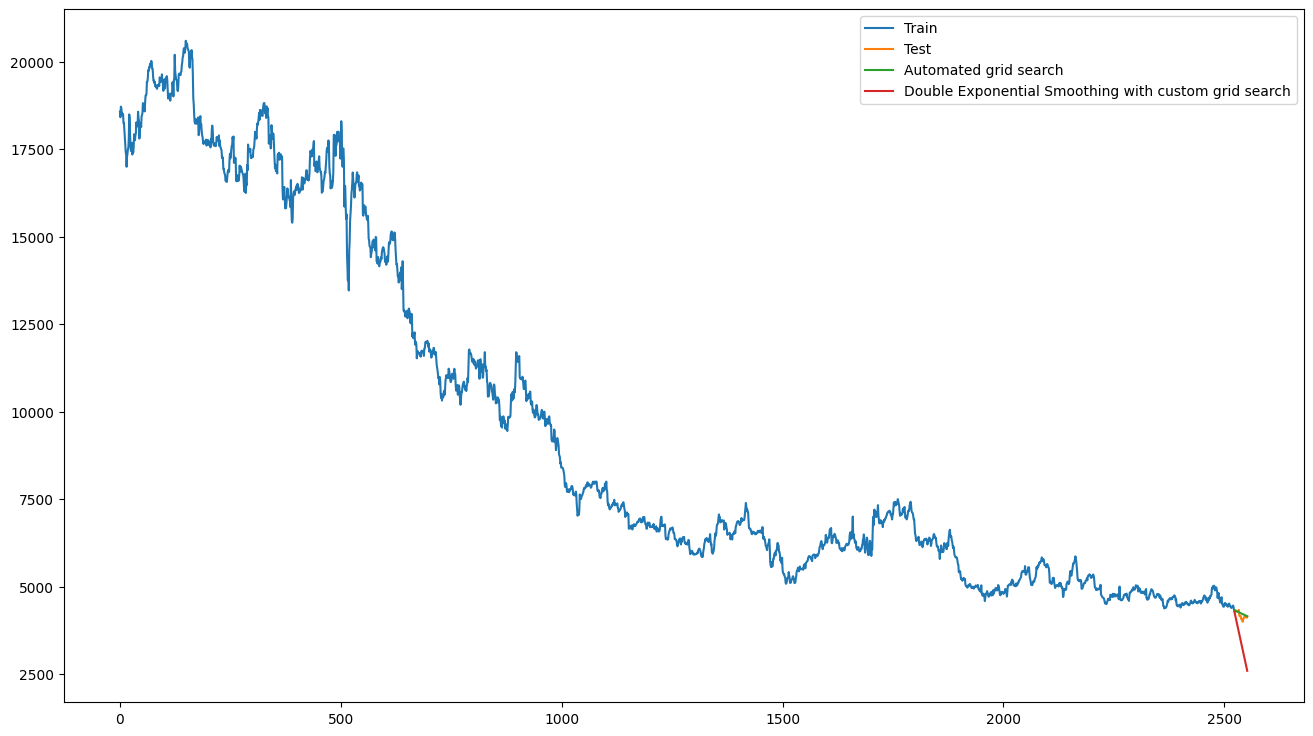

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [16,9]
plt.plot( train, label='Train')
plt.plot(test, label='Test')
plt.plot(fitESAUTOpred, label='Automated grid search')
plt.plot(Forecast_custom_pred, label='Double Exponential Smoothing with custom grid search')
plt.legend(loc='best')
plt.show()
